CISCO HACKATHON

Cleaning dataset

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score

In [2]:
# exporting data
data = pd.read_csv('data.csv')
data.head()

Cost Rank    Product Name Product Life Cycle  FY20 Q4   FY21 Q1   FY21 Q2  \
0          1        ROUTER 1         Sustaining      NaN       NaN       NaN   
1          2     TRANSCIEVER         Sustaining  87173.0  102849.0  126375.0   
2          3        SWITCH 1         Sustaining      NaN       NaN       NaN   
3          4  ACCESS POINT 1         Sustaining      NaN       NaN       NaN   
4          5  ACCESS POINT 2         Sustaining      NaN       NaN       NaN   

    FY21 Q3   FY21 Q4   FY22 Q1   FY22 Q2   FY22 Q3  FY22 Q4  FY23 Q1  \
0     906.0     941.0     663.0     769.0    3565.0     1020     1670   
1  128629.0  179125.0  138750.0  208760.0  116126.0   150803    82163   
2    3651.0   10409.0   10575.0   17934.0   15104.0    15525     6938   
3       NaN       NaN       NaN    9576.0   46029.0   109452    54955   
4       NaN       NaN       NaN       NaN       NaN    26769    33670   

   FY23 Q2  FY23 Q3 FY23Q4 Demand FYQ23 Q4 Marketing FY23 Q4 Stats/ML  
0       38     2141         1,716              1,716            1,948  
1    82408    67132        85,000            141,285           97,995  
2     9595     9231        12,000             11,820           11,184  
3    60478    62708        62,771             79,113           65,310  
4    74853    80944        76,192            113,704           93,200

In [3]:
#removing unnecessary columns
data = data.drop(['Cost Rank','Product Life Cycle','FY23Q4 Demand','FYQ23 Q4 Marketing','FY23 Q4 Stats/ML'], axis = 1)
data.set_index('Product Name', inplace = True)
data.head()

FY20 Q4   FY21 Q1   FY21 Q2   FY21 Q3   FY21 Q4   FY22 Q1  \
Product Name                                                                
ROUTER 1            NaN       NaN       NaN     906.0     941.0     663.0   
TRANSCIEVER     87173.0  102849.0  126375.0  128629.0  179125.0  138750.0   
SWITCH 1            NaN       NaN       NaN    3651.0   10409.0   10575.0   
ACCESS POINT 1      NaN       NaN       NaN       NaN       NaN       NaN   
ACCESS POINT 2      NaN       NaN       NaN       NaN       NaN       NaN   

                 FY22 Q2   FY22 Q3  FY22 Q4  FY23 Q1  FY23 Q2  FY23 Q3  
Product Name                                                            
ROUTER 1           769.0    3565.0     1020     1670       38     2141  
TRANSCIEVER     208760.0  116126.0   150803    82163    82408    67132  
SWITCH 1         17934.0   15104.0    15525     6938     9595     9231  
ACCESS POINT 1    9576.0   46029.0   109452    54955    60478    62708  
ACCESS POINT 2       NaN       NaN    26769    33670    74853    80944

In [4]:
transposed = data.transpose()
transposed

Product Name  ROUTER 1  TRANSCIEVER  SWITCH 1  ACCESS POINT 1  ACCESS POINT 2  \
FY20 Q4            NaN      87173.0       NaN             NaN             NaN   
FY21 Q1            NaN     102849.0       NaN             NaN             NaN   
FY21 Q2            NaN     126375.0       NaN             NaN             NaN   
FY21 Q3          906.0     128629.0    3651.0             NaN             NaN   
FY21 Q4          941.0     179125.0   10409.0             NaN             NaN   
FY22 Q1          663.0     138750.0   10575.0             NaN             NaN   
FY22 Q2          769.0     208760.0   17934.0          9576.0             NaN   
FY22 Q3         3565.0     116126.0   15104.0         46029.0             NaN   
FY22 Q4         1020.0     150803.0   15525.0        109452.0         26769.0   
FY23 Q1         1670.0      82163.0    6938.0         54955.0         33670.0   
FY23 Q2           38.0      82408.0    9595.0         60478.0         74853.0   
FY23 Q3         2141.0      67132.0    9231.0         62708.0         80944.0   

Product Name  SWITCH 2  SWITCH 3  POWER SUPPLY 1  SWITCH 4  SWITCH 5  \
FY20 Q4        13432.0   28585.0        115709.0       NaN    4571.0   
FY21 Q1        12463.0   19686.0         98337.0       NaN    4100.0   
FY21 Q2        13452.0   44724.0        147681.0       NaN    4830.0   
FY21 Q3        14581.0   37781.0        185327.0     177.0    5472.0   
FY21 Q4        15831.0   31905.0        194170.0     270.0    7391.0   
FY22 Q1        13864.0   37888.0        220386.0     850.0    7894.0   
FY22 Q2        15012.0   32689.0        204604.0    2717.0    7101.0   
FY22 Q3        11349.0   30442.0        194538.0    3833.0    6943.0   
FY22 Q4        10422.0   27028.0        185160.0    4279.0    6126.0   
FY23 Q1         8726.0   21246.0        147284.0    6089.0    4616.0   
FY23 Q2        10185.0   21149.0        136997.0    8063.0    4680.0   
FY23 Q3         8645.0   10584.0        100623.0    2535.0    4397.0   

Product Name  SWITCH 6  ACCESS POINT 3  SUPERVISOR ENGINE  SWITCH 7  \
FY20 Q4            NaN         65048.0                NaN    6073.0   
FY21 Q1            NaN         67810.0                NaN    5459.0   
FY21 Q2            NaN         90928.0                NaN    6736.0   
FY21 Q3            NaN        148547.0                NaN   12213.0   
FY21 Q4            NaN        228945.0                NaN   13883.0   
FY22 Q1            NaN        204184.0                NaN   27045.0   
FY22 Q2          222.0        245453.0               15.0   15162.0   
FY22 Q3         1549.0        245803.0              108.0   13855.0   
FY22 Q4         4619.0        136283.0             1972.0   12351.0   
FY23 Q1         4764.0         76020.0             2427.0    8933.0   
FY23 Q2         5015.0         51586.0             2841.0    5909.0   
FY23 Q3         6656.0         53431.0             2096.0    6643.0   

Product Name  WIRELESS CONTROLLER  SWITCH 8  SWITCH 9  ACCESS POINT 4  \
FY20 Q4                    1208.0       4.0    6187.0             NaN   
FY21 Q1                     963.0      -4.0    5301.0             NaN   
FY21 Q2                    1698.0      36.0    7172.0             NaN   
FY21 Q3                    1833.0     305.0    7582.0             NaN   
FY21 Q4                    2423.0    1093.0   10964.0             NaN   
FY22 Q1                    2602.0    2360.0   11501.0             NaN   
FY22 Q2                    2341.0    4317.0   14980.0             NaN   
FY22 Q3                    1830.0    4343.0    9158.0             NaN   
FY22 Q4                    1567.0    4094.0   11601.0         13260.0   
FY23 Q1                    1210.0    2756.0    3788.0         21667.0   
FY23 Q2                    1659.0    3126.0    5338.0         30498.0   
FY23 Q3                    1311.0    2808.0    5595.0         40505.0   

Product Name  SWITCH 10  POWER SUPPLY 2  
FY20 Q4             NaN         28279.0  
FY21 Q1             NaN         22704.0  
FY21 Q2  

In [5]:
transposed.index

Index(['FY20 Q4', 'FY21 Q1', 'FY21 Q2', 'FY21 Q3', 'FY21 Q4', 'FY22 Q1',
       'FY22 Q2', 'FY22 Q3', 'FY22 Q4', 'FY23 Q1', 'FY23 Q2', 'FY23 Q3'],
      dtype='object')

In [6]:
transposed = transposed.reset_index().rename(columns={'index': 'Quarters'})


In [7]:
transposed.index

RangeIndex(start=0, stop=12, step=1)

In [8]:
transposed.columns

Index(['Quarters', 'ROUTER 1', 'TRANSCIEVER', 'SWITCH 1', 'ACCESS POINT 1',
       'ACCESS POINT 2', 'SWITCH 2', 'SWITCH 3', 'POWER SUPPLY 1', 'SWITCH 4',
       'SWITCH 5', 'SWITCH 6', 'ACCESS POINT 3', 'SUPERVISOR ENGINE',
       'SWITCH 7', 'WIRELESS CONTROLLER', 'SWITCH 8', 'SWITCH 9',
       'ACCESS POINT 4', 'SWITCH 10', 'POWER SUPPLY 2'],
      dtype='object', name='Product Name')

In [9]:
transposed

Product Name Quarters  ROUTER 1  TRANSCIEVER  SWITCH 1  ACCESS POINT 1  \
0             FY20 Q4       NaN      87173.0       NaN             NaN   
1             FY21 Q1       NaN     102849.0       NaN             NaN   
2             FY21 Q2       NaN     126375.0       NaN             NaN   
3             FY21 Q3     906.0     128629.0    3651.0             NaN   
4             FY21 Q4     941.0     179125.0   10409.0             NaN   
5             FY22 Q1     663.0     138750.0   10575.0             NaN   
6             FY22 Q2     769.0     208760.0   17934.0          9576.0   
7             FY22 Q3    3565.0     116126.0   15104.0         46029.0   
8             FY22 Q4    1020.0     150803.0   15525.0        109452.0   
9             FY23 Q1    1670.0      82163.0    6938.0         54955.0   
10            FY23 Q2      38.0      82408.0    9595.0         60478.0   
11            FY23 Q3    2141.0      67132.0    9231.0         62708.0   

Product Name  ACCESS POINT 2  SWITCH 2  SWITCH 3  POWER SUPPLY 1  SWITCH 4  \
0                        NaN   13432.0   28585.0        115709.0       NaN   
1                        NaN   12463.0   19686.0         98337.0       NaN   
2                        NaN   13452.0   44724.0        147681.0       NaN   
3                        NaN   14581.0   37781.0        185327.0     177.0   
4                        NaN   15831.0   31905.0        194170.0     270.0   
5                        NaN   13864.0   37888.0        220386.0     850.0   
6                        NaN   15012.0   32689.0        204604.0    2717.0   
7                        NaN   11349.0   30442.0        194538.0    3833.0   
8                    26769.0   10422.0   27028.0        185160.0    4279.0   
9                    33670.0    8726.0   21246.0        147284.0    6089.0   
10                   74853.0   10185.0   21149.0        136997.0    8063.0   
11                   80944.0    8645.0   10584.0        100623.0    2535.0   

Product Name  ...  SWITCH 6  ACCESS POINT 3  SUPERVISOR ENGINE  SWITCH 7  \
0             ...       NaN         65048.0                NaN    6073.0   
1             ...       NaN         67810.0                NaN    5459.0   
2             ...       NaN         90928.0                NaN    6736.0   
3             ...       NaN        148547.0                NaN   12213.0   
4             ...       NaN        228945.0                NaN   13883.0   
5             ...       NaN        204184.0                NaN   27045.0   
6             ...     222.0        245453.0               15.0   15162.0   
7             ...    1549.0        245803.0              108.0   13855.0   
8             ...    4619.0        136283.0             1972.0   12351.0   
9             ...    4764.0         76020.0             2427.0    8933.0   
10            ...    5015.0         51586.0             2841.0    5909.0   
11            ...    6656.0         53431.0             2096.0    6643.0   

Product Name  WIRELESS CONTROLLER  SWITCH 8  SWITCH 9  ACCESS POINT 4  \
0                          1208.0       4.0    6187.0             NaN   
1                           963.0      -4.0    5301.0             NaN   
2                          1698.0      36.0    7172.0             NaN   
3                          1833.0     305.0    7582.0             NaN   
4                          2423.0    1093.0   10964.0             NaN   
5                          2602.0    2360.0   11501.0             NaN   
6                          2341.0    4317.0   14980.0             NaN   
7                          1830.0    4343.0    9158.0             NaN   
8                          1567.0    4094.0   11601.0         13260.0   
9                          1210.0    2756.0    3788.0         21667.0   
10                         1659.0    3126.0    5338.0         30498.0   
11                         1311.0    2808.0    5595.0         40505.0   

Product Name  SWITCH 10  POWER SUPPLY 2  
0                   NaN         28279.0  

In [10]:
transposed['Quarters'] = ['2020 Q4','2021 Q1','2021 Q2','2021 Q3','2021 Q4','2022 Q1','2022 Q2','2022 Q3','2022 Q4','2023 Q1','2023 Q2','2023 Q3']

In [11]:
transposed

Product Name Quarters  ROUTER 1  TRANSCIEVER  SWITCH 1  ACCESS POINT 1  \
0             2020 Q4       NaN      87173.0       NaN             NaN   
1             2021 Q1       NaN     102849.0       NaN             NaN   
2             2021 Q2       NaN     126375.0       NaN             NaN   
3             2021 Q3     906.0     128629.0    3651.0             NaN   
4             2021 Q4     941.0     179125.0   10409.0             NaN   
5             2022 Q1     663.0     138750.0   10575.0             NaN   
6             2022 Q2     769.0     208760.0   17934.0          9576.0   
7             2022 Q3    3565.0     116126.0   15104.0         46029.0   
8             2022 Q4    1020.0     150803.0   15525.0        109452.0   
9             2023 Q1    1670.0      82163.0    6938.0         54955.0   
10            2023 Q2      38.0      82408.0    9595.0         60478.0   
11            2023 Q3    2141.0      67132.0    9231.0         62708.0   

Product Name  ACCESS POINT 2  SWITCH 2  SWITCH 3  POWER SUPPLY 1  SWITCH 4  \
0                        NaN   13432.0   28585.0        115709.0       NaN   
1                        NaN   12463.0   19686.0         98337.0       NaN   
2                        NaN   13452.0   44724.0        147681.0       NaN   
3                        NaN   14581.0   37781.0        185327.0     177.0   
4                        NaN   15831.0   31905.0        194170.0     270.0   
5                        NaN   13864.0   37888.0        220386.0     850.0   
6                        NaN   15012.0   32689.0        204604.0    2717.0   
7                        NaN   11349.0   30442.0        194538.0    3833.0   
8                    26769.0   10422.0   27028.0        185160.0    4279.0   
9                    33670.0    8726.0   21246.0        147284.0    6089.0   
10                   74853.0   10185.0   21149.0        136997.0    8063.0   
11                   80944.0    8645.0   10584.0        100623.0    2535.0   

Product Name  ...  SWITCH 6  ACCESS POINT 3  SUPERVISOR ENGINE  SWITCH 7  \
0             ...       NaN         65048.0                NaN    6073.0   
1             ...       NaN         67810.0                NaN    5459.0   
2             ...       NaN         90928.0                NaN    6736.0   
3             ...       NaN        148547.0                NaN   12213.0   
4             ...       NaN        228945.0                NaN   13883.0   
5             ...       NaN        204184.0                NaN   27045.0   
6             ...     222.0        245453.0               15.0   15162.0   
7             ...    1549.0        245803.0              108.0   13855.0   
8             ...    4619.0        136283.0             1972.0   12351.0   
9             ...    4764.0         76020.0             2427.0    8933.0   
10            ...    5015.0         51586.0             2841.0    5909.0   
11            ...    6656.0         53431.0             2096.0    6643.0   

Product Name  WIRELESS CONTROLLER  SWITCH 8  SWITCH 9  ACCESS POINT 4  \
0                          1208.0       4.0    6187.0             NaN   
1                           963.0      -4.0    5301.0             NaN   
2                          1698.0      36.0    7172.0             NaN   
3                          1833.0     305.0    7582.0             NaN   
4                          2423.0    1093.0   10964.0             NaN   
5                          2602.0    2360.0   11501.0             NaN   
6                          2341.0    4317.0   14980.0             NaN   
7                          1830.0    4343.0    9158.0             NaN   
8                          1567.0    4094.0   11601.0         13260.0   
9                          1210.0    2756.0    3788.0         21667.0   
10                         1659.0    3126.0    5338.0         30498.0   
11                         1311.0    2808.0    5595.0         40505.0   

Product Name  SWITCH 10  POWER SUPPLY 2  
0                   NaN         28279.0  

In [12]:
# Split the 'Quarters' column into year and quarter
transposed[['Year', 'Quarter']] = transposed['Quarters'].str.split(' ', expand=True)

# Map quarter strings to their numeric representations
quarter_map = {'Q1': 8, 'Q2': 11, 'Q3': 2, 'Q4': 5} 
transposed['Quarter'] = transposed['Quarter'].map(quarter_map)

# Convert to datetime
transposed['Date'] = pd.to_datetime(transposed['Year'] + '-' + transposed['Quarter'].astype(str), format='%Y-%m')

# Convert to period
transposed['Quarter'] = transposed['Date'].dt.to_period('Q')

In [13]:
# # Split the 'Quarters' column into year and quarter
# transposed[['Year', 'Quarter']] = transposed['Quarters'].str.split('Q', expand=True)
# # 
# # Map quarter strings to their numeric representations
# quarter_map = {'Q1': 8, 'Q2': 11, 'Q3': 2, 'Q4': 5}  # Adjusted mapping for fiscal year
# transposed['Quarter'] = transposed['Quarter'].map(quarter_map)

# # Adjust year for quarters in Q1 and Q2
# transposed.loc[transposed['Quarter'].isin([8, 11]), 'Year'] = transposed['Year'].astype(int) - 1

# # Convert to datetime
# transposed['Date'] = pd.to_datetime(transposed['Year'] + '-' + transposed['Quarter'].astype(str), format='%Y-%m')

# # Convert to period
# transposed['Quarter'] = transposed['Date'].dt.to_period('Q')

In [14]:
transposed

Product Name Quarters  ROUTER 1  TRANSCIEVER  SWITCH 1  ACCESS POINT 1  \
0             2020 Q4       NaN      87173.0       NaN             NaN   
1             2021 Q1       NaN     102849.0       NaN             NaN   
2             2021 Q2       NaN     126375.0       NaN             NaN   
3             2021 Q3     906.0     128629.0    3651.0             NaN   
4             2021 Q4     941.0     179125.0   10409.0             NaN   
5             2022 Q1     663.0     138750.0   10575.0             NaN   
6             2022 Q2     769.0     208760.0   17934.0          9576.0   
7             2022 Q3    3565.0     116126.0   15104.0         46029.0   
8             2022 Q4    1020.0     150803.0   15525.0        109452.0   
9             2023 Q1    1670.0      82163.0    6938.0         54955.0   
10            2023 Q2      38.0      82408.0    9595.0         60478.0   
11            2023 Q3    2141.0      67132.0    9231.0         62708.0   

Product Name  ACCESS POINT 2  SWITCH 2  SWITCH 3  POWER SUPPLY 1  SWITCH 4  \
0                        NaN   13432.0   28585.0        115709.0       NaN   
1                        NaN   12463.0   19686.0         98337.0       NaN   
2                        NaN   13452.0   44724.0        147681.0       NaN   
3                        NaN   14581.0   37781.0        185327.0     177.0   
4                        NaN   15831.0   31905.0        194170.0     270.0   
5                        NaN   13864.0   37888.0        220386.0     850.0   
6                        NaN   15012.0   32689.0        204604.0    2717.0   
7                        NaN   11349.0   30442.0        194538.0    3833.0   
8                    26769.0   10422.0   27028.0        185160.0    4279.0   
9                    33670.0    8726.0   21246.0        147284.0    6089.0   
10                   74853.0   10185.0   21149.0        136997.0    8063.0   
11                   80944.0    8645.0   10584.0        100623.0    2535.0   

Product Name  ...  SWITCH 7  WIRELESS CONTROLLER  SWITCH 8  SWITCH 9  \
0             ...    6073.0               1208.0       4.0    6187.0   
1             ...    5459.0                963.0      -4.0    5301.0   
2             ...    6736.0               1698.0      36.0    7172.0   
3             ...   12213.0               1833.0     305.0    7582.0   
4             ...   13883.0               2423.0    1093.0   10964.0   
5             ...   27045.0               2602.0    2360.0   11501.0   
6             ...   15162.0               2341.0    4317.0   14980.0   
7             ...   13855.0               1830.0    4343.0    9158.0   
8             ...   12351.0               1567.0    4094.0   11601.0   
9             ...    8933.0               1210.0    2756.0    3788.0   
10            ...    5909.0               1659.0    3126.0    5338.0   
11            ...    6643.0               1311.0    2808.0    5595.0   

Product Name  ACCESS POINT 4  SWITCH 10  POWER SUPPLY 2  Year  Quarter  \
0                        NaN        NaN         28279.0  2020   2020Q2   
1                        NaN        NaN         22704.0  2021   2021Q3   
2                        NaN        NaN         24098.0  2021   2021Q4   
3                        NaN        NaN         31461.0  2021   2021Q1   
4                        NaN        NaN         47009.0  2021   2021Q2   
5                        NaN        NaN         35145.0  2022   2022Q3   
6                        NaN        NaN         45978.0  2022   2022Q4   
7                        NaN        NaN         34518.0  2022   2022Q1   
8                    13260.0     1227.0         40605.0  2022   2022Q2   
9                    21667.0    24186.0         26925.0  2023   2023Q3   
10                   30498.0     7680.0         23635.0  2023   2023Q4   
11                   40505.0    16772.0         17799.0  2023   2023Q1   

Product Name       Date  
0            2020-05-01  
1            2021-08-01  
2            2021-11-01  
3            2021-

In [15]:
transposed.columns

Index(['Quarters', 'ROUTER 1', 'TRANSCIEVER', 'SWITCH 1', 'ACCESS POINT 1',
       'ACCESS POINT 2', 'SWITCH 2', 'SWITCH 3', 'POWER SUPPLY 1', 'SWITCH 4',
       'SWITCH 5', 'SWITCH 6', 'ACCESS POINT 3', 'SUPERVISOR ENGINE',
       'SWITCH 7', 'WIRELESS CONTROLLER', 'SWITCH 8', 'SWITCH 9',
       'ACCESS POINT 4', 'SWITCH 10', 'POWER SUPPLY 2', 'Year', 'Quarter',
       'Date'],
      dtype='object', name='Product Name')

In [16]:
transposed.drop(['Quarters', 'Quarter', 'Year'], axis=1, inplace=True)

In [17]:
transposed.columns

Index(['ROUTER 1', 'TRANSCIEVER', 'SWITCH 1', 'ACCESS POINT 1',
       'ACCESS POINT 2', 'SWITCH 2', 'SWITCH 3', 'POWER SUPPLY 1', 'SWITCH 4',
       'SWITCH 5', 'SWITCH 6', 'ACCESS POINT 3', 'SUPERVISOR ENGINE',
       'SWITCH 7', 'WIRELESS CONTROLLER', 'SWITCH 8', 'SWITCH 9',
       'ACCESS POINT 4', 'SWITCH 10', 'POWER SUPPLY 2', 'Date'],
      dtype='object', name='Product Name')

In [18]:
transposed = transposed.reindex(columns=['Date','ROUTER 1', 'TRANSCIEVER', 'SWITCH 1', 'ACCESS POINT 1',
       'ACCESS POINT 2', 'SWITCH 2', 'SWITCH 3', 'POWER SUPPLY 1', 'SWITCH 4',
       'SWITCH 5', 'SWITCH 6', 'ACCESS POINT 3', 'SUPERVISOR ENGINE',
       'SWITCH 7', 'WIRELESS CONTROLLER', 'SWITCH 8', 'SWITCH 9',
       'ACCESS POINT 4', 'SWITCH 10', 'POWER SUPPLY 2'])

In [19]:
transposed.to_csv('unimputed.csv')

Imputation of missing values

iterative imputation - assumption sales

In [20]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

new = transposed.copy()
new.drop(['Date'],axis=1, inplace=True)
mask = new.isna()
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(new)
imputed_df = pd.DataFrame(imputed, index=new.index, columns=new.columns)
new[mask] = imputed_df[mask]
new

c:\Users\kedar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Product Name     ROUTER 1  TRANSCIEVER      SWITCH 1  ACCESS POINT 1  \
0             1176.874240      87173.0     12.617558    35383.653311   
1             1203.880419     102849.0   6431.362819    34595.130943   
2              301.705754     126375.0   1651.992349    14749.609871   
3              906.000000     128629.0   3651.000000    37406.301862   
4              941.000000     179125.0  10409.000000    38594.816720   
5              663.000000     138750.0  10575.000000    57206.758834   
6              769.000000     208760.0  17934.000000     9576.000000   
7             3565.000000     116126.0  15104.000000    46029.000000   
8             1020.000000     150803.0  15525.000000   109452.000000   
9             1670.000000      82163.0   6938.000000    54955.000000   
10              38.000000      82408.0   9595.000000    60478.000000   
11            2141.000000      67132.0   9231.000000    62708.000000   

Product Name  ACCESS POINT 2  SWITCH 2  SWITCH 3  POWER SUPPLY 1     SWITCH 4  \
0               48605.014593   13432.0   28585.0        115709.0  4253.699954   
1               62326.892737   12463.0   19686.0         98337.0  4316.469328   
2               10265.570119   13452.0   44724.0        147681.0  3791.645150   
3              -59390.459949   14581.0   37781.0        185327.0   177.000000   
4             -132651.395018   15831.0   31905.0        194170.0   270.000000   
5             -122373.227714   13864.0   37888.0        220386.0   850.000000   
6             -162594.048404   15012.0   32689.0        204604.0  2717.000000   
7             -180301.038476   11349.0   30442.0        194538.0  3833.000000   
8               26769.000000   10422.0   27028.0        185160.0  4279.000000   
9               33670.000000    8726.0   21246.0        147284.0  6089.000000   
10              74853.000000   10185.0   21149.0        136997.0  8063.000000   
11              80944.000000    8645.0   10584.0        100623.0  2535.000000   

Product Name  SWITCH 5     SWITCH 6  ACCESS POINT 3  SUPERVISOR ENGINE  \
0               4571.0  5090.450248         65048.0        2173.430614   
1               4100.0  5568.048415         67810.0        1798.500089   
2               4830.0  2655.987195         90928.0        2323.884165   
3               5472.0  2356.596557        148547.0        1692.827606   
4               7391.0  1880.704828        228945.0         177.646793   
5               7894.0  1641.076598        204184.0        1169.219523   
6               7101.0   222.000000        245453.0          15.000000   
7               6943.0  1549.000000        245803.0         108.000000   
8               6126.0  4619.000000        136283.0        1972.000000   
9               4616.0  4764.000000         76020.0        2427.000000   
10              4680.0  5015.000000         51586.0        2841.000000   
11              4397.0  6656.000000         53431.0        2096.000000   

Product Name  SWITCH 7  WIRELESS CONTROLLER  SWITCH 8  SWITCH 9  \
0               6073.0               1208.0       4.0    6187.0   
1               5459.0                963.0      -4.0    5301.0   
2               6736.0               1698.0      36.0    7172.0   
3              12213.0               1833.0     305.0    7582.0   
4              13883.0               2423.0    1093.0   10964.0   
5              27045.0               2602.0    2360.0   11501.0   
6              15162.0               2341.0    4317.0   14980.0   
7              13855.0               1830.0    4343.0    9158.0   
8              12351.0               1567.0    4094.0   11601.0   
9               8933.0               1210.0    2756.0    3788.0   
10              5909.0               1659.0    3126.0    5338.0   
11              6643.0               1311.0    2808.0    5595.0   

Product Name  ACCESS POINT 4      SWITCH 10  POWER SUPPLY 2  
0               28466.918282   24885.026733         28279.0  
1               34195.099511   20614.045510       

In [21]:
new.insert(0,'Date',transposed['Date'])
new

Product Name       Date     ROUTER 1  TRANSCIEVER      SWITCH 1  \
0            2020-05-01  1176.874240      87173.0     12.617558   
1            2021-08-01  1203.880419     102849.0   6431.362819   
2            2021-11-01   301.705754     126375.0   1651.992349   
3            2021-02-01   906.000000     128629.0   3651.000000   
4            2021-05-01   941.000000     179125.0  10409.000000   
5            2022-08-01   663.000000     138750.0  10575.000000   
6            2022-11-01   769.000000     208760.0  17934.000000   
7            2022-02-01  3565.000000     116126.0  15104.000000   
8            2022-05-01  1020.000000     150803.0  15525.000000   
9            2023-08-01  1670.000000      82163.0   6938.000000   
10           2023-11-01    38.000000      82408.0   9595.000000   
11           2023-02-01  2141.000000      67132.0   9231.000000   

Product Name  ACCESS POINT 1  ACCESS POINT 2  SWITCH 2  SWITCH 3  \
0               35383.653311    48605.014593   13432.0   28585.0   
1               34595.130943    62326.892737   12463.0   19686.0   
2               14749.609871    10265.570119   13452.0   44724.0   
3               37406.301862   -59390.459949   14581.0   37781.0   
4               38594.816720  -132651.395018   15831.0   31905.0   
5               57206.758834  -122373.227714   13864.0   37888.0   
6                9576.000000  -162594.048404   15012.0   32689.0   
7               46029.000000  -180301.038476   11349.0   30442.0   
8              109452.000000    26769.000000   10422.0   27028.0   
9               54955.000000    33670.000000    8726.0   21246.0   
10              60478.000000    74853.000000   10185.0   21149.0   
11              62708.000000    80944.000000    8645.0   10584.0   

Product Name  POWER SUPPLY 1     SWITCH 4  ...     SWITCH 6  ACCESS POINT 3  \
0                   115709.0  4253.699954  ...  5090.450248         65048.0   
1                    98337.0  4316.469328  ...  5568.048415         67810.0   
2                   147681.0  3791.645150  ...  2655.987195         90928.0   
3                   185327.0   177.000000  ...  2356.596557        148547.0   
4                   194170.0   270.000000  ...  1880.704828        228945.0   
5                   220386.0   850.000000  ...  1641.076598        204184.0   
6                   204604.0  2717.000000  ...   222.000000        245453.0   
7                   194538.0  3833.000000  ...  1549.000000        245803.0   
8                   185160.0  4279.000000  ...  4619.000000        136283.0   
9                   147284.0  6089.000000  ...  4764.000000         76020.0   
10                  136997.0  8063.000000  ...  5015.000000         51586.0   
11                  100623.0  2535.000000  ...  6656.000000         53431.0   

Product Name  SUPERVISOR ENGINE  SWITCH 7  WIRELESS CONTROLLER  SWITCH 8  \
0                   2173.430614    6073.0               1208.0       4.0   
1                   1798.500089    5459.0                963.0      -4.0   
2                   2323.884165    6736.0               1698.0      36.0   
3                   1692.827606   12213.0               1833.0     305.0   
4                    177.646793   13883.0               2423.0    1093.0   
5                   1169.219523   27045.0               2602.0    2360.0   
6                     15.000000   15162.0               2341.0    4317.0   
7                    108.000000   13855.0               1830.0    4343.0   
8                   1972.000000   12351.0               1567.0    4094.0   
9                   2427.000000    8933.0               1210.0    2756.0   
10                  2841.000000    5909.0               1659.0    3126.0   
11                  2096.000000    6643.0               1311.0    2808.0   

Product Name  SWITCH 9  ACCESS POINT 4      SWITCH 10  POWER SUPPLY 2  
0               6187.0    28466.918282   24885.026733         28279.0  
1               5301.0    34195.099511   20614.045510         22704.0  
2         

In [22]:
new.to_csv('iterative_imputed.csv')

Zero imputation - assumption no sales

In [23]:
new_0 = transposed.copy()
new_0.fillna(0, inplace=True)

In [24]:
new_0

Product Name       Date  ROUTER 1  TRANSCIEVER  SWITCH 1  ACCESS POINT 1  \
0            2020-05-01       0.0      87173.0       0.0             0.0   
1            2021-08-01       0.0     102849.0       0.0             0.0   
2            2021-11-01       0.0     126375.0       0.0             0.0   
3            2021-02-01     906.0     128629.0    3651.0             0.0   
4            2021-05-01     941.0     179125.0   10409.0             0.0   
5            2022-08-01     663.0     138750.0   10575.0             0.0   
6            2022-11-01     769.0     208760.0   17934.0          9576.0   
7            2022-02-01    3565.0     116126.0   15104.0         46029.0   
8            2022-05-01    1020.0     150803.0   15525.0        109452.0   
9            2023-08-01    1670.0      82163.0    6938.0         54955.0   
10           2023-11-01      38.0      82408.0    9595.0         60478.0   
11           2023-02-01    2141.0      67132.0    9231.0         62708.0   

Product Name  ACCESS POINT 2  SWITCH 2  SWITCH 3  POWER SUPPLY 1  SWITCH 4  \
0                        0.0   13432.0   28585.0        115709.0       0.0   
1                        0.0   12463.0   19686.0         98337.0       0.0   
2                        0.0   13452.0   44724.0        147681.0       0.0   
3                        0.0   14581.0   37781.0        185327.0     177.0   
4                        0.0   15831.0   31905.0        194170.0     270.0   
5                        0.0   13864.0   37888.0        220386.0     850.0   
6                        0.0   15012.0   32689.0        204604.0    2717.0   
7                        0.0   11349.0   30442.0        194538.0    3833.0   
8                    26769.0   10422.0   27028.0        185160.0    4279.0   
9                    33670.0    8726.0   21246.0        147284.0    6089.0   
10                   74853.0   10185.0   21149.0        136997.0    8063.0   
11                   80944.0    8645.0   10584.0        100623.0    2535.0   

Product Name  ...  SWITCH 6  ACCESS POINT 3  SUPERVISOR ENGINE  SWITCH 7  \
0             ...       0.0         65048.0                0.0    6073.0   
1             ...       0.0         67810.0                0.0    5459.0   
2             ...       0.0         90928.0                0.0    6736.0   
3             ...       0.0        148547.0                0.0   12213.0   
4             ...       0.0        228945.0                0.0   13883.0   
5             ...       0.0        204184.0                0.0   27045.0   
6             ...     222.0        245453.0               15.0   15162.0   
7             ...    1549.0        245803.0              108.0   13855.0   
8             ...    4619.0        136283.0             1972.0   12351.0   
9             ...    4764.0         76020.0             2427.0    8933.0   
10            ...    5015.0         51586.0             2841.0    5909.0   
11            ...    6656.0         53431.0             2096.0    6643.0   

Product Name  WIRELESS CONTROLLER  SWITCH 8  SWITCH 9  ACCESS POINT 4  \
0                          1208.0       4.0    6187.0             0.0   
1                           963.0      -4.0    5301.0             0.0   
2                          1698.0      36.0    7172.0             0.0   
3                          1833.0     305.0    7582.0             0.0   
4                          2423.0    1093.0   10964.0             0.0   
5                          2602.0    2360.0   11501.0             0.0   
6                          2341.0    4317.0   14980.0             0.0   
7                          1830.0    4343.0    9158.0             0.0   
8                          1567.0    4094.0   11601.0         13260.0   
9                          1210.0    2756.0    3788.0         21667.0   
10                         1659.0    3126.0    5338.0         30498.0   
11                         1311.0    2808.0    5595.0         40505.0   

Product Name  SWITCH 10  POWER SUPPLY 2  
0              

In [25]:
new_0.to_csv('zero_imputated.csv')

spline imputation - assumption sales

In [26]:
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline

# Load data from the CSV file
new_spline = pd.read_csv('zero_imputated.csv')

# Extracting dates
dates = new_spline['Date']

# Remove 'Date' column as it's not relevant for imputation
new_spline = new_spline.drop(columns=['Date'])

# Convert columns to numeric
new_spline = new_spline.apply(pd.to_numeric, errors='coerce')

# new_spline
# Columns to interpolate
columns_to_interpolate = new_spline.columns

# Iterate through each row and perform spline interpolation for missing values
for index, row in new_spline.iterrows():
    x = row.dropna().index  # Non-missing indices
    y = row.dropna().values  # Non-missing values
    
    # Ensure that x and y contain numeric values only
    x_numeric = new_spline.columns.get_indexer_for(x)
    y_numeric = y[np.logical_not(np.isnan(y))]
    
    if len(y_numeric) > 2:  # Spline requires at least 3 non-missing values
        spline = UnivariateSpline(x_numeric, y_numeric, k=3, s=0)
        new_spline.loc[index] = spline(range(len(new_spline.columns)))
    else:
        # If there are not enough non-missing values, fill missing values with mean
        new_Spline.loc[index] = row.fillna(row.mean())

# Insert back the dates
new_spline.insert(0, 'Date', dates)


In [27]:
new_spline = new_spline.drop(['Unnamed: 0'], axis = 1)

In [28]:
# new_spline = new_spline.reset_index()
new_spline

Date      ROUTER 1  TRANSCIEVER      SWITCH 1  ACCESS POINT 1  \
0   2020-05-01 -2.228262e-11      87173.0  5.456968e-12    0.000000e+00   
1   2021-08-01  6.821210e-13     102849.0  4.547474e-12   -2.273737e-12   
2   2021-11-01 -2.864908e-11     126375.0  4.547474e-13   -1.364242e-12   
3   2021-02-01  9.060000e+02     128629.0  3.651000e+03   -1.364242e-12   
4   2021-05-01  9.410000e+02     179125.0  1.040900e+04   -9.094947e-13   
5   2022-08-01  6.630000e+02     138750.0  1.057500e+04    9.094947e-13   
6   2022-11-01  7.690000e+02     208760.0  1.793400e+04    9.576000e+03   
7   2022-02-01  3.565000e+03     116126.0  1.510400e+04    4.602900e+04   
8   2022-05-01  1.020000e+03     150803.0  1.552500e+04    1.094520e+05   
9   2023-08-01  1.670000e+03      82163.0  6.938000e+03    5.495500e+04   
10  2023-11-01  3.800000e+01      82408.0  9.595000e+03    6.047800e+04   
11  2023-02-01  2.141000e+03      67132.0  9.231000e+03    6.270800e+04   

    ACCESS POINT 2  SWITCH 2  SWITCH 3  POWER SUPPLY 1      SWITCH 4  ...  \
0     0.000000e+00   13432.0   28585.0        115709.0  6.366463e-12  ...   
1    -9.094947e-13   12463.0   19686.0         98337.0  1.818989e-12  ...   
2    -9.094947e-13   13452.0   44724.0        147681.0  9.094947e-12  ...   
3     0.000000e+00   14581.0   37781.0        185327.0  1.770000e+02  ...   
4     0.000000e+00   15831.0   31905.0        194170.0  2.700000e+02  ...   
5    -2.728484e-12   13864.0   37888.0        220386.0  8.500000e+02  ...   
6    -9.094947e-13   15012.0   32689.0        204604.0  2.717000e+03  ...   
7    -2.728484e-12   11349.0   30442.0        194538.0  3.833000e+03  ...   
8     2.676900e+04   10422.0   27028.0        185160.0  4.279000e+03  ...   
9     3.367000e+04    8726.0   21246.0        147284.0  6.089000e+03  ...   
10    7.485300e+04   10185.0   21149.0        136997.0  8.063000e+03  ...   
11    8.094400e+04    8645.0   10584.0        100623.0  2.535000e+03  ...   

        SWITCH 6  ACCESS POINT 3  SUPERVISOR ENGINE  SWITCH 7  \
0   0.000000e+00         65048.0       4.092726e-12    6073.0   
1  -3.637979e-12         67810.0       4.092726e-12    5459.0   
2   0.000000e+00         90928.0       0.000000e+00    6736.0   
3   1.455192e-11        148547.0      -9.094947e-12   12213.0   
4  -1.455192e-11        228945.0       3.637979e-12   13883.0   
5   2.182787e-11        204184.0       1.818989e-12   27045.0   
6   2.220000e+02        245453.0       1.500000e+01   15162.0   
7   1.549000e+03        245803.0       1.080000e+02   13855.0   
8   4.619000e+03        136283.0       1.972000e+03   12351.0   
9   4.764000e+03         76020.0       2.427000e+03    8933.0   
10  5.015000e+03         51586.0       2.841000e+03    5909.0   
11  6.656000e+03         53431.0       2.096000e+03    6643.0   

    WIRELESS CONTROLLER  SWITCH 8  SWITCH 9  ACCESS POINT 4     SWITCH 10  \
0                1208.0       4.0    6187.0    9.094947e-13  4.547474e-13   
1                 963.0      -4.0    5301.0    9.094947e-13 -4.547474e-13   
2                1698.0      36.0    7172.0    6.252776e-13 -9.094947e-13   
3                1833.0     305.0    7582.0    1.364242e-12 -4.547474e-13   
4                2423.0    1093.0   10964.0    2.728484e-12  0.000000e+00   
5                2602.0    2360.0   11501.0    2.216893e-12  0.000000e+00   
6                2341.0    4317.0   14980.0    1.932676e-12 -9.094947e-13   
7                1830.0    4343.0    9158.0    5.684342e-13  0.000000e+00   
8                1567.0    4094.0   11601.0    1.326000e+04  1.227000e+03   
9                1210.0    2756.0    3788.0    2.166700e+04  2.418600e+04   
10               1659.0    3126.0    5338.0    3.049800e+04  7.680000e+03   
11               1311.0    2808.0    5595.0    4.050500e+04  1.677200e+04   

    POWER SUPPLY 2  
0          28279.0  
1          22704.0  
2          24098.0  
3          31461.0  
4          47009.0  
5          35145.0  
6          45978.0  
7          34518

In [29]:

new_spline.to_csv('spline_imputated.csv')

Linear imputation - assumption sales

In [30]:
# !pip install linear-imputation

In [31]:
from linear_imputation import impute, Imputer
new_linear = transposed.copy()
new_linear.set_index('Date',inplace= True)
new_linear = impute(new_linear)
new_linear = new_linear.reset_index()
new_linear
# new_linear

Product Name       Date     ROUTER 1  TRANSCIEVER      SWITCH 1  \
0            2020-05-01  1301.444444      87173.0  10995.777778   
1            2021-08-01  1301.444444     102849.0  10995.777778   
2            2021-11-01  1301.444444     126375.0  10995.777778   
3            2021-02-01   906.000000     128629.0   3651.000000   
4            2021-05-01   941.000000     179125.0  10409.000000   
5            2022-08-01   663.000000     138750.0  10575.000000   
6            2022-11-01   769.000000     208760.0  17934.000000   
7            2022-02-01  3565.000000     116126.0  15104.000000   
8            2022-05-01  1020.000000     150803.0  15525.000000   
9            2023-08-01  1670.000000      82163.0   6938.000000   
10           2023-11-01    38.000000      82408.0   9595.000000   
11           2023-02-01  2141.000000      67132.0   9231.000000   

Product Name  ACCESS POINT 1  ACCESS POINT 2  SWITCH 2  SWITCH 3  \
0               57199.666667    54059.000000   13432.0   28585.0   
1               57199.666667    54059.000000   12463.0   19686.0   
2               57199.666667    54059.000000   13452.0   44724.0   
3               55791.212944    50182.106773   14581.0   37781.0   
4               59019.296203    53912.306754   15831.0   31905.0   
5               58523.786006    54008.357174   13864.0   37888.0   
6                9576.000000    48719.931105   15012.0   32689.0   
7               46029.000000    64455.594435   11349.0   30442.0   
8              109452.000000    26769.000000   10422.0   27028.0   
9               54955.000000    33670.000000    8726.0   21246.0   
10              60478.000000    74853.000000   10185.0   21149.0   
11              62708.000000    80944.000000    8645.0   10584.0   

Product Name  POWER SUPPLY 1     SWITCH 4  ...     SWITCH 6  ACCESS POINT 3  \
0                   115709.0  3201.444444  ...  3804.166667         65048.0   
1                    98337.0  3201.444444  ...  3804.166667         67810.0   
2                   147681.0  3201.444444  ...  3804.166667         90928.0   
3                   185327.0   177.000000  ...  3108.040876        148547.0   
4                   194170.0   270.000000  ...  3999.513846        228945.0   
5                   220386.0   850.000000  ...  3959.803552        204184.0   
6                   204604.0  2717.000000  ...   222.000000        245453.0   
7                   194538.0  3833.000000  ...  1549.000000        245803.0   
8                   185160.0  4279.000000  ...  4619.000000        136283.0   
9                   147284.0  6089.000000  ...  4764.000000         76020.0   
10                  136997.0  8063.000000  ...  5015.000000         51586.0   
11                  100623.0  2535.000000  ...  6656.000000         53431.0   

Product Name  SUPERVISOR ENGINE  SWITCH 7  WIRELESS CONTROLLER  SWITCH 8  \
0                   1576.500000    6073.0               1208.0       4.0   
1                   1576.500000    5459.0                963.0      -4.0   
2                   1576.500000    6736.0               1698.0      36.0   
3                   1294.651257   12213.0               1833.0     305.0   
4                   1738.042232   13883.0               2423.0    1093.0   
5                   1658.577935   27045.0               2602.0    2360.0   
6                     15.000000   15162.0               2341.0    4317.0   
7                    108.000000   13855.0               1830.0    4343.0   
8                   1972.000000   12351.0               1567.0    4094.0   
9                   2427.000000    8933.0               1210.0    2756.0   
10                  2841.000000    5909.0               1659.0    3126.0   
11                  2096.000000    6643.0               1311.0    2808.0   

Product Name  SWITCH 9  ACCESS POINT 4     SWITCH 10  POWER SUPPLY 2  
0               6187.0    26482.500000  12466.250000         28279.0  
1               5301.0    26482.500000  12466.250000         22704.0  
2            

In [32]:
new_linear.to_csv('linear_interpolated.csv')

overview of existing dataframes

new - iterative imputed dataframe

new_0 - zero imputed dataframe

new_spline - spline imputed dataframe

new_linear - linear imputed dataframe

transposed - fixed unimputed dataframe

data - unaltered, unimputed original dataframe

Visualisation

original

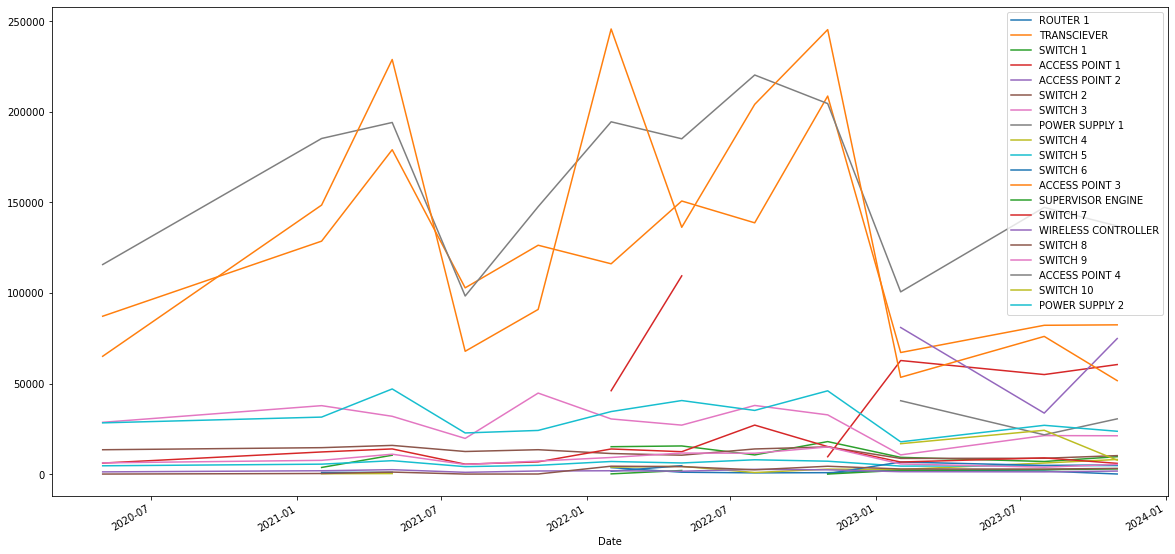

In [33]:
# transposed.plot('Date','ROUTER 1')
# transposed.plot('Date','ROUTER 1')
import matplotlib.pyplot as plt
plt.figure(figsize=(20 , 10 ))
ax = plt.gca()
columns = transposed.columns[1:]
for col in columns:
    transposed.plot(x = 'Date', y = col, ax = ax)

iterative imputed

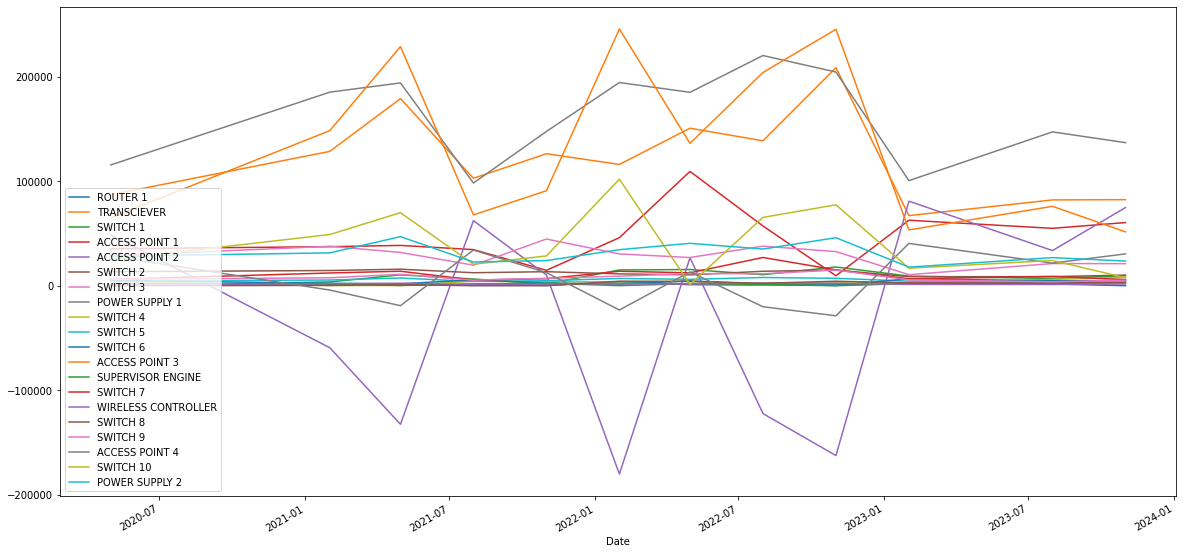

In [34]:
# transposed.plot('Date','ROUTER 1')
# transposed.plot('Date','ROUTER 1')
import matplotlib.pyplot as plt
plt.figure(figsize=(20 , 10 ))
ax = plt.gca()
columns = new.columns[1:]
for col in columns:
    new.plot(x = 'Date', y = col, ax = ax)

zero imputed

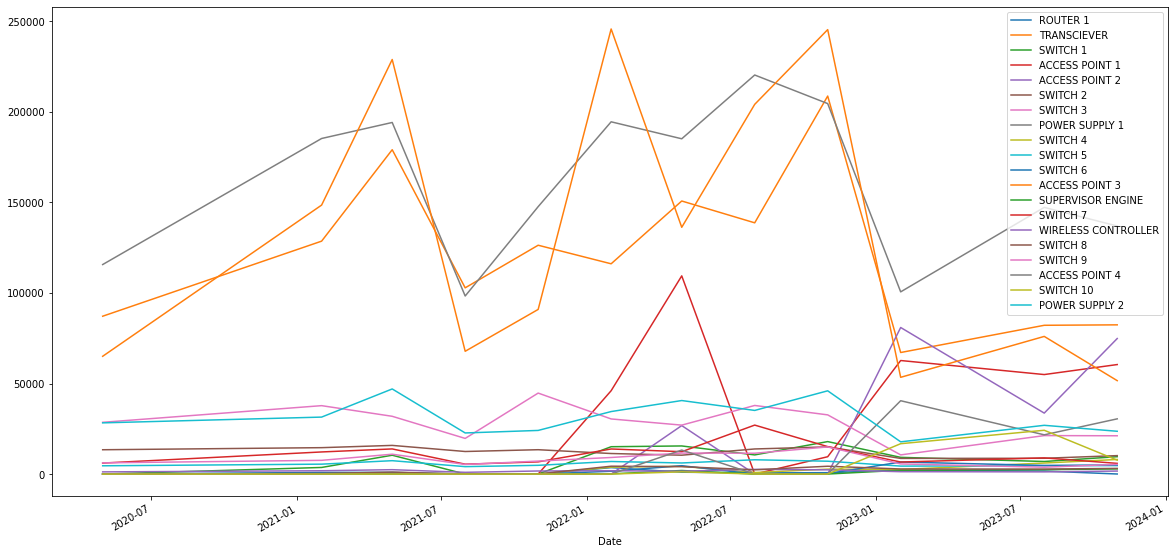

In [35]:
# transposed.plot('Date','ROUTER 1')
# transposed.plot('Date','ROUTER 1')
import matplotlib.pyplot as plt
plt.figure(figsize=(20 , 10 ))
ax = plt.gca()
columns = new_0.columns[1:]
for col in columns:
    new_0.plot(x = 'Date', y = col, ax = ax)

spline imputed

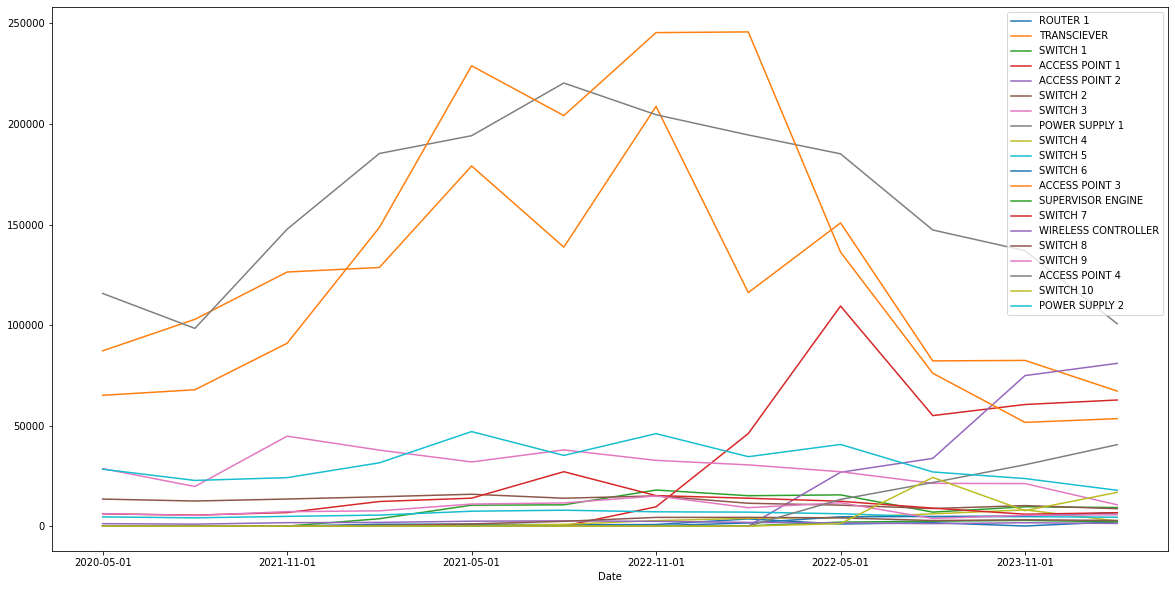

In [36]:
# transposed.plot('Date','ROUTER 1')
# transposed.plot('Date','ROUTER 1')
import matplotlib.pyplot as plt
plt.figure(figsize=(20 , 10 ))
ax = plt.gca()
columns = new_spline.columns[1:]
for col in columns:
    new_spline.plot(x = 'Date', y = col, ax = ax)

linear imputed

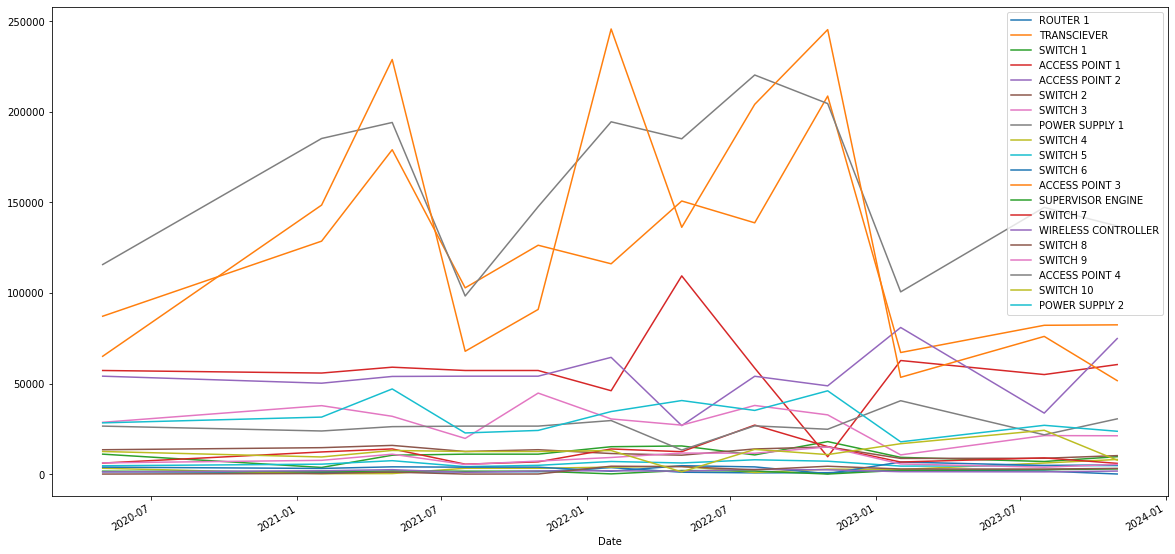

In [37]:
# transposed.plot('Date','ROUTER 1')
# transposed.plot('Date','ROUTER 1')
import matplotlib.pyplot as plt
plt.figure(figsize=(20 , 10 ))
ax = plt.gca()
columns = new_linear.columns[1:]
for col in columns:
    new_linear.plot(x = 'Date', y = col, ax = ax)

normalisation

In [38]:
# from sklearn.preprocessing import MinMaxScaler

# # Assuming 'transposed' is your DataFrame containing the data
# scaler = MinMaxScaler(feature_range=(-1, 1))

# scaled_iterative = scaler.fit_transform(new.iloc[:, 1:])
# scaled_iterative_df = pd.DataFrame(scaled_iterative, columns=new.columns[1:])
# scaled_iterative_df.insert(0,'Date',new['Date'])

# scaled_zero = scaler.fit_transform(new_0.iloc[:, 1:])
# scaled_0_df = pd.DataFrame(scaled_zero, columns=new_0.columns[1:])
# scaled_0_df.insert(0,'Date',new_0['Date'])

# scaled_spline = scaler.fit_transform(new_spline.iloc[:, 1:])
# scaled_spline_df = pd.DataFrame(scaled_spline, columns=new_spline.columns[1:])
# scaled_spline_df.insert(0,'Date',new_spline['Date'])

# scaled_linear = scaler.fit_transform(new_linear.iloc[:, 1:])
# scaled_linear_df = pd.DataFrame(scaled_linear, columns=new_linear.columns[1:])
# scaled_linear_df.insert(0,'Date',new_linear['Date'])
scaled_iterative_df = new
scaled_0_df = new_0
scaled_spline_df = new_spline
scaled_linear_df = new_linear

In [39]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20 , 10 ))
# ax = plt.gca()
# columns = scaled_iterative_df.columns[1:]
# for col in columns:
#     scaled_iterative_df.plot(x = 'Date', y = col, ax = ax)

feature engineering

lag features

In [40]:
# Define the number of lag quarters
lag_periods = 5

# Create lag features for each product
columns = new.columns[1:]

# iterative imputed
for product in columns:
    for i in range(1, lag_periods + 1):
        scaled_iterative_df[f'{product}_Lag{i}'] = scaled_iterative_df[product].shift(i)

scaled_iterative_df.fillna(0, inplace=True)
        
scaled_iterative_df = scaled_iterative_df.copy()

# zero imputed
for product in columns:
    for i in range(1, lag_periods + 1):
        scaled_0_df[f'{product}_Lag{i}'] = scaled_0_df[product].shift(i)

scaled_0_df.fillna(0, inplace=True)
        
scaled_0_df = scaled_0_df.copy()

# spline imputed
for product in columns:
    for i in range(1, lag_periods + 1):
        scaled_spline_df[f'{product}_Lag{i}'] = scaled_spline_df[product].shift(i)

scaled_spline_df.fillna(0, inplace=True)
        
scaled_spline_df = scaled_spline_df.copy()


# linear imputed
for product in columns:
    for i in range(1, lag_periods + 1):
        scaled_linear_df[f'{product}_Lag{i}'] = scaled_linear_df[product].shift(i)

scaled_linear_df.fillna(0, inplace=True)
        
scaled_linear_df = scaled_linear_df.copy()

# scaled_iterative_df

C:\Users\kedar\AppData\Local\Temp/ipykernel_18452/2654394688.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_iterative_df[f'{product}_Lag{i}'] = scaled_iterative_df[product].shift(i)
C:\Users\kedar\AppData\Local\Temp/ipykernel_18452/2654394688.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_iterative_df[f'{product}_Lag{i}'] = scaled_iterative_df[product].shift(i)
C:\Users\kedar\AppData\Local\Temp/ipykernel_18452/2654394688.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

visualising correlations

<Figure size 864x432 with 0 Axes>

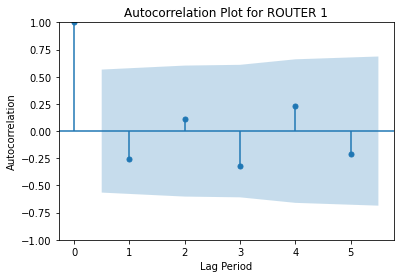

<Figure size 864x432 with 0 Axes>

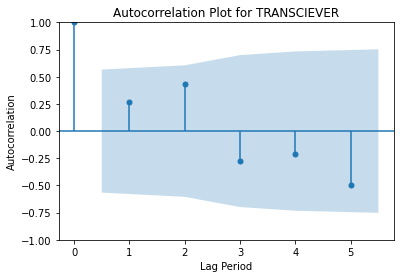

<Figure size 864x432 with 0 Axes>

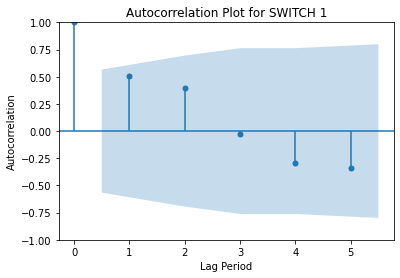

<Figure size 864x432 with 0 Axes>

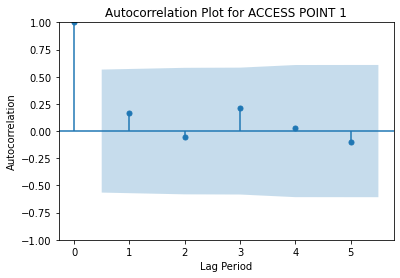

<Figure size 864x432 with 0 Axes>

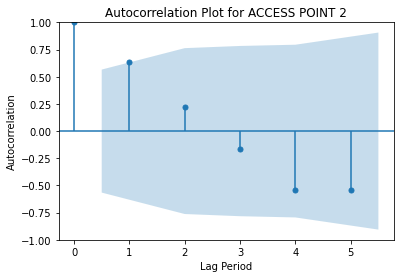

<Figure size 864x432 with 0 Axes>

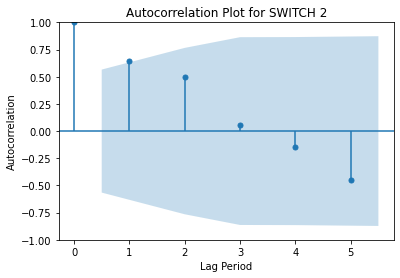

<Figure size 864x432 with 0 Axes>

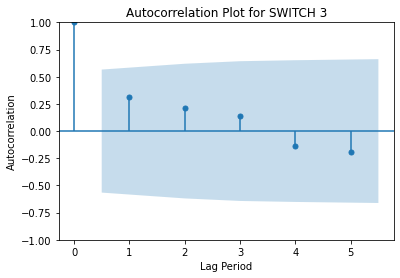

<Figure size 864x432 with 0 Axes>

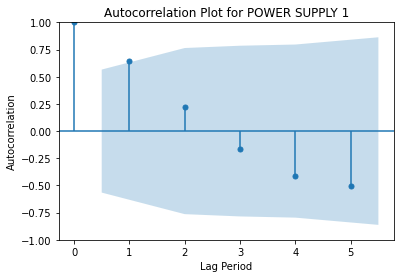

<Figure size 864x432 with 0 Axes>

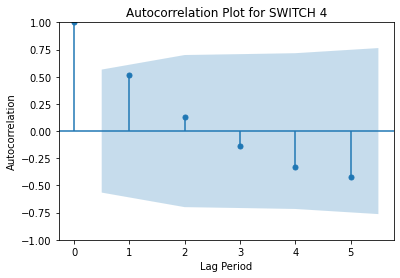

<Figure size 864x432 with 0 Axes>

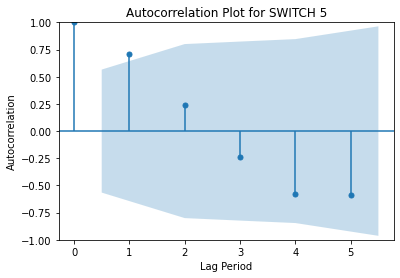

<Figure size 864x432 with 0 Axes>

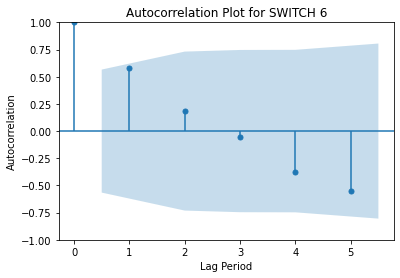

<Figure size 864x432 with 0 Axes>

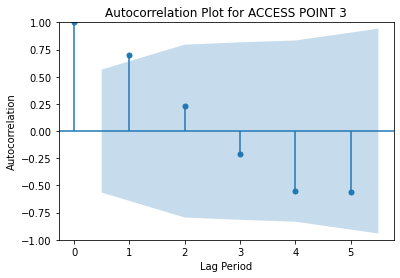

<Figure size 864x432 with 0 Axes>

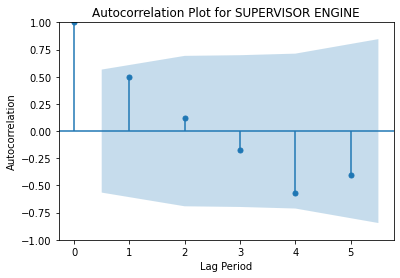

<Figure size 864x432 with 0 Axes>

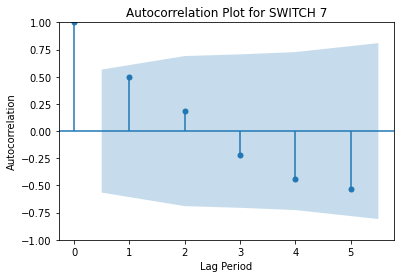

<Figure size 864x432 with 0 Axes>

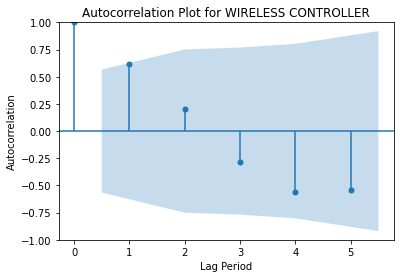

<Figure size 864x432 with 0 Axes>

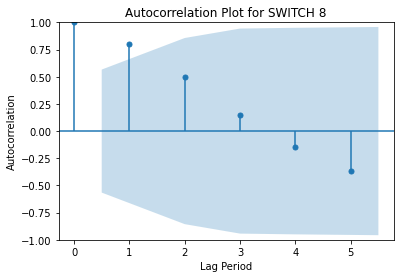

<Figure size 864x432 with 0 Axes>

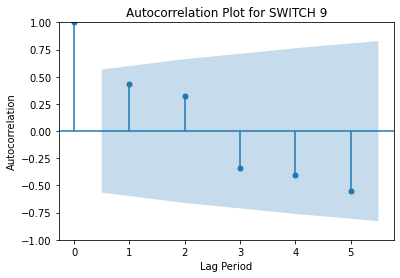

<Figure size 864x432 with 0 Axes>

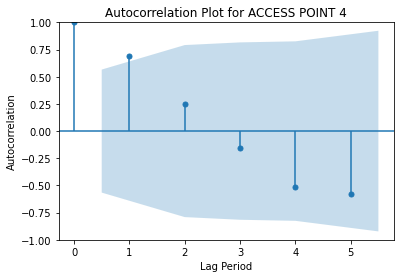

<Figure size 864x432 with 0 Axes>

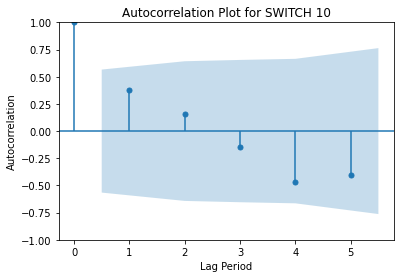

<Figure size 864x432 with 0 Axes>

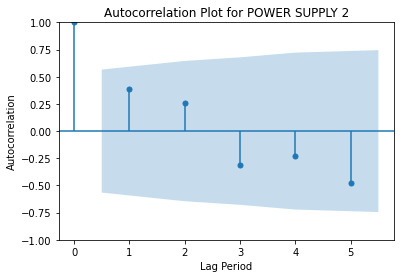

<Figure size 864x432 with 0 Axes>

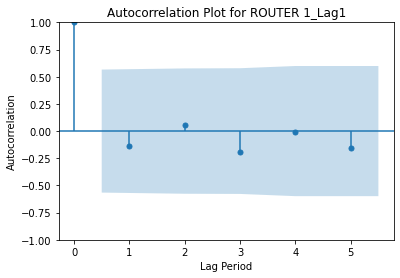

<Figure size 864x432 with 0 Axes>

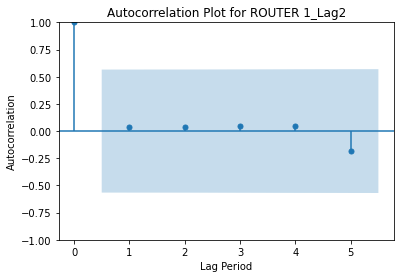

<Figure size 864x432 with 0 Axes>

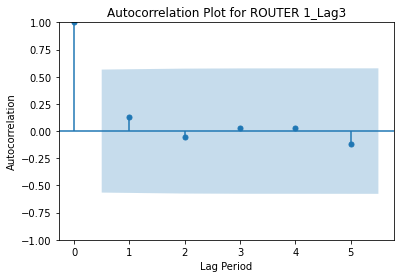

<Figure size 864x432 with 0 Axes>

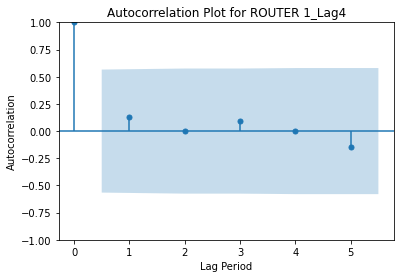

<Figure size 864x432 with 0 Axes>

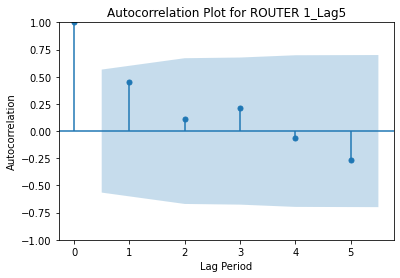

<Figure size 864x432 with 0 Axes>

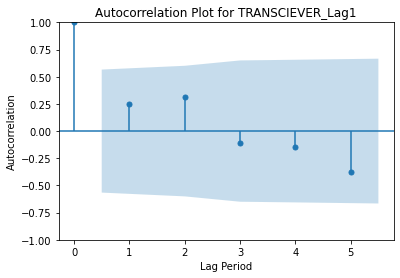

<Figure size 864x432 with 0 Axes>

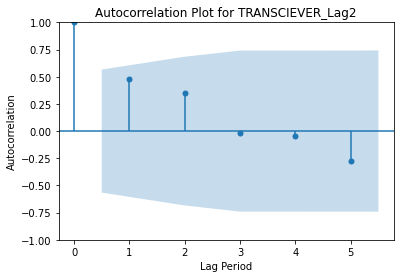

<Figure size 864x432 with 0 Axes>

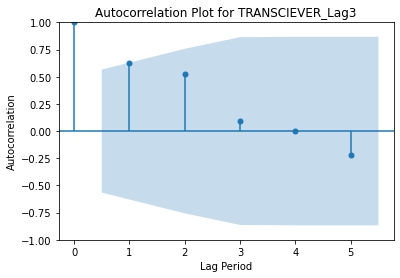

<Figure size 864x432 with 0 Axes>

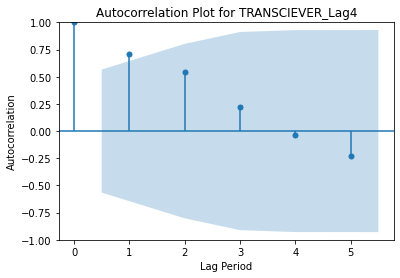

<Figure size 864x432 with 0 Axes>

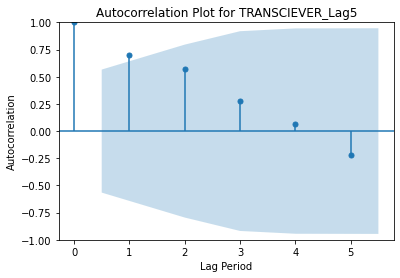

<Figure size 864x432 with 0 Axes>

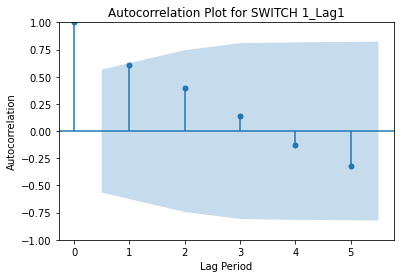

<Figure size 864x432 with 0 Axes>

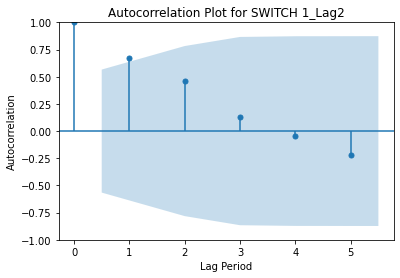

<Figure size 864x432 with 0 Axes>

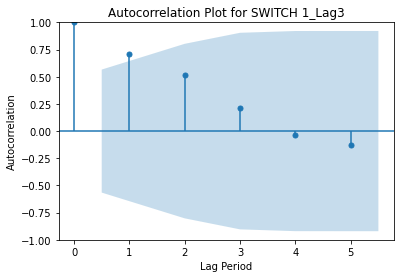

<Figure size 864x432 with 0 Axes>

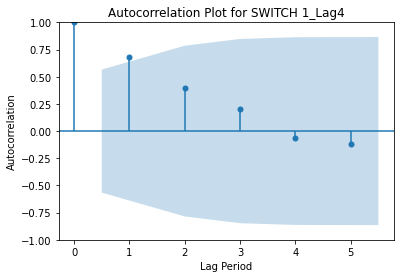

<Figure size 864x432 with 0 Axes>

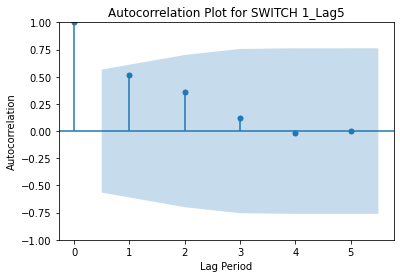

<Figure size 864x432 with 0 Axes>

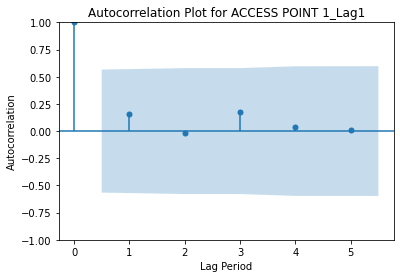

<Figure size 864x432 with 0 Axes>

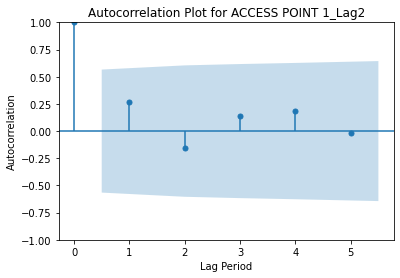

<Figure size 864x432 with 0 Axes>

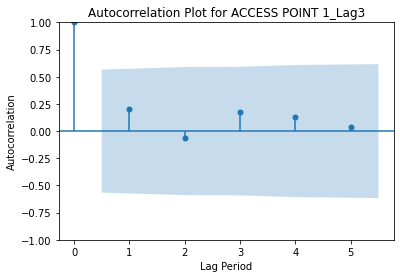

<Figure size 864x432 with 0 Axes>

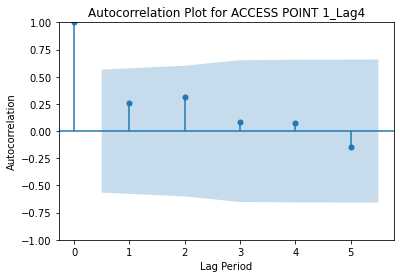

<Figure size 864x432 with 0 Axes>

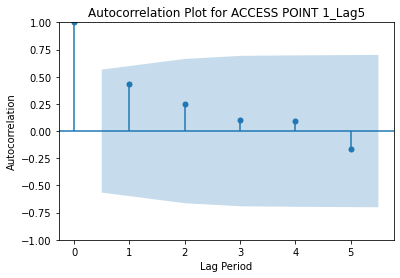

<Figure size 864x432 with 0 Axes>

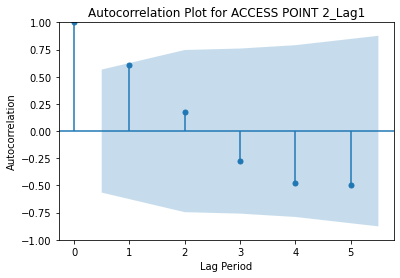

<Figure size 864x432 with 0 Axes>

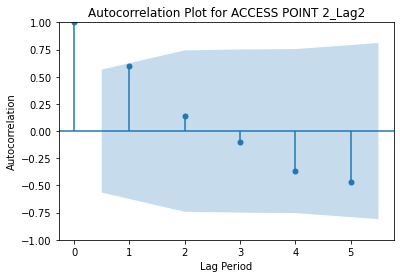

<Figure size 864x432 with 0 Axes>

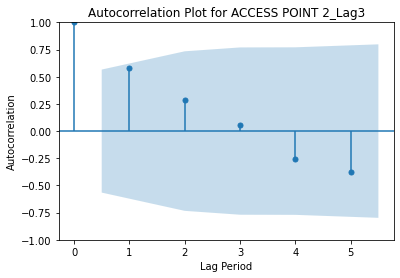

<Figure size 864x432 with 0 Axes>

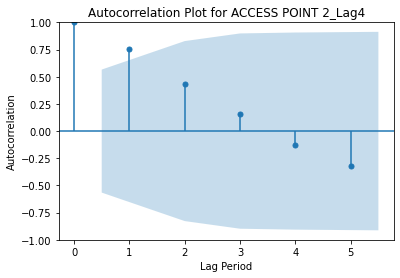

<Figure size 864x432 with 0 Axes>

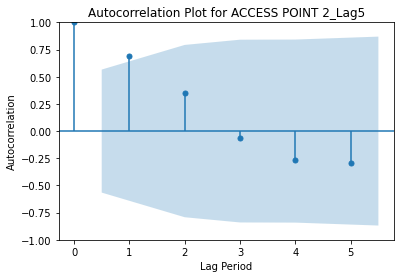

<Figure size 864x432 with 0 Axes>

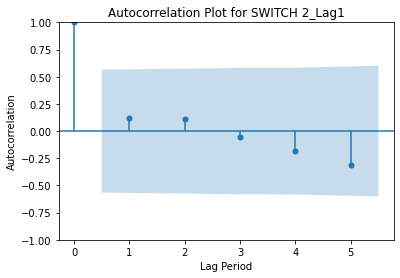

<Figure size 864x432 with 0 Axes>

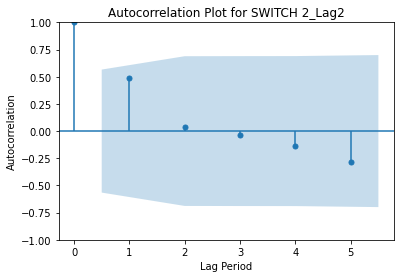

<Figure size 864x432 with 0 Axes>

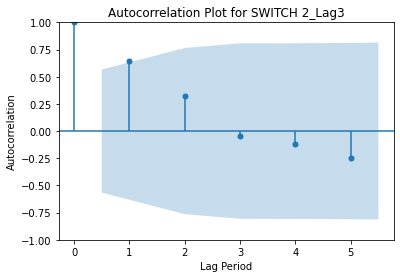

<Figure size 864x432 with 0 Axes>

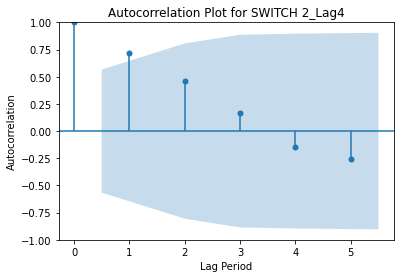

<Figure size 864x432 with 0 Axes>

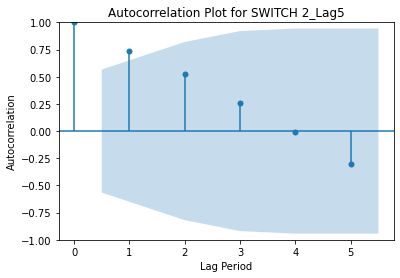

<Figure size 864x432 with 0 Axes>

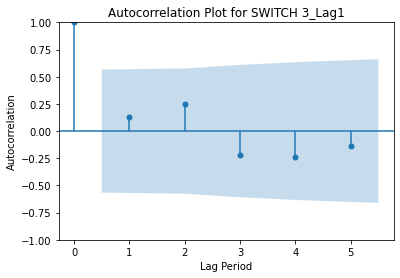

<Figure size 864x432 with 0 Axes>

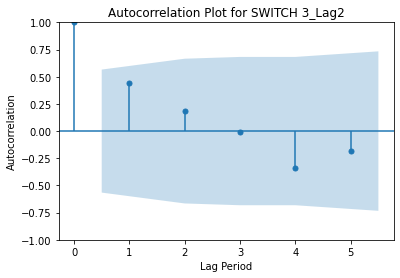

<Figure size 864x432 with 0 Axes>

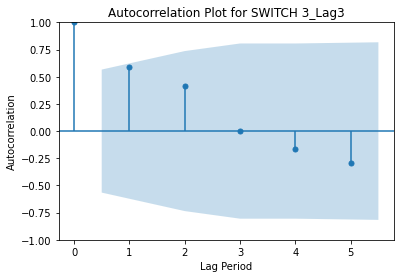

<Figure size 864x432 with 0 Axes>

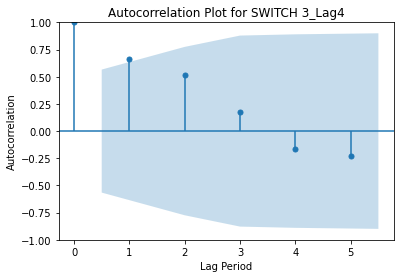

<Figure size 864x432 with 0 Axes>

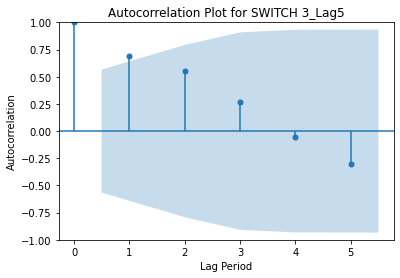

<Figure size 864x432 with 0 Axes>

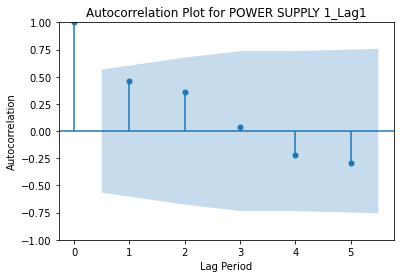

<Figure size 864x432 with 0 Axes>

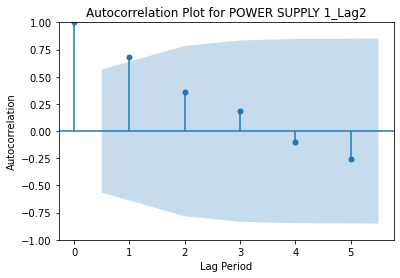

<Figure size 864x432 with 0 Axes>

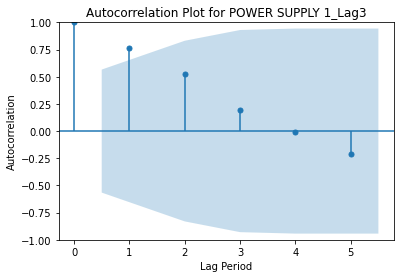

<Figure size 864x432 with 0 Axes>

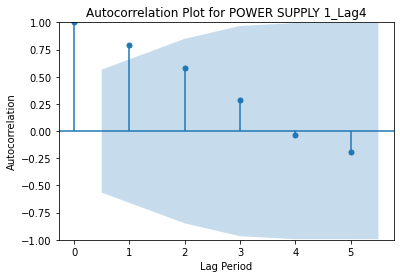

<Figure size 864x432 with 0 Axes>

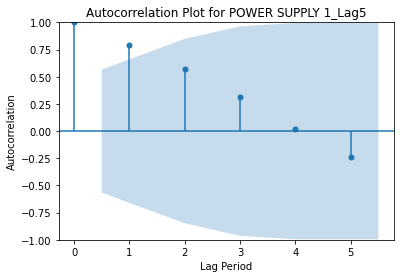

<Figure size 864x432 with 0 Axes>

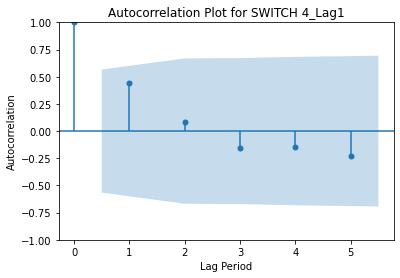

<Figure size 864x432 with 0 Axes>

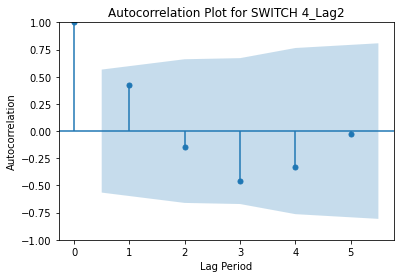

<Figure size 864x432 with 0 Axes>

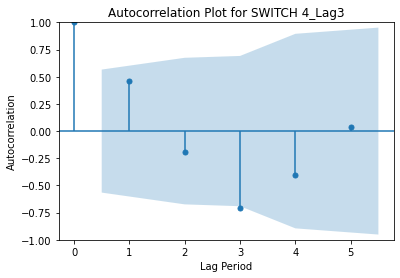

<Figure size 864x432 with 0 Axes>

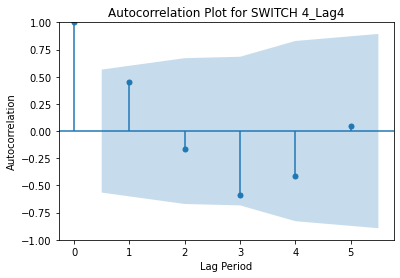

<Figure size 864x432 with 0 Axes>

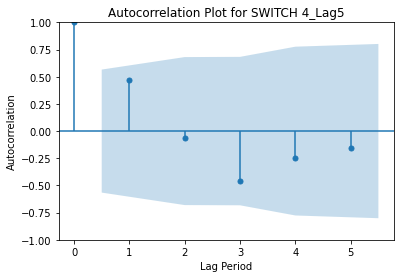

<Figure size 864x432 with 0 Axes>

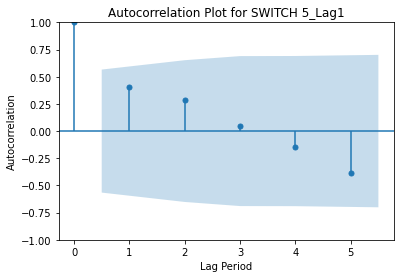

<Figure size 864x432 with 0 Axes>

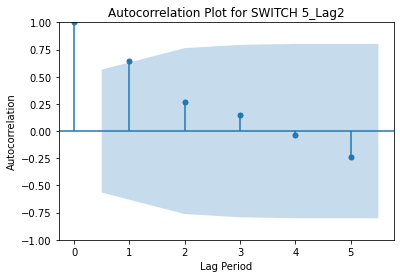

<Figure size 864x432 with 0 Axes>

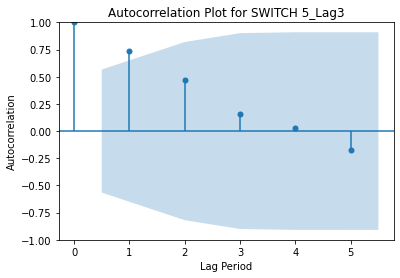

<Figure size 864x432 with 0 Axes>

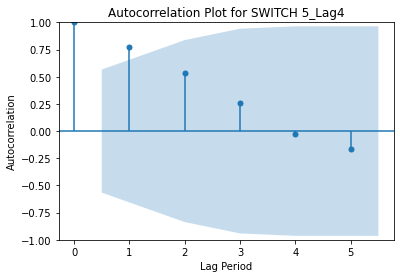

<Figure size 864x432 with 0 Axes>

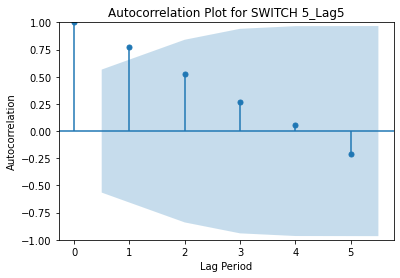

<Figure size 864x432 with 0 Axes>

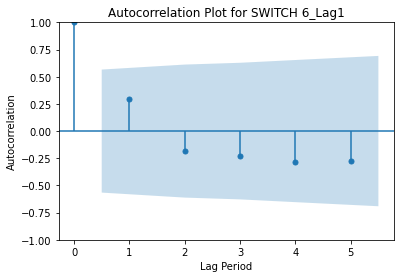

<Figure size 864x432 with 0 Axes>

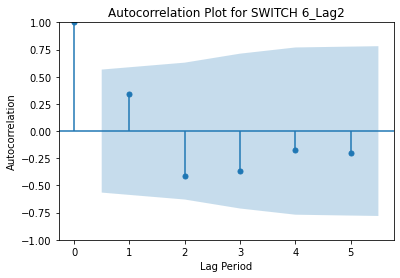

<Figure size 864x432 with 0 Axes>

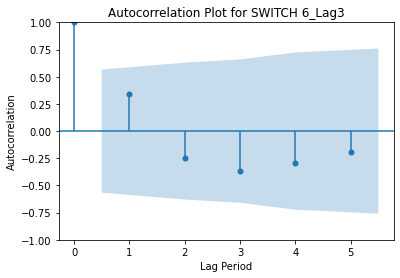

<Figure size 864x432 with 0 Axes>

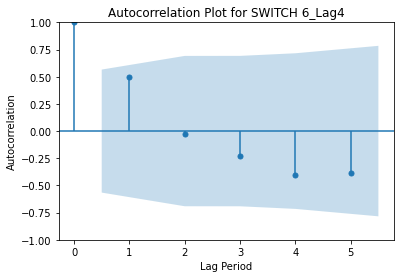

<Figure size 864x432 with 0 Axes>

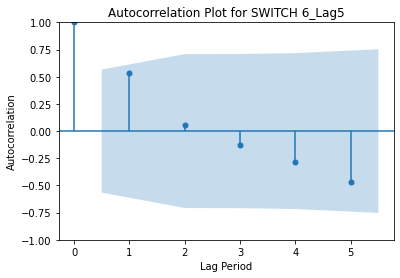

<Figure size 864x432 with 0 Axes>

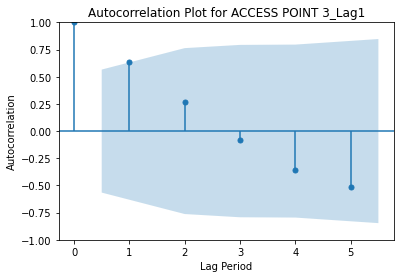

<Figure size 864x432 with 0 Axes>

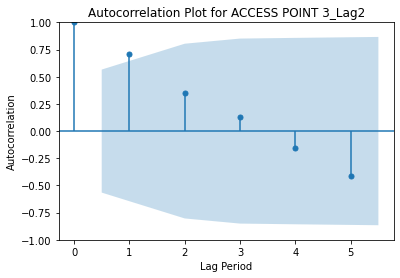

<Figure size 864x432 with 0 Axes>

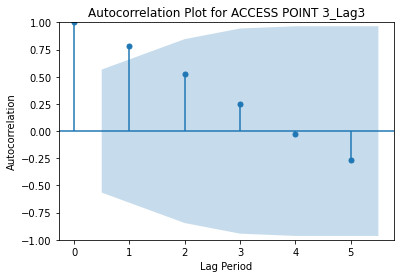

<Figure size 864x432 with 0 Axes>

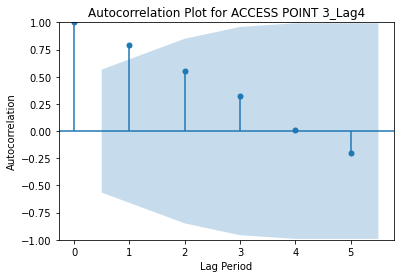

<Figure size 864x432 with 0 Axes>

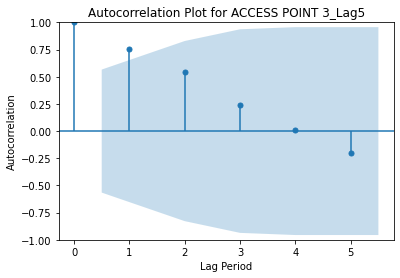

<Figure size 864x432 with 0 Axes>

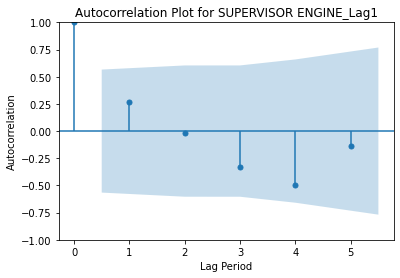

<Figure size 864x432 with 0 Axes>

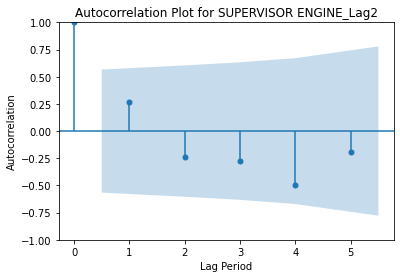

<Figure size 864x432 with 0 Axes>

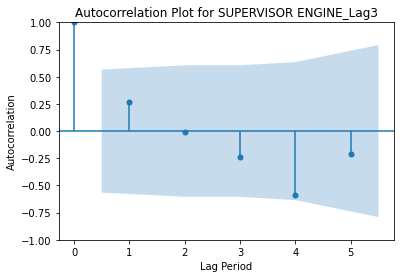

<Figure size 864x432 with 0 Axes>

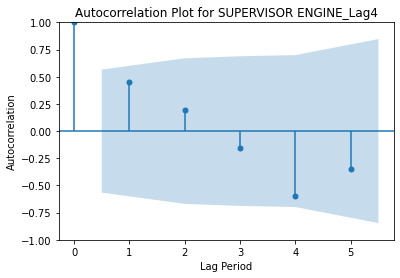

<Figure size 864x432 with 0 Axes>

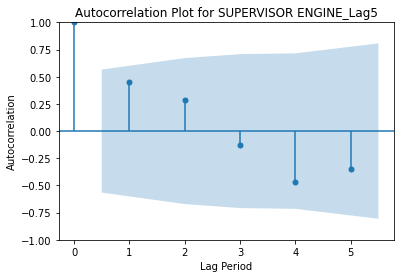

<Figure size 864x432 with 0 Axes>

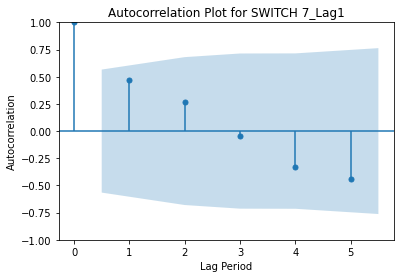

<Figure size 864x432 with 0 Axes>

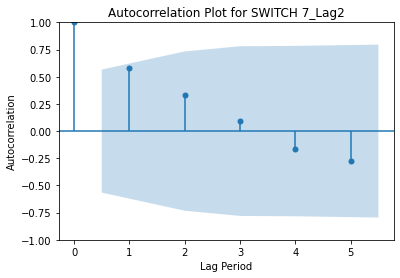

<Figure size 864x432 with 0 Axes>

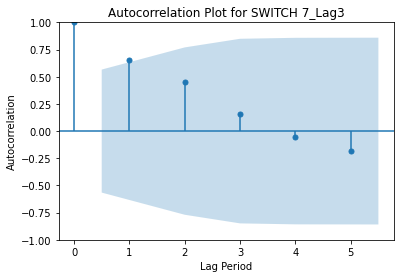

<Figure size 864x432 with 0 Axes>

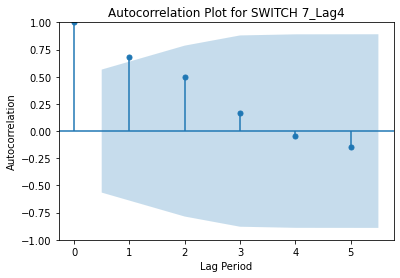

<Figure size 864x432 with 0 Axes>

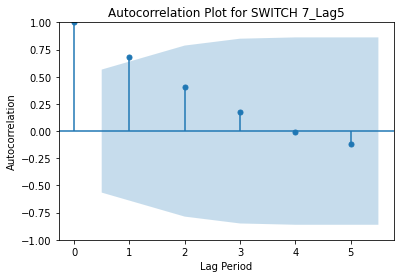

<Figure size 864x432 with 0 Axes>

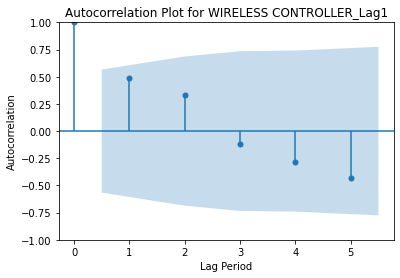

<Figure size 864x432 with 0 Axes>

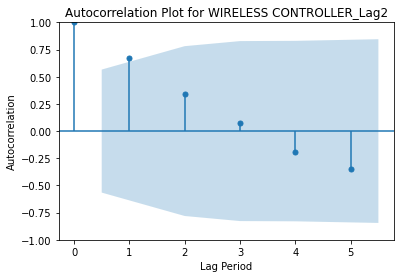

<Figure size 864x432 with 0 Axes>

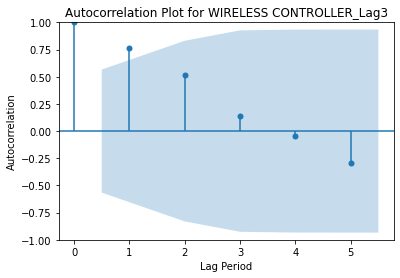

<Figure size 864x432 with 0 Axes>

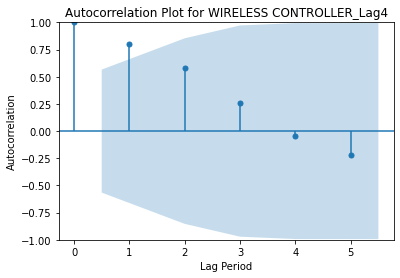

<Figure size 864x432 with 0 Axes>

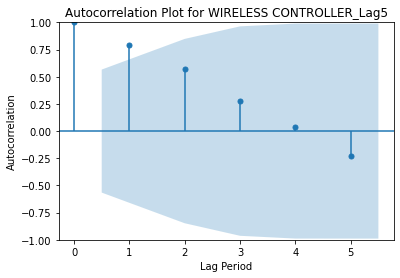

<Figure size 864x432 with 0 Axes>

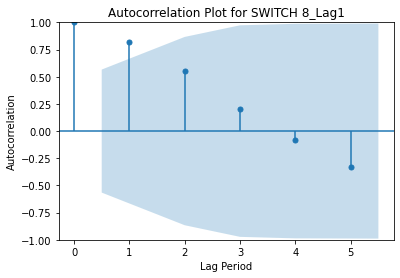

<Figure size 864x432 with 0 Axes>

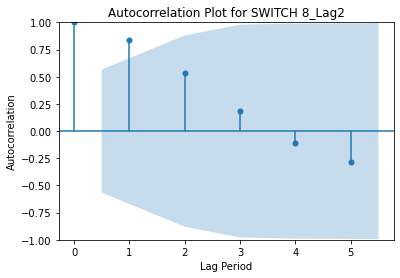

<Figure size 864x432 with 0 Axes>

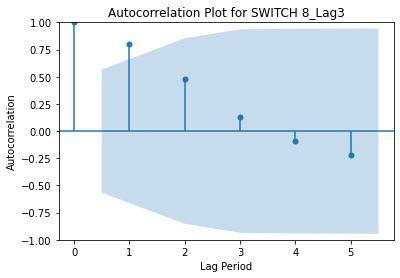

<Figure size 864x432 with 0 Axes>

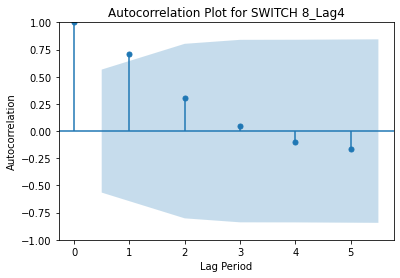

<Figure size 864x432 with 0 Axes>

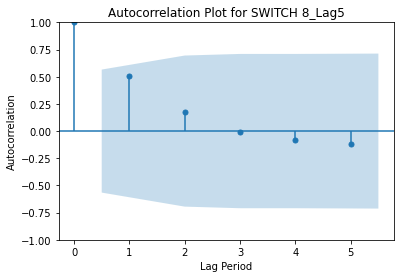

<Figure size 864x432 with 0 Axes>

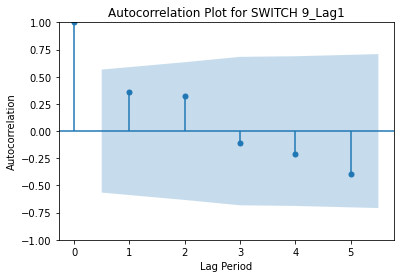

<Figure size 864x432 with 0 Axes>

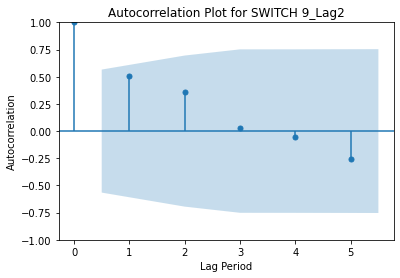

<Figure size 864x432 with 0 Axes>

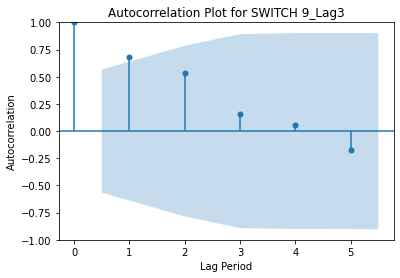

<Figure size 864x432 with 0 Axes>

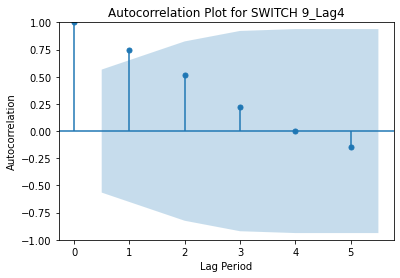

<Figure size 864x432 with 0 Axes>

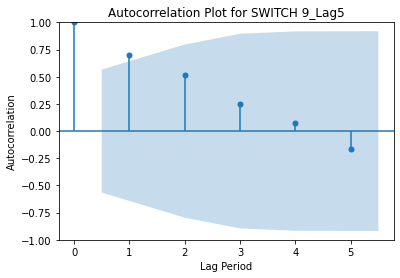

<Figure size 864x432 with 0 Axes>

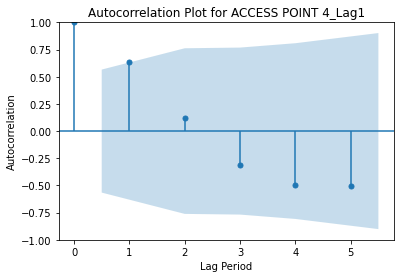

<Figure size 864x432 with 0 Axes>

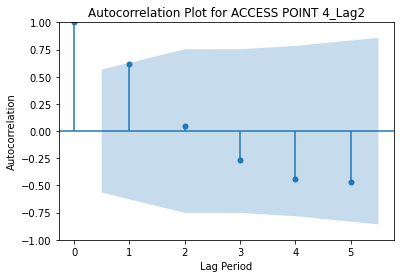

<Figure size 864x432 with 0 Axes>

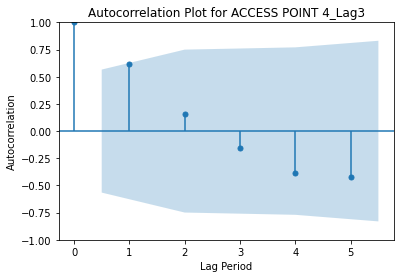

<Figure size 864x432 with 0 Axes>

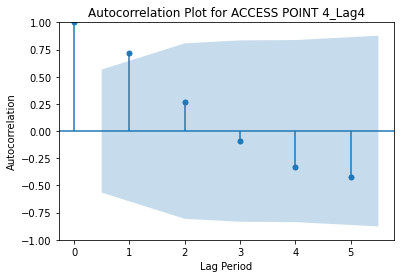

<Figure size 864x432 with 0 Axes>

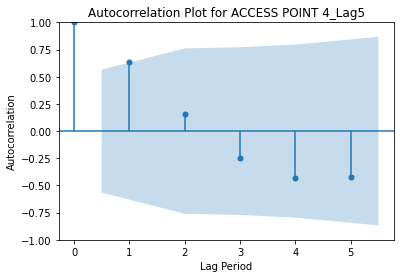

<Figure size 864x432 with 0 Axes>

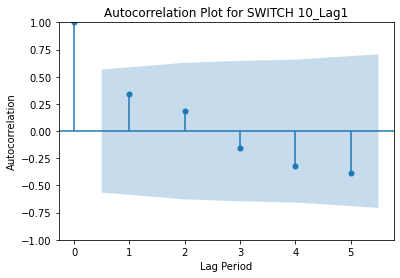

<Figure size 864x432 with 0 Axes>

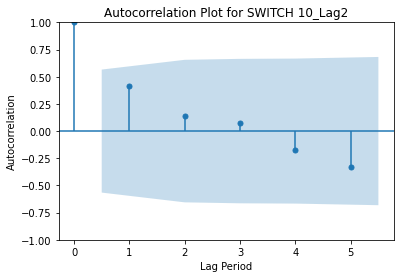

<Figure size 864x432 with 0 Axes>

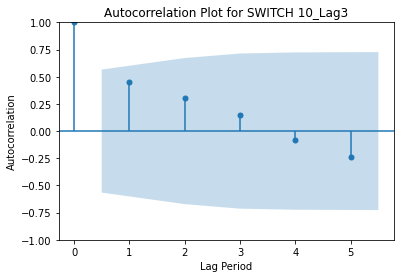

<Figure size 864x432 with 0 Axes>

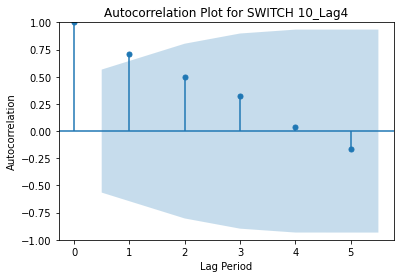

<Figure size 864x432 with 0 Axes>

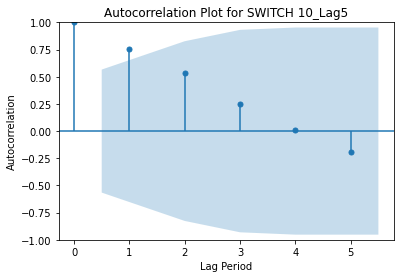

<Figure size 864x432 with 0 Axes>

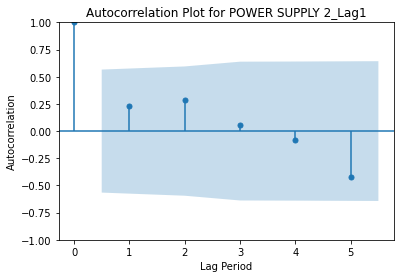

<Figure size 864x432 with 0 Axes>

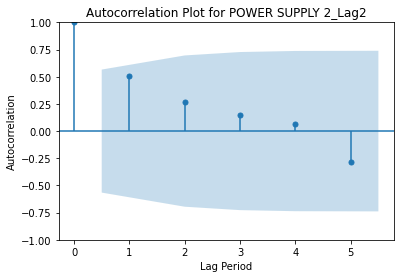

<Figure size 864x432 with 0 Axes>

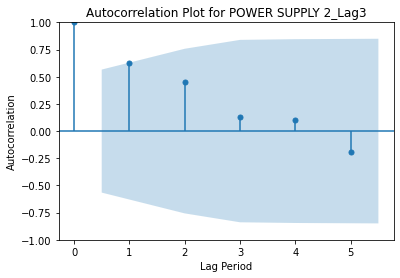

<Figure size 864x432 with 0 Axes>

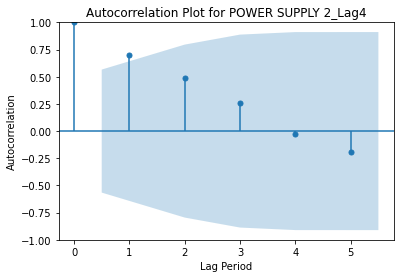

<Figure size 864x432 with 0 Axes>

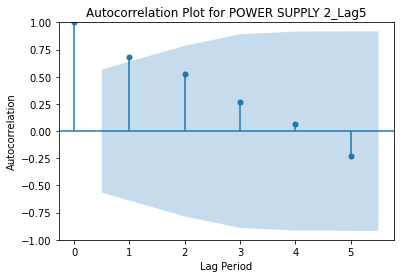

In [41]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# List of products
products = new.columns[1:]

# Iterate over each product
for product in products:
    # Plot ACF for the current product
    plt.figure(figsize=(12, 6))  # Adjust figure size if needed
    plot_acf(scaled_iterative_df[product], lags=lag_periods)
    plt.title(f'Autocorrelation Plot for {product}')
    plt.xlabel('Lag Period')
    plt.ylabel('Autocorrelation')
    plt.show()


Rolling window features

In [42]:
products = new.columns[1:]
window_size = 3

for product in products:
    scaled_iterative_df[f'{product}_Rolling_Mean_Sales'] = scaled_iterative_df[product].rolling(window=window_size, min_periods=1).mean()
    scaled_iterative_df[f'{product}_Rolling_Max_Sales'] = scaled_iterative_df[product].rolling(window=window_size, min_periods=1).max()
    scaled_iterative_df[f'{product}_Rolling_Min_Sales'] = scaled_iterative_df[product].rolling(window=window_size, min_periods=1).min()

    scaled_0_df[f'{product}_Rolling_Mean_Sales'] = scaled_0_df[product].rolling(window=window_size, min_periods=1).mean()
    scaled_0_df[f'{product}_Rolling_Max_Sales'] = scaled_0_df[product].rolling(window=window_size, min_periods=1).max()
    scaled_0_df[f'{product}_Rolling_Min_Sales'] = scaled_0_df[product].rolling(window=window_size, min_periods=1).max()

    scaled_spline_df[f'{product}_Rolling_Mean_Sales'] = scaled_spline_df[product].rolling(window=window_size, min_periods=1).mean()
    scaled_spline_df[f'{product}_Rolling_Max_Sales'] = scaled_spline_df[product].rolling(window=window_size, min_periods=1).max()
    scaled_spline_df[f'{product}_Rolling_Min_Sales'] = scaled_spline_df[product].rolling(window=window_size, min_periods=1).max()

    scaled_linear_df[f'{product}_Rolling_Mean_Sales'] = scaled_linear_df[product].rolling(window=window_size, min_periods=1).mean()
    scaled_linear_df[f'{product}_Rolling_Max_Sales'] = scaled_linear_df[product].rolling(window=window_size, min_periods=1).max()
    scaled_linear_df[f'{product}_Rolling_Min_Sales'] = scaled_linear_df[product].rolling(window=window_size, min_periods=1).max()

# scaled_linear_df.fillna(0, inplace=True)
# scaled_iterative_df.fillna(0, inplace=True)
# scaled_0_df.fillna(0, inplace=True)
# scaled_spline_df.fillna(0, inplace=True)


C:\Users\kedar\AppData\Local\Temp/ipykernel_18452/991332886.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_iterative_df[f'{product}_Rolling_Min_Sales'] = scaled_iterative_df[product].rolling(window=window_size, min_periods=1).min()
C:\Users\kedar\AppData\Local\Temp/ipykernel_18452/991332886.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_0_df[f'{product}_Rolling_Min_Sales'] = scaled_0_df[product].rolling(window=window_size, min_periods=1).max()
C:\Users\kedar\AppData\Local\Temp/ipykernel_18452/991332886.p

In [43]:
scaled_iterative_df

Product Name       Date     ROUTER 1  TRANSCIEVER      SWITCH 1  \
0            2020-05-01  1176.874240      87173.0     12.617558   
1            2021-08-01  1203.880419     102849.0   6431.362819   
2            2021-11-01   301.705754     126375.0   1651.992349   
3            2021-02-01   906.000000     128629.0   3651.000000   
4            2021-05-01   941.000000     179125.0  10409.000000   
5            2022-08-01   663.000000     138750.0  10575.000000   
6            2022-11-01   769.000000     208760.0  17934.000000   
7            2022-02-01  3565.000000     116126.0  15104.000000   
8            2022-05-01  1020.000000     150803.0  15525.000000   
9            2023-08-01  1670.000000      82163.0   6938.000000   
10           2023-11-01    38.000000      82408.0   9595.000000   
11           2023-02-01  2141.000000      67132.0   9231.000000   

Product Name  ACCESS POINT 1  ACCESS POINT 2  SWITCH 2  SWITCH 3  \
0               35383.653311    48605.014593   13432.0   28585.0   
1               34595.130943    62326.892737   12463.0   19686.0   
2               14749.609871    10265.570119   13452.0   44724.0   
3               37406.301862   -59390.459949   14581.0   37781.0   
4               38594.816720  -132651.395018   15831.0   31905.0   
5               57206.758834  -122373.227714   13864.0   37888.0   
6                9576.000000  -162594.048404   15012.0   32689.0   
7               46029.000000  -180301.038476   11349.0   30442.0   
8              109452.000000    26769.000000   10422.0   27028.0   
9               54955.000000    33670.000000    8726.0   21246.0   
10              60478.000000    74853.000000   10185.0   21149.0   
11              62708.000000    80944.000000    8645.0   10584.0   

Product Name  POWER SUPPLY 1     SWITCH 4  ...  \
0                   115709.0  4253.699954  ...   
1                    98337.0  4316.469328  ...   
2                   147681.0  3791.645150  ...   
3                   185327.0   177.000000  ...   
4                   194170.0   270.000000  ...   
5                   220386.0   850.000000  ...   
6                   204604.0  2717.000000  ...   
7                   194538.0  3833.000000  ...   
8                   185160.0  4279.000000  ...   
9                   147284.0  6089.000000  ...   
10                  136997.0  8063.000000  ...   
11                  100623.0  2535.000000  ...   

Product Name  POWER SUPPLY 2_Lag2_Rolling_Min_Sales  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                           22704.0   
5                                           22704.0   
6                                           24098.0   
7                                           31461.0   
8                                           35145.0   
9                                           34518.0   
10                                          34518.0   
11                                          26925.0   

Product Name  POWER SUPPLY 2_Lag3_Rolling_Mean_Sales  \
0                                           0.000000   
1                                           0.000000   
2                                           0.000000   
3                                        9426.333333   
4                                       16994.333333   
5                                       25027.000000   
6                                       26087.666667   
7                                       34189.333333   
8                                       37871.666667   
9                                       42710.666667   
10                                      38547.000000   
11                                      40367.000000   

Product Name  POWER SUPPLY 2_Lag3_Rolling_Max_Sales  \
0                                               0.0   
1                                    

periodic differences

In [44]:
# Define the number of lag quarters
lag_periods = 5

# Iterate over each lagged feature for each product
for product in columns:
    for i in range(1, lag_periods + 1):
        # Compute the periodic difference for the current lagged feature
        scaled_iterative_df[f'{product}_Lag{i}_Diff'] = scaled_iterative_df[f'{product}_Lag{i}'].diff()
        scaled_spline_df[f'{product}_Lag{i}_Diff'] = scaled_spline_df[f'{product}_Lag{i}'].diff()
        scaled_linear_df[f'{product}_Lag{i}_Diff'] = scaled_linear_df[f'{product}_Lag{i}'].diff()
        scaled_0_df[f'{product}_Lag{i}_Diff'] = scaled_0_df[f'{product}_Lag{i}'].diff()
# Fill NaN values with 0 after computing differences
scaled_iterative_df.fillna(0, inplace=True)
scaled_spline_df.fillna(0,inplace=True)
scaled_linear_df.fillna(0,inplace=True)
scaled_0_df.fillna(0,inplace=True)
scaled_iterative_df.head(10)

C:\Users\kedar\AppData\Local\Temp/ipykernel_18452/1858487643.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_iterative_df[f'{product}_Lag{i}_Diff'] = scaled_iterative_df[f'{product}_Lag{i}'].diff()
C:\Users\kedar\AppData\Local\Temp/ipykernel_18452/1858487643.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scaled_spline_df[f'{product}_Lag{i}_Diff'] = scaled_spline_df[f'{product}_Lag{i}'].diff()
C:\Users\kedar\AppData\Local\Temp/ipykernel_18452/1858487643.py:10: PerformanceWarning: DataFrame is highly fragmented.  T

Product Name       Date     ROUTER 1  TRANSCIEVER      SWITCH 1  \
0            2020-05-01  1176.874240      87173.0     12.617558   
1            2021-08-01  1203.880419     102849.0   6431.362819   
2            2021-11-01   301.705754     126375.0   1651.992349   
3            2021-02-01   906.000000     128629.0   3651.000000   
4            2021-05-01   941.000000     179125.0  10409.000000   
5            2022-08-01   663.000000     138750.0  10575.000000   
6            2022-11-01   769.000000     208760.0  17934.000000   
7            2022-02-01  3565.000000     116126.0  15104.000000   
8            2022-05-01  1020.000000     150803.0  15525.000000   
9            2023-08-01  1670.000000      82163.0   6938.000000   

Product Name  ACCESS POINT 1  ACCESS POINT 2  SWITCH 2  SWITCH 3  \
0               35383.653311    48605.014593   13432.0   28585.0   
1               34595.130943    62326.892737   12463.0   19686.0   
2               14749.609871    10265.570119   13452.0   44724.0   
3               37406.301862   -59390.459949   14581.0   37781.0   
4               38594.816720  -132651.395018   15831.0   31905.0   
5               57206.758834  -122373.227714   13864.0   37888.0   
6                9576.000000  -162594.048404   15012.0   32689.0   
7               46029.000000  -180301.038476   11349.0   30442.0   
8              109452.000000    26769.000000   10422.0   27028.0   
9               54955.000000    33670.000000    8726.0   21246.0   

Product Name  POWER SUPPLY 1     SWITCH 4  ...  SWITCH 10_Lag1_Diff  \
0                   115709.0  4253.699954  ...             0.000000   
1                    98337.0  4316.469328  ...         24885.026733   
2                   147681.0  3791.645150  ...         -4270.981223   
3                   185327.0   177.000000  ...          7922.830345   
4                   194170.0   270.000000  ...         20501.852447   
5                   220386.0   850.000000  ...         20904.366348   
6                   204604.0  2717.000000  ...         -4513.725949   
7                   194538.0  3833.000000  ...         12050.695819   
8                   185160.0  4279.000000  ...         24511.807719   
9                   147284.0  6089.000000  ...       -100764.872239   

Product Name  SWITCH 10_Lag2_Diff  SWITCH 10_Lag3_Diff  SWITCH 10_Lag4_Diff  \
0                        0.000000             0.000000             0.000000   
1                        0.000000             0.000000             0.000000   
2                    24885.026733             0.000000             0.000000   
3                    -4270.981223         24885.026733             0.000000   
4                     7922.830345         -4270.981223         24885.026733   
5                    20501.852447          7922.830345         -4270.981223   
6                    20904.366348         20501.852447          7922.830345   
7                    -4513.725949         20904.366348         20501.852447   
8                    12050.695819         -4513.725949         20904.366348   
9                    24511.807719         12050.695819         -4513.725949   

Product Name  SWITCH 10_Lag5_Diff  POWER SUPPLY 2_Lag1_Diff  \
0                        0.000000                       0.0   
1                        0.000000                   28279.0   
2                        0.000000                   -5575.0   
3                        0.000000                    1394.0   
4                        0.000000                    7363.0   
5                    24885.026733                   15548.0   
6                    -4270.981223                  -11864.0   
7                     7922.830345                   10833.0   
8                    20501.852447                  -11460.0   
9                    20904.366348                    6087.0   

Product Name  POWER SUPPLY 2_Lag2_Diff  POWER SUPPLY 2_Lag3_Diff  \
0                                  0.0                       0.0   
1                              

MODELS

PROPHET

In [45]:
# ! pip install fbprophet

In [46]:
# # on iterative imputed dataset
# new['Date'] = pd.to_datetime(new['Date'])
# new

In [47]:
!python -m pip install prophet

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [48]:
# from prophet import Prophet
# # Loop over each product column (excluding 'Date')
# for product_column in new.columns[1:]:
#     # Select 'Date' and the current product column
#     product_df = new[['Date', product_column]].rename(columns={'Date': 'ds', product_column: 'y'})
    
#     # Drop any rows with missing values
#     product_df.dropna(inplace=True)
    
#     # Ensure no negative values in the 'y' column
#     product_df = product_df[product_df['y'] >= 0]
    
#     # Initialize and fit the Prophet model
#     model = Prophet()
#     model.fit(product_df)
    
#     # Create future dates for forecasting
#     future_dates = model.make_future_dataframe(periods=4, freq='Q') # making predictions at a frequency of one quarter
    
#     # Make forecasts
#     forecast = model.predict(future_dates)
    
#     # Store the forecast results in a separate DataFrame or data structure
#     # You can print, save, or perform further analysis on the forecast data
#     print(f'Forecast for {product_column}:')
#     print('\n')
#     forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]  # Print the last 5 forecasted values
#     print('\n')

In [49]:
len(transposed.columns[1:])

20

In [50]:
print(scaled_iterative_df.columns)

Index(['Date', 'ROUTER 1', 'TRANSCIEVER', 'SWITCH 1', 'ACCESS POINT 1',
       'ACCESS POINT 2', 'SWITCH 2', 'SWITCH 3', 'POWER SUPPLY 1', 'SWITCH 4',
       ...
       'SWITCH 10_Lag1_Diff', 'SWITCH 10_Lag2_Diff', 'SWITCH 10_Lag3_Diff',
       'SWITCH 10_Lag4_Diff', 'SWITCH 10_Lag5_Diff',
       'POWER SUPPLY 2_Lag1_Diff', 'POWER SUPPLY 2_Lag2_Diff',
       'POWER SUPPLY 2_Lag3_Diff', 'POWER SUPPLY 2_Lag4_Diff',
       'POWER SUPPLY 2_Lag5_Diff'],
      dtype='object', name='Product Name', length=581)


product:  ROUTER 1


16:58:16 - cmdstanpy - INFO - Chain [1] start processing
16:58:16 - cmdstanpy - INFO - Chain [1] done processing


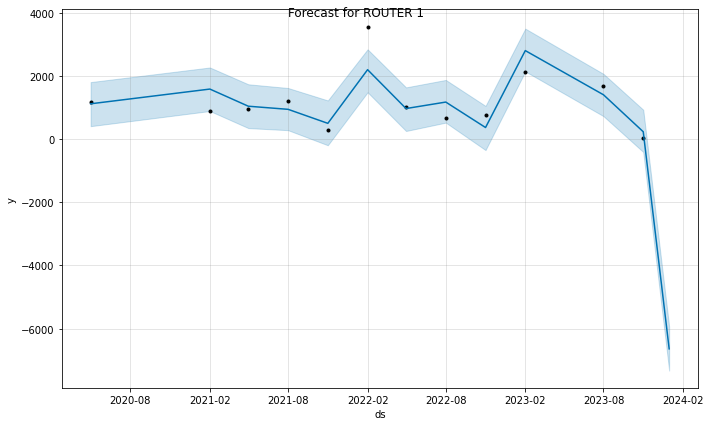

16:58:17 - cmdstanpy - INFO - Chain [1] start processing
16:58:17 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds       trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0  2020-05-01 -351.345723   411.924282  1808.005845  -351.345723  -351.345723   
1  2021-02-01 -245.508705   891.924979  2270.702186  -245.508705  -245.508705   
2  2021-05-01 -211.380102   351.819124  1738.777612  -211.380102  -211.380102   
3  2021-08-01 -176.101097   284.998328  1621.073449  -176.101097  -176.101097   
4  2021-11-01 -140.822091  -192.154804  1227.224615  -140.822091  -140.822091   
5  2022-02-01 -105.543085  1485.571951  2845.944949  -105.543085  -105.543085   
6  2022-05-01  -71.414483   259.153818  1640.844523   -71.414483   -71.414483   
7  2022-08-01  -36.135478   524.472590  1876.332346   -36.135478   -36.135478   
8  2022-11-01   -0.856474  -345.348780  1053.658027    -0.856474    -0.856474   
9  2023-02-01   34.422531  2146.603924  3501.584296    34.422531    34.422531   
10 2023-08-01  103.830138   728.853691  2068.368446   103.830138   103.830138   
11 2023-11-01  139

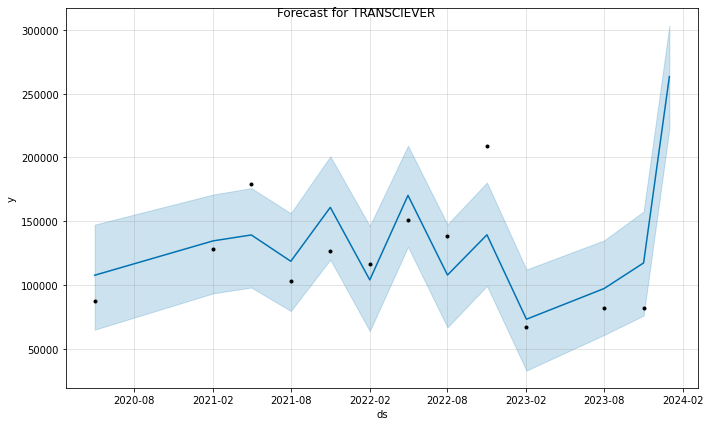

16:58:17 - cmdstanpy - INFO - Chain [1] start processing
16:58:17 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01 -44319.330480   65056.945719  147369.567051 -44319.330480   
1  2021-02-01 -50389.106969   93487.428127  170942.703748 -50389.106969   
2  2021-05-01 -52346.389964   98079.809937  175949.957244 -52346.389964   
3  2021-08-01 -54369.648791   79680.254953  156255.080736 -54369.648791   
4  2021-11-01 -56392.907618  119954.285723  200863.459042 -56392.907618   
5  2022-02-01 -58416.166445   63963.693276  146332.393109 -58416.166445   
6  2022-05-01 -60373.449441  130015.407623  209135.827225 -60373.449441   
7  2022-08-01 -62396.708265   66854.077601  147596.196284 -62396.708265   
8  2022-11-01 -64419.967094   99401.819987  180323.886975 -64419.967094   
9  2023-02-01 -66443.225919   33017.997663  112167.392612 -66443.225919   
10 2023-08-01 -70423.767739   60947.228287  135049.654463 -70423.767739   
11 2023-11-01 -72447.026565   76109.154743  157611.681836 -72447.026565   
12 2023-12-31 -

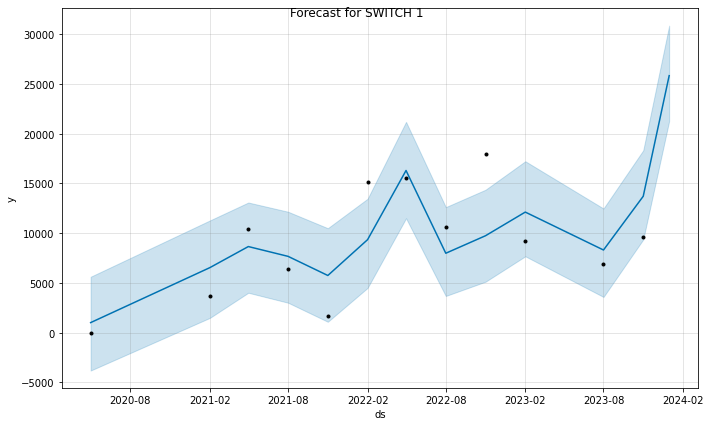

16:58:17 - cmdstanpy - INFO - Chain [1] start processing
16:58:18 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend    yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01 -3367.700322  -3809.026848   5614.957860 -3367.700322   
1  2021-02-01  -841.731505   1483.474255  11271.860319  -841.731505   
2  2021-05-01   -27.198082   4008.376498  13074.069795   -27.198082   
3  2021-08-01   814.791524   3006.405996  12147.004315   814.791524   
4  2021-11-01  1656.781130   1091.751952  10493.038865  1656.781130   
5  2022-02-01  2498.770737   4495.407043  13450.938912  2498.770737   
6  2022-05-01  3313.304161  11492.550625  21175.856966  3313.304161   
7  2022-08-01  4155.293769   3684.114261  12610.329128  4155.293769   
8  2022-11-01  4997.283377   5117.241843  14358.733749  4997.283377   
9  2023-02-01  5839.272984   7672.113809  17220.818920  5839.272984   
10 2023-08-01  7495.796016   3585.236071  12471.876217  7495.796016   
11 2023-11-01  8337.785623   9361.344059  18320.815163  8337.785623   
12 2023-12-31  8886.909280  21261.977147  30844.377894  8886.909269

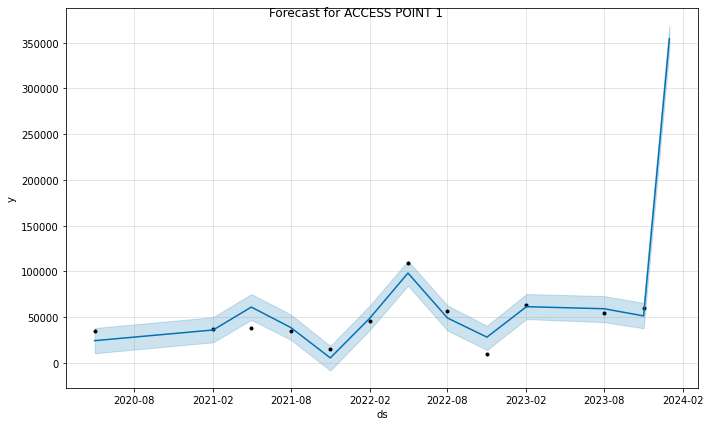

16:58:18 - cmdstanpy - INFO - Chain [1] start processing
16:58:18 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds          trend     yhat_lower     yhat_upper    trend_lower  \
0  2020-05-01   31107.900180   10568.420661   38062.660946   31107.900180   
1  2021-02-01   45531.126689   22459.231675   49999.937419   45531.126689   
2  2021-05-01   50182.094656   47012.794745   75224.895239   50182.094656   
3  2021-08-01   54989.836825   25280.028925   52895.148568   54989.836825   
4  2021-11-01   59797.578994   -8376.168238   18418.251191   59797.578994   
5  2022-02-01   64605.321166   35953.102314   62740.284771   64605.321166   
6  2022-05-01   69256.289135   84359.819128  111566.974898   69256.289135   
7  2022-08-01   74064.031304   35339.759575   62679.260132   74064.031304   
8  2022-11-01   78871.773476   14079.711719   40619.723277   78871.773476   
9  2023-02-01   83679.515648   47909.609261   75231.752079   83679.515648   
10 2023-08-01   93138.225791   44465.264802   73009.489689   93138.225791   
11 2023-11-01   97945.967963   37807.035108   65615.050785   97945

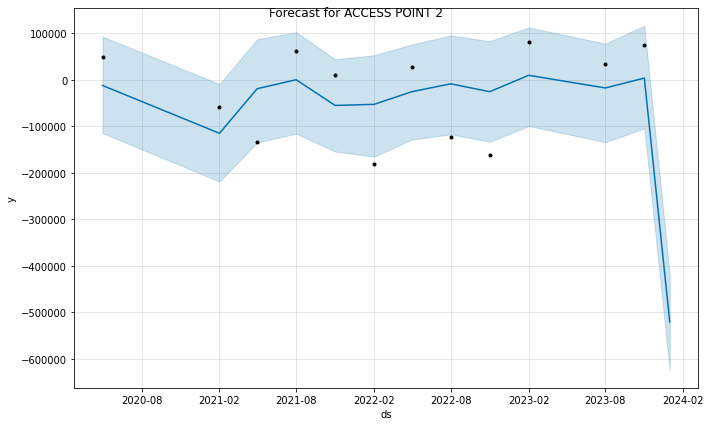

16:58:18 - cmdstanpy - INFO - Chain [1] start processing
16:58:18 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01  12179.046667 -114622.022758   93161.330551  12179.046667   
1  2021-02-01  25523.296535 -218683.635188   -9116.567763  25523.296535   
2  2021-05-01  29826.333650 -134700.806758   87425.233618  29826.333650   
3  2021-08-01  34274.416944 -115599.409998  102536.220625  34274.416944   
4  2021-11-01  38722.500231 -154042.966393   44320.818542  38722.500231   
5  2022-02-01  43170.583508 -165068.968913   53011.897980  43170.583508   
6  2022-05-01  47473.620558 -128314.952124   75980.077151  47473.620558   
7  2022-08-01  51921.703842 -117119.806822   95562.434570  51921.703842   
8  2022-11-01  56369.787102 -133071.952877   83027.206335  56369.787102   
9  2023-02-01  60817.870339  -99156.916820  112567.905715  60817.870339   
10 2023-08-01  69568.990619 -133982.784296   78023.067289  69568.990619   
11 2023-11-01  74017.073856 -104192.411838  116555.302646  74017.073856   
12 2023-12-31  

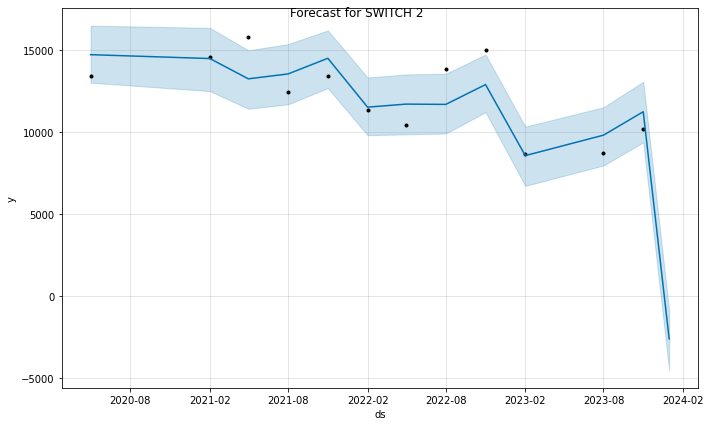

16:58:19 - cmdstanpy - INFO - Chain [1] start processing


FORECAST:            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-05-01  -5199.612795  13016.523175  16497.951313  -5199.612795   
1  2021-02-01  -6621.101976  12501.091647  16362.756548  -6621.101976   
2  2021-05-01  -7079.480733  11422.791125  14991.409727  -7079.480733   
3  2021-08-01  -7553.310461  11692.594845  15371.699971  -7553.310461   
4  2021-11-01  -8027.140188  12686.314121  16207.284659  -8027.140188   
5  2022-02-01  -8500.969915   9810.464960  13331.630353  -8500.969915   
6  2022-05-01  -8959.348673   9862.183425  13520.078223  -8959.348673   
7  2022-08-01  -9433.178400   9914.149090  13560.441501  -9433.178400   
8  2022-11-01  -9907.008128  11213.127952  14735.289333  -9907.008128   
9  2023-02-01 -10380.837855   6716.911985  10331.394900 -10380.837855   
10 2023-08-01 -11313.046341   7960.407416  11516.241872 -11313.046341   
11 2023-11-01 -11786.876068   9377.196518  13075.651313 -11786.876068   
12 2023-12-31 -12095.895456  -4558.445914

16:58:19 - cmdstanpy - INFO - Chain [1] done processing


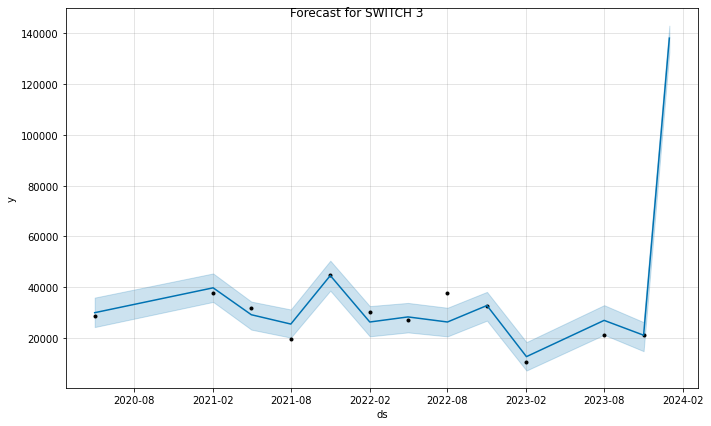

16:58:19 - cmdstanpy - INFO - Chain [1] start processing
16:58:19 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01 -10679.107272   24327.977660   35924.333510 -10679.107272   
1  2021-02-01 -15318.203936   34227.735363   45429.889068 -15318.203936   
2  2021-05-01 -16814.144527   23328.410368   34356.826428 -16814.144527   
3  2021-08-01 -18360.510081   20194.631578   31263.074311 -18360.510081   
4  2021-11-01 -19906.875636   38655.723055   50456.684865 -19906.875636   
5  2022-02-01 -21453.241190   20689.545216   32588.426394 -21453.241190   
6  2022-05-01 -22949.181780   22240.879557   33842.247474 -22949.181780   
7  2022-08-01 -24495.547334   20663.952544   31935.676697 -24495.547334   
8  2022-11-01 -26041.912888   26862.953170   38176.475630 -26041.912888   
9  2023-02-01 -27588.278443    7233.108990   18416.140621 -27588.278443   
10 2023-08-01 -30630.584588   21292.937814   32952.519621 -30630.584588   
11 2023-11-01 -32176.950142   14849.992516   26283.212234 -32176.950142   
12 2023-12-31 -

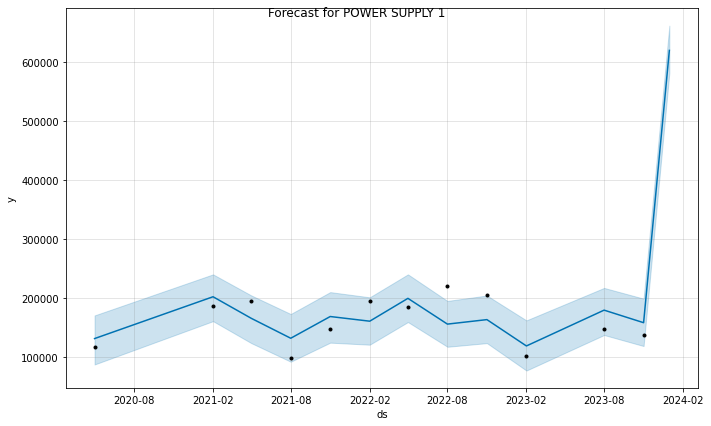

16:58:20 - cmdstanpy - INFO - Chain [1] start processing
16:58:20 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01 -51545.640768   86793.624173  170073.854389 -51545.640768   
1  2021-02-01 -50021.110912  160341.639019  239751.224947 -50021.110912   
2  2021-05-01 -49529.505259  123106.543297  204032.379235 -49529.505259   
3  2021-08-01 -49021.328637   91502.988184  172484.316419 -49021.328637   
4  2021-11-01 -48513.152017  123836.269848  209650.121115 -48513.152017   
5  2022-02-01 -48004.975394  120382.580190  200794.588147 -48004.975394   
6  2022-05-01 -47513.369741  158820.558479  239758.748709 -47513.369741   
7  2022-08-01 -47005.193109  116861.431590  194653.887358 -47005.193109   
8  2022-11-01 -46497.016489  123056.950529  203841.016997 -46497.016489   
9  2023-02-01 -45988.839871   76507.219194  161664.315813 -45988.839871   
10 2023-08-01 -44989.057612  136833.392176  216764.947925 -44989.057612   
11 2023-11-01 -44480.880994  118109.375662  198558.596245 -44480.880994   
12 2023-12-31 -

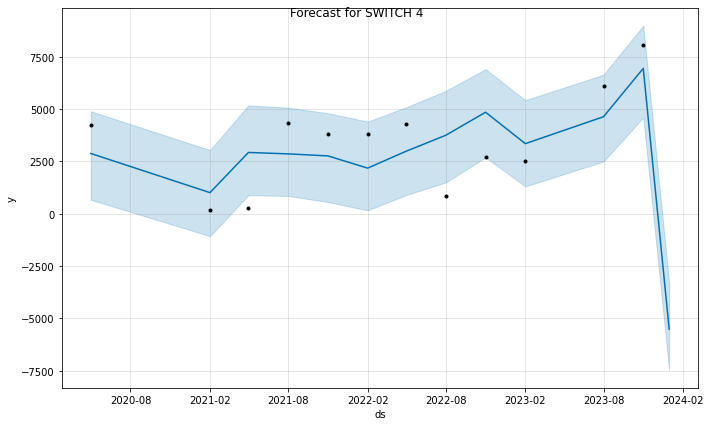

16:58:20 - cmdstanpy - INFO - Chain [1] start processing
16:58:20 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2020-05-01  1281.234889   671.764431  4899.418309  1281.234889   
1  2021-02-01  2041.569409 -1068.555332  3045.663146  2041.569409   
2  2021-05-01  2286.749744   892.673587  5179.353863  2286.749744   
3  2021-08-01  2540.194584   850.571615  5069.231958  2540.194584   
4  2021-11-01  2793.639424   562.112406  4807.487380  2793.639424   
5  2022-02-01  3047.084264   166.337960  4404.443729  3047.084264   
6  2022-05-01  3292.264599   893.033065  5087.293788  3292.264599   
7  2022-08-01  3545.709439  1497.657017  5874.889390  3545.709439   
8  2022-11-01  3799.154279  2697.306976  6911.980252  3799.154279   
9  2023-02-01  4052.599120  1308.005109  5426.801483  4052.599120   
10 2023-08-01  4551.224295  2497.121891  6646.600969  4551.224295   
11 2023-11-01  4804.669135  4602.439240  8988.866541  4804.669135   
12 2023-12-31  4969.959249 -7489.364373 -3314.433928  4969.959243   

    trend_upper  additi

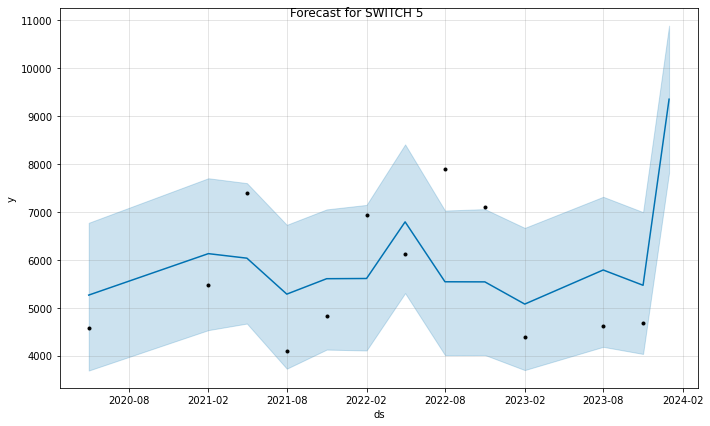

16:58:20 - cmdstanpy - INFO - Chain [1] start processing
16:58:20 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend   yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01 -1738.440362  3686.305400   6772.731524 -1738.440362   
1  2021-02-01 -1682.333190  4530.506544   7703.171167 -1682.333190   
2  2021-05-01 -1664.240660  4667.811452   7601.546706 -1664.240660   
3  2021-08-01 -1645.538269  3725.022861   6729.863777 -1645.538269   
4  2021-11-01 -1626.835878  4124.146319   7052.615098 -1626.835878   
5  2022-02-01 -1608.133487  4105.451621   7146.329848 -1608.133487   
6  2022-05-01 -1590.040957  5302.828754   8410.407592 -1590.040957   
7  2022-08-01 -1571.338566  4008.906749   7028.332346 -1571.338566   
8  2022-11-01 -1552.636176  4011.679379   7058.436439 -1552.636176   
9  2023-02-01 -1533.933785  3695.938989   6665.987979 -1533.933785   
10 2023-08-01 -1497.138864  4181.524182   7315.990801 -1497.138864   
11 2023-11-01 -1478.436474  4032.964834   6995.512469 -1478.436474   
12 2023-12-31 -1466.239262  7819.453426  10890.844491 -1466.239267   

    trend

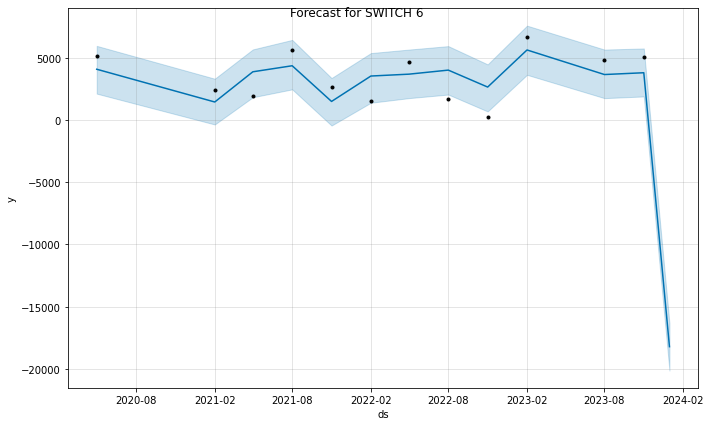

16:58:21 - cmdstanpy - INFO - Chain [1] start processing
16:58:21 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend    yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01  1606.026240   2105.095460   5938.253380  1606.026240   
1  2021-02-01  2087.129518   -370.916203   3302.258205  2087.129518   
2  2021-05-01  2242.267894   1814.909932   5653.836959  2242.267894   
3  2021-08-01  2402.635653   2448.399953   6416.236246  2402.635653   
4  2021-11-01  2563.003412   -457.698754   3356.302706  2563.003412   
5  2022-02-01  2723.371172   1374.963331   5359.843568  2723.371172   
6  2022-05-01  2878.509547   1743.635124   5641.290405  2878.509547   
7  2022-08-01  3038.877307   2031.806561   5917.895825  3038.877307   
8  2022-11-01  3199.245066    675.769121   4452.840510  3199.245066   
9  2023-02-01  3359.612825   3614.432305   7560.963852  3359.612825   
10 2023-08-01  3675.118960   1742.799269   5641.145462  3675.118960   
11 2023-11-01  3835.486720   1878.398058   5730.803135  3835.486720   
12 2023-12-31  3940.074389 -20119.028265 -16333.744866  3940.074385

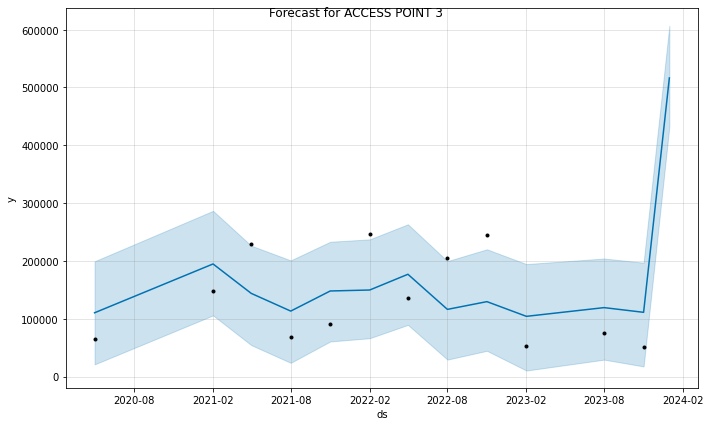

16:58:21 - cmdstanpy - INFO - Chain [1] start processing
16:58:21 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01 -25770.232323   20913.170909  199231.826351 -25770.232323   
1  2021-02-01 -30893.702086  105703.019472  286498.901379 -30893.702086   
2  2021-05-01 -32545.835446   54265.891470  226234.850647 -32545.835446   
3  2021-08-01 -34253.658699   23638.440814  200796.195112 -34253.658699   
4  2021-11-01 -35961.481946   60579.035255  233028.939631 -35961.481946   
5  2022-02-01 -37669.305198   66219.865146  237183.645923 -37669.305198   
6  2022-05-01 -39321.438569   89271.087790  263237.982572 -39321.438569   
7  2022-08-01 -41029.261822   29231.154921  199522.582917 -41029.261822   
8  2022-11-01 -42737.085083   44442.180335  219994.586447 -42737.085083   
9  2023-02-01 -44444.908346   10285.484973  194412.840674 -44444.908346   
10 2023-08-01 -47804.864982   29163.903226  204030.849088 -47804.864982   
11 2023-11-01 -49512.688244   17415.155999  196838.143202 -49512.688244   
12 2023-12-31 -

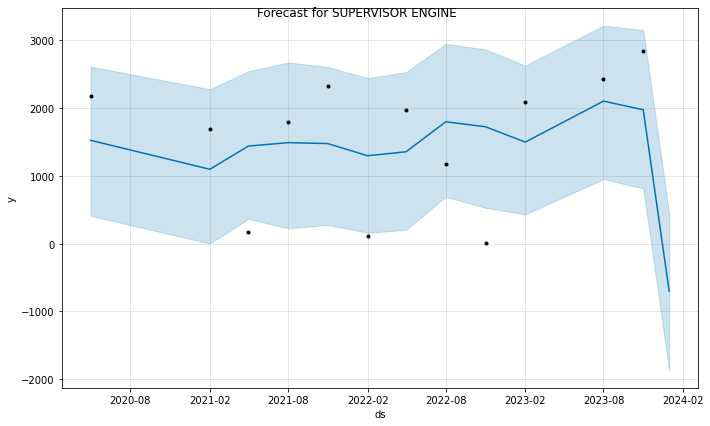

16:58:21 - cmdstanpy - INFO - Chain [1] start processing
16:58:22 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2020-05-01   559.077549   410.779466  2611.600765   559.077549   
1  2021-02-01   684.299464     1.658809  2279.278831   684.299464   
2  2021-05-01   724.678995   366.780552  2542.695940   724.678995   
3  2021-08-01   766.419633   225.838799  2673.344008   766.419633   
4  2021-11-01   808.160272   275.193003  2607.050174   808.160272   
5  2022-02-01   849.900910   160.931973  2444.049543   849.900910   
6  2022-05-01   890.280440   202.953730  2530.978810   890.280440   
7  2022-08-01   932.021078   692.762984  2948.438521   932.021078   
8  2022-11-01   973.761716   529.209584  2866.864256   973.761716   
9  2023-02-01  1015.502355   433.305079  2628.516055  1015.502355   
10 2023-08-01  1097.622524   953.025215  3217.088607  1097.622524   
11 2023-11-01  1139.363162   814.928447  3152.926945  1139.363162   
12 2023-12-31  1166.585318 -1872.532191   439.107829  1166.585316   

    trend_upper  additi

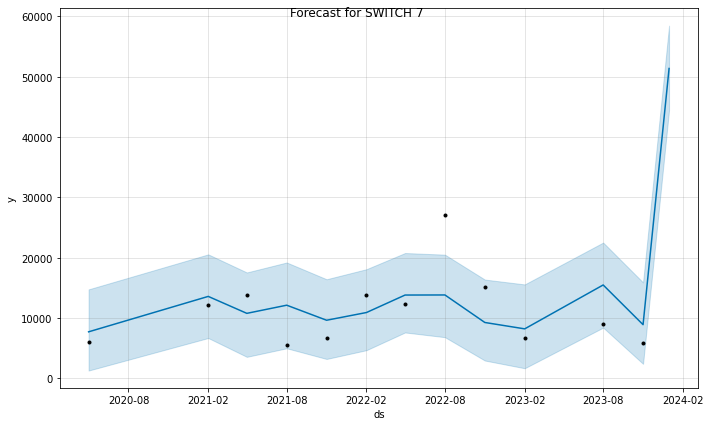

16:58:22 - cmdstanpy - INFO - Chain [1] start processing
16:58:22 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend    yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01 -4175.207100   1296.752704  14754.458837 -4175.207100   
1  2021-02-01 -3930.368871   6690.605115  20553.207881 -3930.368871   
2  2021-05-01 -3851.417414   3568.186113  17557.899361 -3851.417414   
3  2021-08-01 -3769.804671   4988.662521  19208.332392 -3769.804671   
4  2021-11-01 -3688.191929   3217.247053  16431.377264 -3688.191929   
5  2022-02-01 -3606.579186   4675.166694  18098.044585 -3606.579186   
6  2022-05-01 -3527.627729   7610.268091  20778.403539 -3527.627729   
7  2022-08-01 -3446.014986   6826.301619  20506.071118 -3446.014986   
8  2022-11-01 -3364.402244   2958.025105  16379.595008 -3364.402244   
9  2023-02-01 -3282.789503   1677.908882  15573.657325 -3282.789503   
10 2023-08-01 -3122.225305   8413.985532  22512.373206 -3122.225305   
11 2023-11-01 -3040.612563   2411.852299  15910.853353 -3040.612563   
12 2023-12-31 -2987.386862  44455.048916  58467.511533 -2987.386878

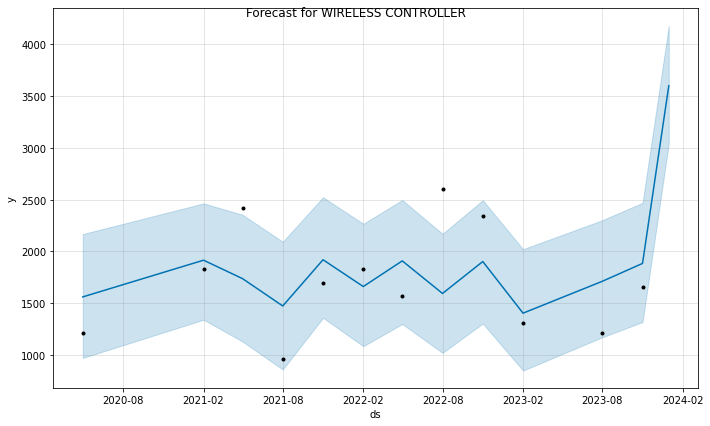

16:58:22 - cmdstanpy - INFO - Chain [1] start processing
16:58:22 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds       trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0  2020-05-01 -418.097166   970.578991  2167.235650  -418.097166  -418.097166   
1  2021-02-01 -417.440543  1339.759946  2463.191924  -417.440543  -417.440543   
2  2021-05-01 -417.228805  1129.299554  2354.060603  -417.228805  -417.228805   
3  2021-08-01 -417.009931   858.975241  2092.522413  -417.009931  -417.009931   
4  2021-11-01 -416.791056  1358.496560  2522.632643  -416.791056  -416.791056   
5  2022-02-01 -416.572182  1084.010249  2266.534248  -416.572182  -416.572182   
6  2022-05-01 -416.360445  1298.640656  2495.393237  -416.360445  -416.360445   
7  2022-08-01 -416.141570  1019.715823  2169.832443  -416.141570  -416.141570   
8  2022-11-01 -415.922696  1303.288387  2493.861599  -415.922696  -415.922696   
9  2023-02-01 -415.703821   848.835304  2020.921023  -415.703821  -415.703821   
10 2023-08-01 -415.273210  1170.442048  2300.748789  -415.273210  -415.273210   
11 2023-11-01 -415

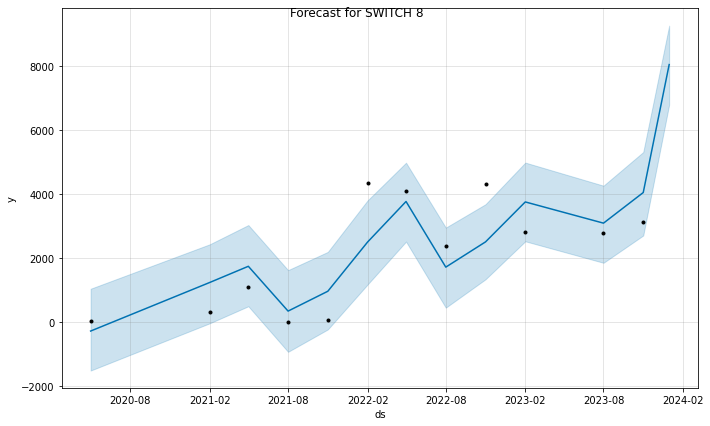

16:58:23 - cmdstanpy - INFO - Chain [1] start processing
16:58:23 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2020-05-01  -656.883093 -1530.222665  1028.013424  -656.883093   
1  2021-02-01   425.769964   -50.193085  2419.131362   425.769964   
2  2021-05-01   774.886350   480.540265  3019.276009   774.886350   
3  2021-08-01  1135.770703  -944.592927  1609.566838  1135.770703   
4  2021-11-01  1496.655057  -244.105693  2180.095475  1496.655057   
5  2022-02-01  1857.539411  1160.843109  3790.121738  1857.539411   
6  2022-05-01  2206.655798  2502.208981  4969.065858  2206.655798   
7  2022-08-01  2567.540152   436.585829  2939.474653  2567.540152   
8  2022-11-01  2928.424506  1323.962639  3670.729377  2928.424506   
9  2023-02-01  3289.308862  2511.812723  4972.856377  3289.308862   
10 2023-08-01  3999.309606  1839.355636  4250.664394  3999.309606   
11 2023-11-01  4360.193962  2693.455984  5302.859811  4360.193962   
12 2023-12-31  4595.553325  6785.804377  9254.837460  4595.553322   

    trend_upper  additi

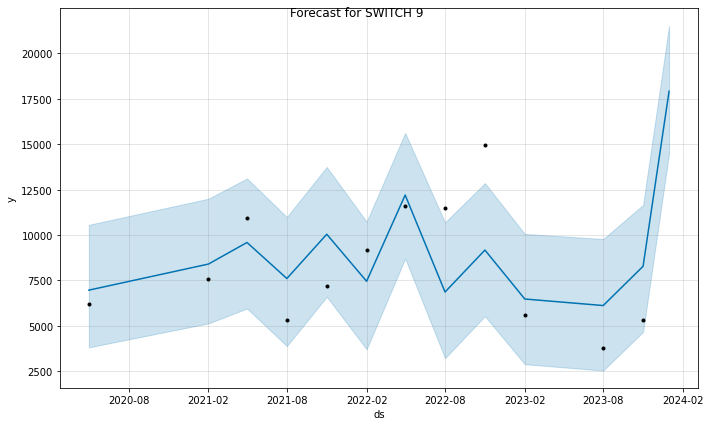

16:58:23 - cmdstanpy - INFO - Chain [1] start processing
16:58:23 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend    yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01 -2449.724340   3819.873816  10561.880520 -2449.724340   
1  2021-02-01 -2490.645024   5139.141725  11998.396563 -2490.645024   
2  2021-05-01 -2503.840462   5958.655096  13112.818824 -2503.840462   
3  2021-08-01 -2517.480690   3892.255456  10991.480016 -2517.480690   
4  2021-11-01 -2531.120918   6603.827775  13745.454927 -2531.120918   
5  2022-02-01 -2544.761146   3715.813177  10733.583526 -2544.761146   
6  2022-05-01 -2557.956584   8709.871975  15612.355768 -2557.956584   
7  2022-08-01 -2571.596812   3223.202320  10694.947070 -2571.596812   
8  2022-11-01 -2585.237040   5537.677450  12856.739934 -2585.237040   
9  2023-02-01 -2598.877269   2894.678506  10063.449826 -2598.877269   
10 2023-08-01 -2625.712935   2545.253585   9781.103344 -2625.712935   
11 2023-11-01 -2639.353164   4675.452590  11659.515997 -2639.353164   
12 2023-12-31 -2648.248965  14497.178992  21517.958514 -2648.248974

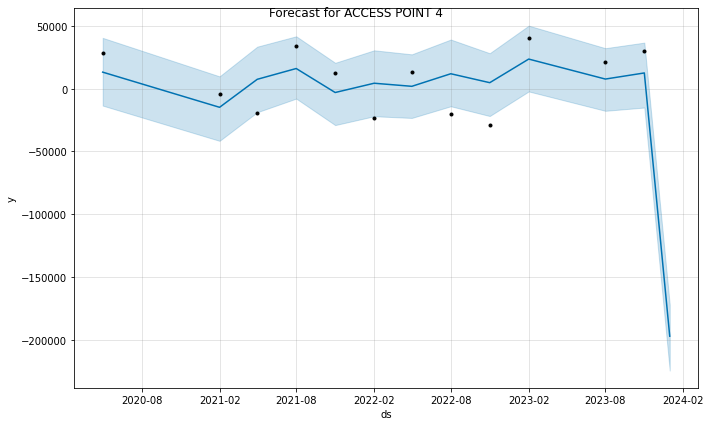

16:58:24 - cmdstanpy - INFO - Chain [1] start processing
16:58:24 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01   3892.206460  -13393.432547   40638.900247   3892.206460   
1  2021-02-01   6903.926188  -41510.998554    9918.024722   6903.926188   
2  2021-05-01   7875.096679  -18684.407932   33614.829150   7875.096679   
3  2021-08-01   8879.003255   -7813.301940   41873.579484   8879.003255   
4  2021-11-01   9882.909830  -28948.442406   20736.500600   9882.909830   
5  2022-02-01  10886.816406  -21879.279505   30703.323736  10886.816406   
6  2022-05-01  11857.986897  -23240.520665   27489.962283  11857.986897   
7  2022-08-01  12861.893473  -13926.667003   39293.612371  12861.893473   
8  2022-11-01  13865.800049  -21717.117916   28385.348031  13865.800049   
9  2023-02-01  14869.706625   -2107.873898   50373.453434  14869.706625   
10 2023-08-01  16844.783693  -17562.222632   32397.008385  16844.783693   
11 2023-11-01  17848.690269  -14949.542019   36835.378368  17848.690269   
12 2023-12-31  

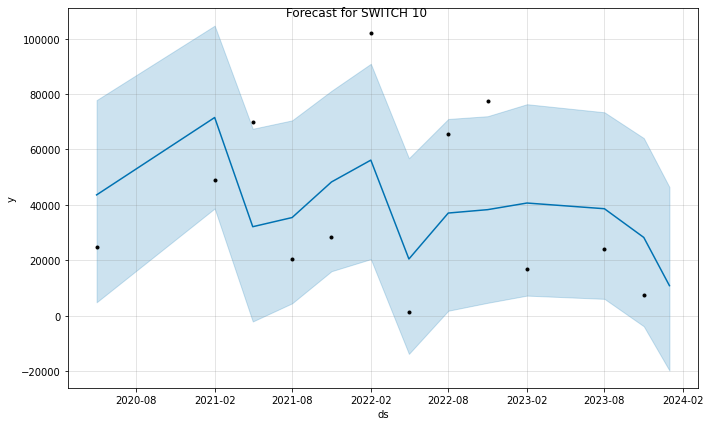

16:58:24 - cmdstanpy - INFO - Chain [1] start processing
16:58:24 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend    yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01 -11981.393199   4877.452132   77803.780681 -11981.393199   
1  2021-02-01 -18179.930017  38717.946878  104665.649062 -18179.930017   
2  2021-05-01 -20178.733555  -2044.193494   67464.578239 -20178.733555   
3  2021-08-01 -22244.912497   4510.317823   70497.015986 -22244.912497   
4  2021-11-01 -24311.091440  16085.325274   81156.744791 -24311.091440   
5  2022-02-01 -26377.270384  20453.018256   90907.955070 -26377.270384   
6  2022-05-01 -28376.073931 -13733.107782   56838.753534 -28376.073931   
7  2022-08-01 -30442.252882   1834.957643   71005.859109 -30442.252882   
8  2022-11-01 -32508.431833   4688.091669   72000.434155 -32508.431833   
9  2023-02-01 -34574.610786   7286.443807   76328.122076 -34574.610786   
10 2023-08-01 -38639.593293   6116.924704   73418.333912 -38639.593293   
11 2023-11-01 -40705.772247  -3773.346520   64111.154617 -40705.772247   
12 2023-12-31 -42053.280260 

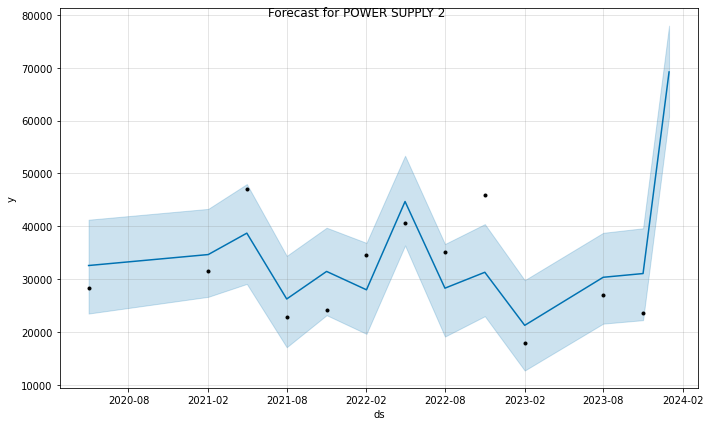

FORECAST:            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-05-01 -10432.002235  23447.208899  41218.786059 -10432.002235   
1  2021-02-01 -10271.278912  26614.694791  43268.056246 -10271.278912   
2  2021-05-01 -10219.451464  29057.051482  47964.022842 -10219.451464   
3  2021-08-01 -10165.877024  17067.481637  34366.985061 -10165.877024   
4  2021-11-01 -10112.302584  23138.068918  39703.046181 -10112.302584   
5  2022-02-01 -10058.728144  19600.454929  36828.588675 -10058.728144   
6  2022-05-01 -10006.900697  36337.996420  53333.701808 -10006.900697   
7  2022-08-01  -9953.326257  19088.575919  36614.481599  -9953.326257   
8  2022-11-01  -9899.751817  22947.522685  40384.583220  -9899.751817   
9  2023-02-01  -9846.177377  12654.304739  29769.852591  -9846.177377   
10 2023-08-01  -9740.775489  21536.245487  38736.836632  -9740.775489   
11 2023-11-01  -9687.201049  22198.368533  39594.762819  -9687.201049   
12 2023-12-31  -9652.261197  60783.366132

In [51]:
from prophet import Prophet

columns = transposed.columns[1:]

# Loop through each product column
for product in columns:
    print('product: ',product)
    # Prepare DataFrame for the current product
    product_df = scaled_iterative_df[['Date', product]].rename(columns={'Date': 'ds', product: 'y'})

    # Instantiate Prophet model
    model = Prophet()

    # Add relevant lag and rolling window features as regressors to the Prophet model for the current product
    for feature in columns:
        if product in feature:
            if product != feature:
                if product == 'SWITCH 1' and feature == 'SWITCH 10':
                    continue
                else:
                    print(feature)
                    product_df[feature] = scaled_iterative_df[feature]
                    model.add_regressor(feature)

    # Fit Prophet model
    model.fit(product_df)

    # Make future predictions
    future = model.make_future_dataframe(periods=1,  freq='Q')  # Adjust periods as needed
    forecast = model.predict(future)

    # Visualize forecast
    fig = model.plot(forecast)
    fig.suptitle(f'Forecast for {product}')
    plt.show()
    print('FORECAST:', forecast )



16:58:24 - cmdstanpy - INFO - Chain [1] start processing


product:  ROUTER 1


16:58:25 - cmdstanpy - INFO - Chain [1] done processing


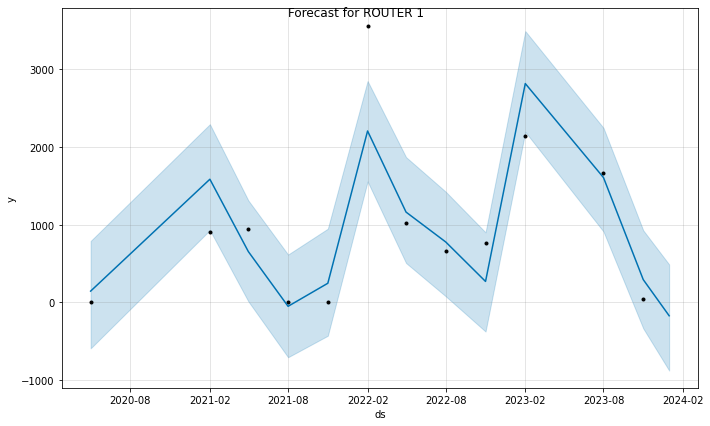

16:58:25 - cmdstanpy - INFO - Chain [1] start processing
16:58:25 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds       trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0  2020-05-01 -764.172010  -593.263759   790.210300  -764.172010  -764.172010   
1  2021-02-01 -424.193430   930.035009  2295.186901  -424.193430  -424.193430   
2  2021-05-01 -314.562656    12.532954  1312.928479  -314.562656  -314.562656   
3  2021-08-01 -201.236462  -707.736583   615.400738  -201.236462  -201.236462   
4  2021-11-01  -87.910269  -430.486741   948.662955   -87.910269   -87.910269   
5  2022-02-01   25.415925  1557.847678  2851.731734    25.415925    25.415925   
6  2022-05-01  135.046699   506.654834  1871.125102   135.046699   135.046699   
7  2022-08-01  248.372892    77.386472  1424.719635   248.372892   248.372892   
8  2022-11-01  361.699085  -376.229526   901.508298   361.699085   361.699085   
9  2023-02-01  475.025279  2196.448468  3494.799992   475.025279   475.025279   
10 2023-08-01  697.982246   911.868618  2247.911136   697.982246   697.982246   
11 2023-11-01  811

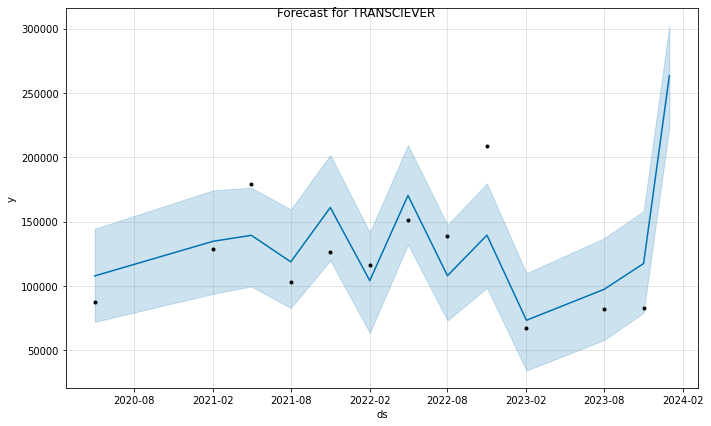

16:58:25 - cmdstanpy - INFO - Chain [1] start processing
16:58:25 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01 -44319.330480   71956.390281  144322.163271 -44319.330480   
1  2021-02-01 -50389.106969   93812.525243  174228.345840 -50389.106969   
2  2021-05-01 -52346.389964   99516.346595  176255.859651 -52346.389964   
3  2021-08-01 -54369.648791   82804.788952  159366.157227 -54369.648791   
4  2021-11-01 -56392.907618  119760.059261  201721.019452 -56392.907618   
5  2022-02-01 -58416.166445   63526.975087  141451.252865 -58416.166445   
6  2022-05-01 -60373.449441  132153.791476  209401.807498 -60373.449441   
7  2022-08-01 -62396.708265   73076.508509  147414.401608 -62396.708265   
8  2022-11-01 -64419.967094   98557.714827  179528.114770 -64419.967094   
9  2023-02-01 -66443.225919   34146.852454  109788.212127 -66443.225919   
10 2023-08-01 -70423.767739   57861.077274  136965.551829 -70423.767739   
11 2023-11-01 -72447.026565   79089.949324  158094.779822 -72447.026565   
12 2023-12-31 -

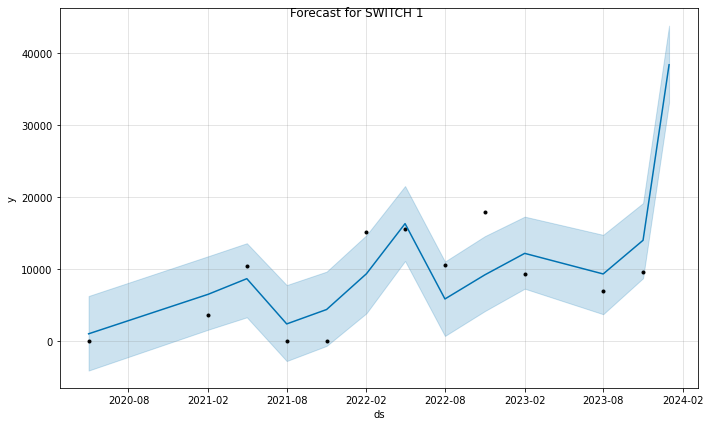

16:58:26 - cmdstanpy - INFO - Chain [1] start processing
16:58:26 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-05-01  -3353.102046  -4099.172813   6242.536946  -3353.102046   
1  2021-02-01    -95.029602   1572.859951  11764.751596    -95.029602   
2  2021-05-01    955.580715   3290.633541  13567.692632    955.580715   
3  2021-08-01   2041.604862  -2779.998067   7759.181806   2041.604862   
4  2021-11-01   3127.629011   -680.117911   9625.956486   3127.629011   
5  2022-02-01   4213.653159   3854.703625  14688.320106   4213.653159   
6  2022-05-01   5264.263477  11106.242100  21499.922876   5264.263477   
7  2022-08-01   6350.287626    699.313300  11025.034321   6350.287626   
8  2022-11-01   7436.311774   4149.958323  14546.396026   7436.311774   
9  2023-02-01   8522.335922   7259.220784  17257.036595   8522.335922   
10 2023-08-01  10658.970387   3716.975987  14729.464978  10658.970387   
11 2023-11-01  11744.994536   8713.081295  19140.290976  11744.994536   
12 2023-12-31  12453.271154  33113.558948

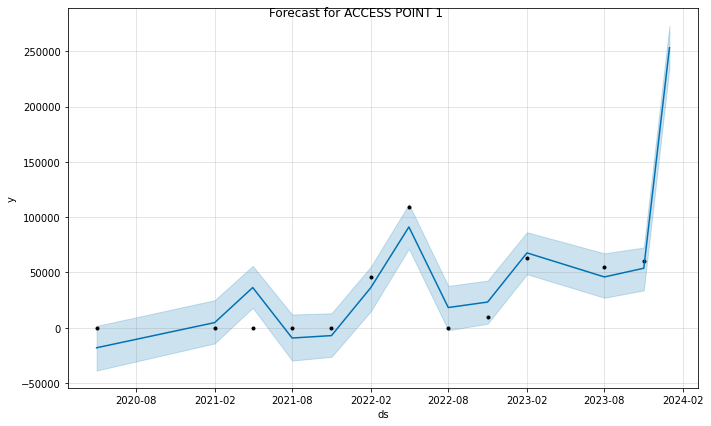

16:58:26 - cmdstanpy - INFO - Chain [1] start processing
16:58:26 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds          trend     yhat_lower     yhat_upper    trend_lower  \
0  2020-05-01   20775.631380  -38742.639730    1616.462431   20775.631380   
1  2021-02-01   46084.377368  -14207.527251   24877.940457   46084.377368   
2  2021-05-01   54245.530969   18016.940640   55888.347624   54245.530969   
3  2021-08-01   62681.779637  -29733.508973   11927.267931   62681.779637   
4  2021-11-01   71118.028307  -26351.538040   13036.777432   71118.028307   
5  2022-02-01   79554.276977   14896.963179   55230.588068   79554.276977   
6  2022-05-01   87715.430581   71452.424181  111619.349837   87715.430581   
7  2022-08-01   96151.679252   -2283.430730   37788.662254   96151.679252   
8  2022-11-01  104587.927923    3616.562579   42631.300113  104587.927923   
9  2023-02-01  113024.176593   48403.552652   86343.915168  113024.176593   
10 2023-08-01  129621.578870   27084.152548   67271.579286  129621.578870   
11 2023-11-01  138057.827540   33717.042331   72513.610424  138057

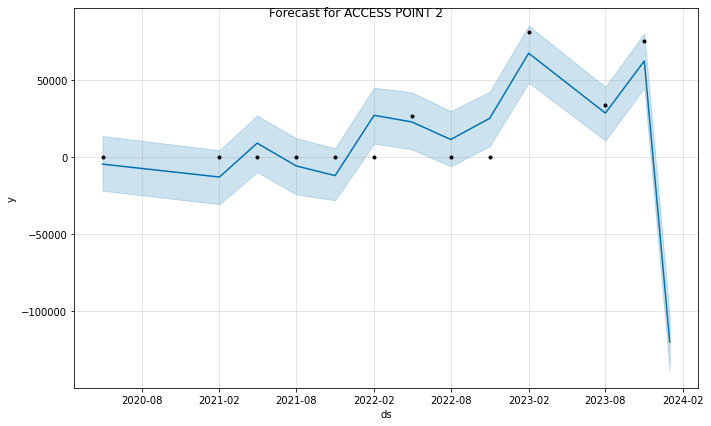

16:58:27 - cmdstanpy - INFO - Chain [1] start processing
16:58:27 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds          trend     yhat_lower     yhat_upper    trend_lower  \
0  2020-05-01   17559.667584  -21966.325991   13475.632819   17559.667584   
1  2021-02-01   36760.832403  -30685.214497    4269.863158   36760.832403   
2  2021-05-01   42952.512364   -9899.391023   26768.416796   42952.512364   
3  2021-08-01   49352.900637  -24335.664621   12087.198260   49352.900637   
4  2021-11-01   55753.288913  -28177.497328    5583.832601   55753.288913   
5  2022-02-01   62153.677193    8590.820469   44796.270111   62153.677193   
6  2022-05-01   68345.357161    4892.324582   41803.085853   68345.357161   
7  2022-08-01   74745.745440   -6194.839611   29636.203338   74745.745440   
8  2022-11-01   81146.133718    6930.544695   42148.627093   81146.133718   
9  2023-02-01   87546.522088   48057.204287   85016.595141   87546.522088   
10 2023-08-01  100138.590512   10542.183857   45311.957515  100138.590512   
11 2023-11-01  106538.978882   44686.463308   80072.847714  106538

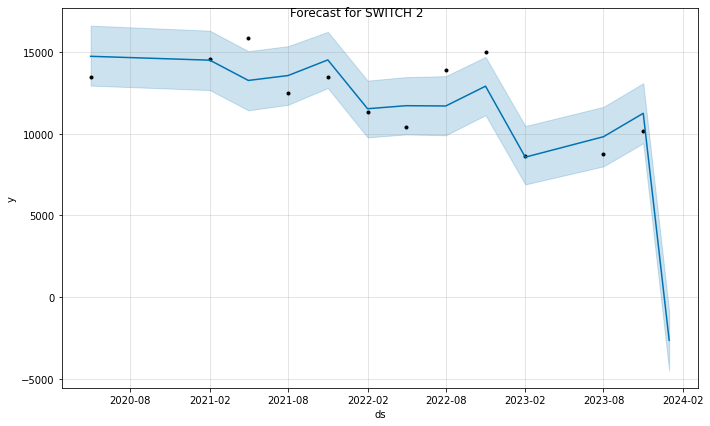

16:58:27 - cmdstanpy - INFO - Chain [1] start processing
16:58:27 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-05-01  -5199.612795  12935.419172  16599.528794  -5199.612795   
1  2021-02-01  -6621.101976  12660.515330  16291.562643  -6621.101976   
2  2021-05-01  -7079.480733  11423.258263  15039.526588  -7079.480733   
3  2021-08-01  -7553.310461  11763.113989  15346.728751  -7553.310461   
4  2021-11-01  -8027.140188  12785.525778  16220.417608  -8027.140188   
5  2022-02-01  -8500.969915   9770.452613  13238.593948  -8500.969915   
6  2022-05-01  -8959.348673   9952.871151  13454.915024  -8959.348673   
7  2022-08-01  -9433.178400   9901.052527  13512.402890  -9433.178400   
8  2022-11-01  -9907.008128  11128.968018  14688.695503  -9907.008128   
9  2023-02-01 -10380.837855   6894.811803  10463.670738 -10380.837855   
10 2023-08-01 -11313.046341   8000.529459  11637.535650 -11313.046341   
11 2023-11-01 -11786.876068   9414.446955  13079.795585 -11786.876068   
12 2023-12-31 -12095.895456  -4476.800985

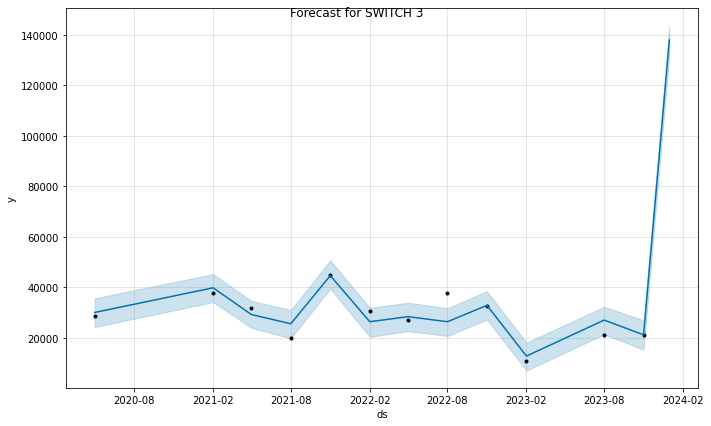

16:58:27 - cmdstanpy - INFO - Chain [1] start processing
16:58:27 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01 -10679.107272   24244.639900   35613.452888 -10679.107272   
1  2021-02-01 -15318.203936   34091.763401   45204.955169 -15318.203936   
2  2021-05-01 -16814.144527   23863.283330   34612.593572 -16814.144527   
3  2021-08-01 -18360.510081   19793.480892   30974.692135 -18360.510081   
4  2021-11-01 -19906.875636   39430.293729   50665.465447 -19906.875636   
5  2022-02-01 -21453.241190   20308.133316   31838.917677 -21453.241190   
6  2022-05-01 -22949.181780   22602.578090   33884.697002 -22949.181780   
7  2022-08-01 -24495.547334   20661.637265   31711.340086 -24495.547334   
8  2022-11-01 -26041.912888   27195.794355   38414.330159 -26041.912888   
9  2023-02-01 -27588.278443    6967.089994   18014.879412 -27588.278443   
10 2023-08-01 -30630.584588   21322.860969   32281.854253 -30630.584588   
11 2023-11-01 -32176.950142   15254.021126   26893.070099 -32176.950142   
12 2023-12-31 -

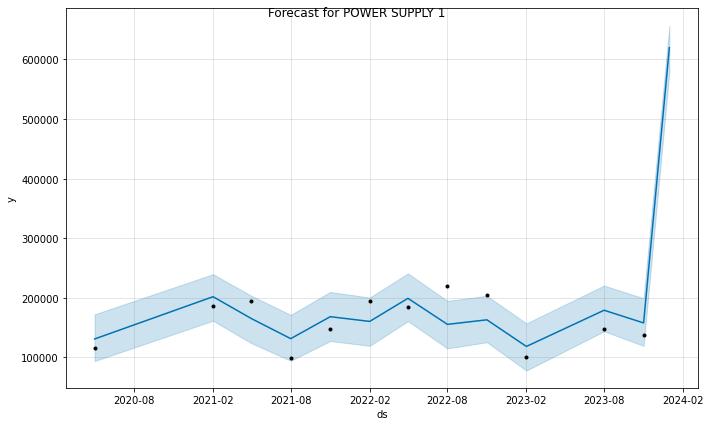

16:58:28 - cmdstanpy - INFO - Chain [1] start processing
16:58:28 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01 -51545.640768   93707.266376  172171.411009 -51545.640768   
1  2021-02-01 -50021.110912  161473.084866  239551.190116 -50021.110912   
2  2021-05-01 -49529.505259  123733.307231  203510.353695 -49529.505259   
3  2021-08-01 -49021.328637   94258.459202  171259.631751 -49021.328637   
4  2021-11-01 -48513.152017  127332.257859  209825.443869 -48513.152017   
5  2022-02-01 -48004.975394  119282.443335  200346.101017 -48004.975394   
6  2022-05-01 -47513.369741  160646.247834  240890.422057 -47513.369741   
7  2022-08-01 -47005.193109  114952.766865  194780.955965 -47005.193109   
8  2022-11-01 -46497.016489  125274.917705  203331.125391 -46497.016489   
9  2023-02-01 -45988.839871   77789.905473  157014.035085 -45988.839871   
10 2023-08-01 -44989.057612  143767.229466  220447.002741 -44989.057612   
11 2023-11-01 -44480.880994  119153.719800  199199.443122 -44480.880994   
12 2023-12-31 -

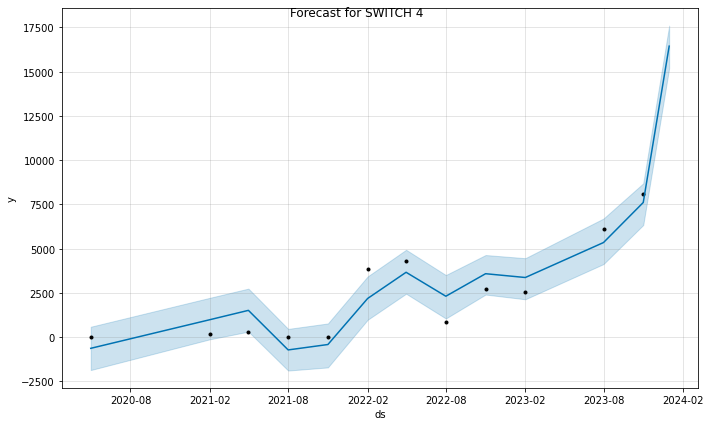

16:58:28 - cmdstanpy - INFO - Chain [1] start processing
16:58:28 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend    yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01   849.138719  -1859.573565    588.973457   849.138719   
1  2021-02-01  2704.649486   -119.387702   2224.930482  2704.649486   
2  2021-05-01  3302.984479    312.124047   2742.715768  3302.984479   
3  2021-08-01  3921.488068  -1887.717713    465.952758  3921.488068   
4  2021-11-01  4539.991657  -1710.320429    773.673965  4539.991657   
5  2022-02-01  5158.495246    981.417975   3431.212258  5158.495246   
6  2022-05-01  5756.830239   2455.815071   4936.961217  5756.830239   
7  2022-08-01  6375.333827   1054.236293   3509.973319  6375.333827   
8  2022-11-01  6993.837415   2407.056820   4641.286332  6993.837415   
9  2023-02-01  7612.341004   2140.163692   4462.403361  7612.341004   
10 2023-08-01  8829.179586   4130.768479   6703.692016  8829.179586   
11 2023-11-01  9447.683175   6338.532856   8693.697881  9447.683175   
12 2023-12-31  9851.055081  15204.697438  17604.770333  9851.055076

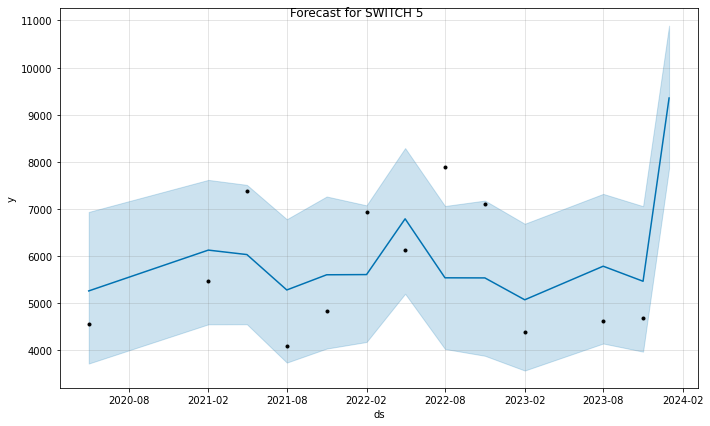

16:58:29 - cmdstanpy - INFO - Chain [1] start processing
16:58:29 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend   yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01 -1738.440362  3722.443165   6937.661958 -1738.440362   
1  2021-02-01 -1682.333190  4554.309924   7617.627491 -1682.333190   
2  2021-05-01 -1664.240660  4555.864448   7511.839098 -1664.240660   
3  2021-08-01 -1645.538269  3742.300035   6783.157834 -1645.538269   
4  2021-11-01 -1626.835878  4039.682581   7265.144125 -1626.835878   
5  2022-02-01 -1608.133487  4179.517858   7077.804622 -1608.133487   
6  2022-05-01 -1590.040957  5202.132962   8292.283046 -1590.040957   
7  2022-08-01 -1571.338566  4031.249770   7063.805331 -1571.338566   
8  2022-11-01 -1552.636176  3887.353460   7179.070408 -1552.636176   
9  2023-02-01 -1533.933785  3573.661298   6687.060229 -1533.933785   
10 2023-08-01 -1497.138864  4147.254106   7320.869279 -1497.138864   
11 2023-11-01 -1478.436474  3974.770589   7060.006248 -1478.436474   
12 2023-12-31 -1466.239262  7865.546484  10889.264008 -1466.239267   

    trend

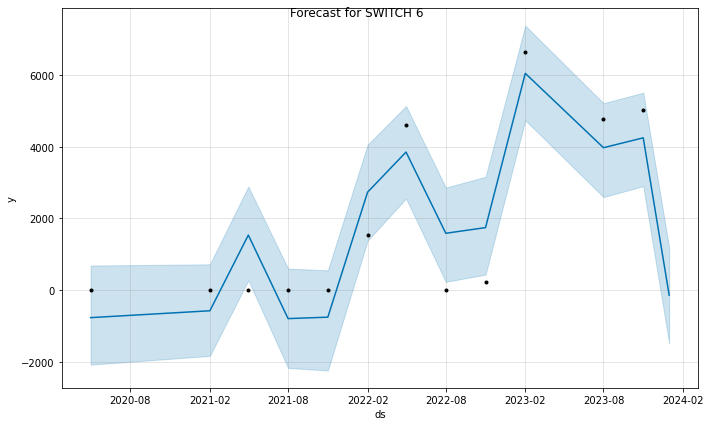

16:58:29 - cmdstanpy - INFO - Chain [1] start processing


FORECAST:            ds         trend   yhat_lower   yhat_upper   trend_lower  \
0  2020-05-01   1700.847616 -2082.785913   685.467171   1700.847616   
1  2021-02-01   3561.703474 -1837.397407   718.477905   3561.703474   
2  2021-05-01   4161.762065   274.410310  2889.211537   4161.762065   
3  2021-08-01   4782.047351 -2172.922268   599.574644   4782.047351   
4  2021-11-01   5402.332637 -2247.064099   551.410361   5402.332637   
5  2022-02-01   6022.617923  1379.625683  4056.134822   6022.617923   
6  2022-05-01   6622.676515  2557.472601  5139.175112   6622.676515   
7  2022-08-01   7242.961801   229.412731  2861.154704   7242.961801   
8  2022-11-01   7863.247086   431.496988  3162.230925   7863.247086   
9  2023-02-01   8483.532372  4741.383328  7382.257597   8483.532372   
10 2023-08-01   9703.876249  2596.076323  5218.231368   9703.876249   
11 2023-11-01  10324.161535  2901.215525  5510.327846  10324.161535   
12 2023-12-31  10728.695417 -1489.198632  1185.425510  10728.695413

16:58:29 - cmdstanpy - INFO - Chain [1] done processing


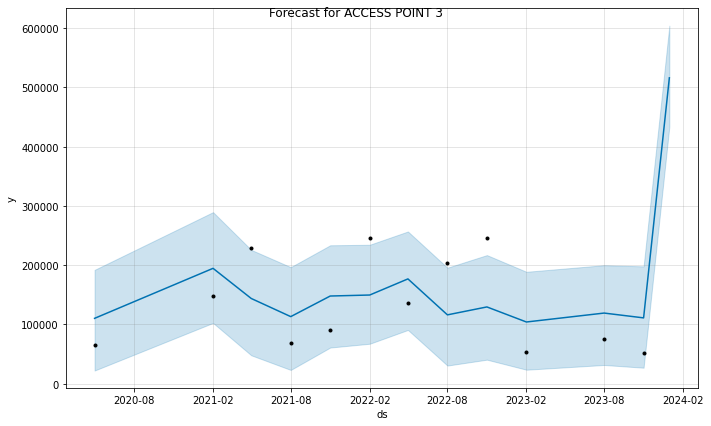

16:58:29 - cmdstanpy - INFO - Chain [1] start processing
16:58:29 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01 -25770.232323   22052.753963  192028.885914 -25770.232323   
1  2021-02-01 -30893.702086  102474.557335  289544.732888 -30893.702086   
2  2021-05-01 -32545.835446   47814.527078  225806.571517 -32545.835446   
3  2021-08-01 -34253.658699   23078.469834  196662.099052 -34253.658699   
4  2021-11-01 -35961.481946   60898.458262  233610.337233 -35961.481946   
5  2022-02-01 -37669.305198   67308.752422  234458.738127 -37669.305198   
6  2022-05-01 -39321.438569   90603.062702  256874.884871 -39321.438569   
7  2022-08-01 -41029.261822   30468.454107  195709.187552 -41029.261822   
8  2022-11-01 -42737.085083   40421.358194  216999.324629 -42737.085083   
9  2023-02-01 -44444.908346   23470.446876  188816.368221 -44444.908346   
10 2023-08-01 -47804.864982   31464.109610  199945.505036 -47804.864982   
11 2023-11-01 -49512.688244   26867.992688  198005.212573 -49512.688244   
12 2023-12-31 -

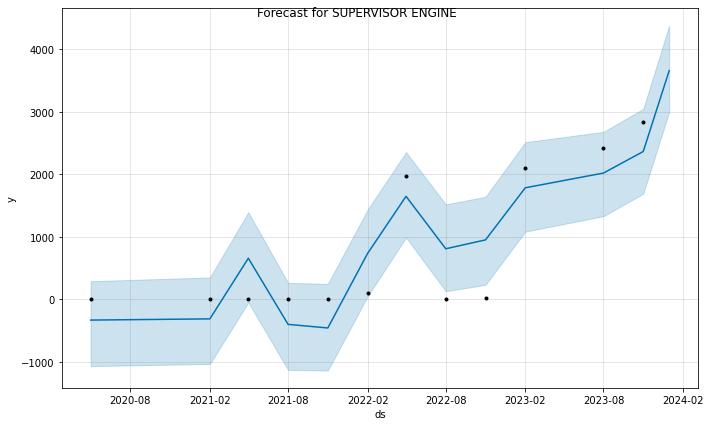

16:58:30 - cmdstanpy - INFO - Chain [1] start processing
16:58:30 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2020-05-01   544.457763 -1068.795506   289.701587   544.457763   
1  2021-02-01  1373.732469 -1033.913918   349.884540  1373.732469   
2  2021-05-01  1641.143515   -49.404636  1392.140622  1641.143515   
3  2021-08-01  1917.568417 -1129.256125   263.587981  1917.568417   
4  2021-11-01  2193.993319 -1139.414563   247.082658  2193.993319   
5  2022-02-01  2470.418221    46.950029  1432.051572  2470.418221   
6  2022-05-01  2737.829267   989.047621  2354.213314  2737.829267   
7  2022-08-01  3014.254169   129.597024  1518.174482  3014.254169   
8  2022-11-01  3290.679071   231.240281  1639.933852  3290.679071   
9  2023-02-01  3567.103973  1082.130347  2512.924086  3567.103973   
10 2023-08-01  4110.939921  1329.270049  2678.264084  4110.939921   
11 2023-11-01  4387.364823  1688.424860  3045.280942  4387.364823   
12 2023-12-31  4567.641933  2998.200279  4376.653432  4567.641932   

    trend_upper  additi

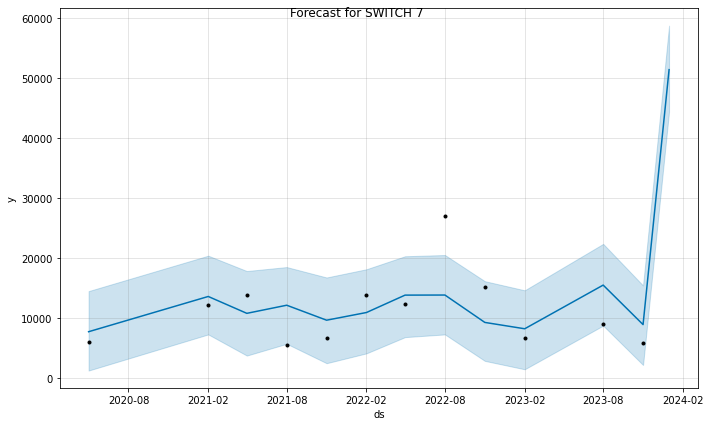

16:58:30 - cmdstanpy - INFO - Chain [1] start processing
16:58:30 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend    yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01 -4175.207100   1247.888424  14480.498987 -4175.207100   
1  2021-02-01 -3930.368871   7267.343262  20380.208402 -3930.368871   
2  2021-05-01 -3851.417414   3741.807987  17824.332831 -3851.417414   
3  2021-08-01 -3769.804671   5706.097259  18486.279049 -3769.804671   
4  2021-11-01 -3688.191929   2472.188457  16752.472927 -3688.191929   
5  2022-02-01 -3606.579186   4113.767993  18124.945700 -3606.579186   
6  2022-05-01 -3527.627729   6814.690534  20289.043020 -3527.627729   
7  2022-08-01 -3446.014986   7266.854726  20493.132508 -3446.014986   
8  2022-11-01 -3364.402244   2858.602802  16134.983733 -3364.402244   
9  2023-02-01 -3282.789503   1458.810029  14613.660918 -3282.789503   
10 2023-08-01 -3122.225305   8733.189769  22349.768151 -3122.225305   
11 2023-11-01 -3040.612563   2176.510343  15422.836457 -3040.612563   
12 2023-12-31 -2987.386862  44386.188201  58699.677645 -2987.386876

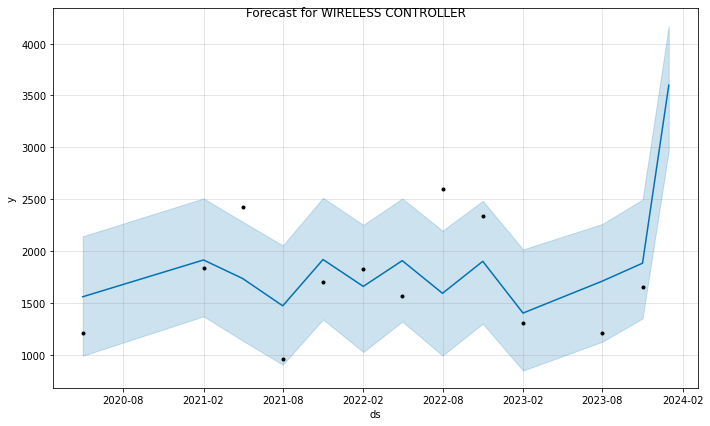

16:58:31 - cmdstanpy - INFO - Chain [1] start processing


FORECAST:            ds       trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0  2020-05-01 -418.097166   991.978588  2142.989965  -418.097166  -418.097166   
1  2021-02-01 -417.440543  1371.489228  2507.923409  -417.440543  -417.440543   
2  2021-05-01 -417.228805  1138.572998  2283.971364  -417.228805  -417.228805   
3  2021-08-01 -417.009931   905.852495  2054.543385  -417.009931  -417.009931   
4  2021-11-01 -416.791056  1342.052757  2513.642759  -416.791056  -416.791056   
5  2022-02-01 -416.572182  1027.343162  2252.699214  -416.572182  -416.572182   
6  2022-05-01 -416.360445  1321.718150  2507.018023  -416.360445  -416.360445   
7  2022-08-01 -416.141570   993.968769  2196.843680  -416.141570  -416.141570   
8  2022-11-01 -415.922696  1301.154117  2484.361360  -415.922696  -415.922696   
9  2023-02-01 -415.703821   848.923864  2016.583629  -415.703821  -415.703821   
10 2023-08-01 -415.273210  1126.796188  2261.520753  -415.273210  -415.273210   
11 2023-11-01 -415

16:58:31 - cmdstanpy - INFO - Chain [1] done processing


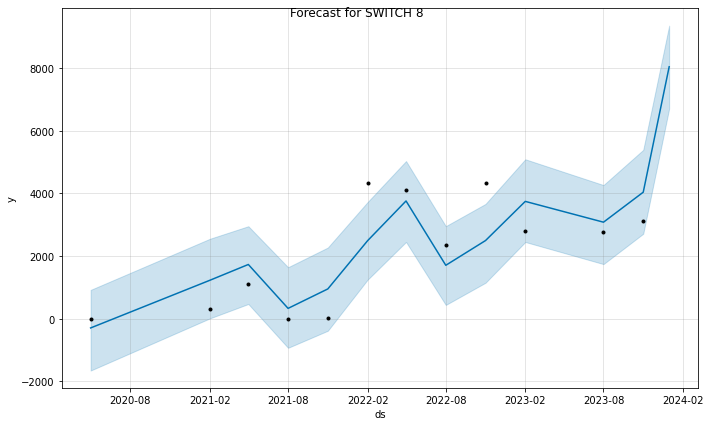

16:58:31 - cmdstanpy - INFO - Chain [1] start processing
16:58:31 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2020-05-01  -656.883093 -1654.519041   918.731668  -656.883093   
1  2021-02-01   425.769964    10.355826  2549.147014   425.769964   
2  2021-05-01   774.886350   469.173475  2950.581736   774.886350   
3  2021-08-01  1135.770703  -929.290344  1642.024931  1135.770703   
4  2021-11-01  1496.655057  -384.278564  2270.490414  1496.655057   
5  2022-02-01  1857.539411  1243.862010  3720.160782  1857.539411   
6  2022-05-01  2206.655798  2448.897817  5029.312513  2206.655798   
7  2022-08-01  2567.540152   438.845366  2952.304081  2567.540152   
8  2022-11-01  2928.424506  1147.515305  3662.096821  2928.424506   
9  2023-02-01  3289.308862  2447.461411  5086.372375  3289.308862   
10 2023-08-01  3999.309606  1742.027366  4263.664756  3999.309606   
11 2023-11-01  4360.193962  2710.394681  5387.266773  4360.193962   
12 2023-12-31  4595.553325  6703.578721  9349.504571  4595.553321   

    trend_upper  additi

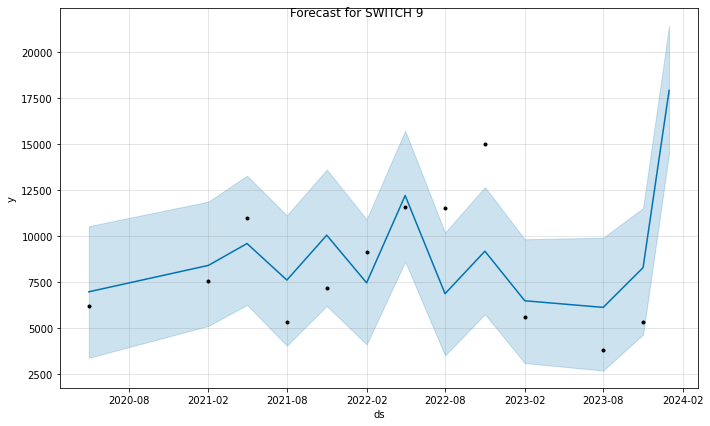

16:58:31 - cmdstanpy - INFO - Chain [1] start processing
16:58:32 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend    yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01 -2449.724340   3383.285312  10535.459492 -2449.724340   
1  2021-02-01 -2490.645024   5112.657663  11871.083027 -2490.645024   
2  2021-05-01 -2503.840462   6257.797504  13278.447587 -2503.840462   
3  2021-08-01 -2517.480690   4044.424173  11120.320626 -2517.480690   
4  2021-11-01 -2531.120918   6202.487771  13611.189702 -2531.120918   
5  2022-02-01 -2544.761146   4107.085668  10904.228272 -2544.761146   
6  2022-05-01 -2557.956584   8612.208341  15720.184141 -2557.956584   
7  2022-08-01 -2571.596812   3508.132896  10185.701977 -2571.596812   
8  2022-11-01 -2585.237040   5749.321676  12656.780332 -2585.237040   
9  2023-02-01 -2598.877269   3093.141601   9824.260678 -2598.877269   
10 2023-08-01 -2625.712935   2687.915679   9908.706054 -2625.712935   
11 2023-11-01 -2639.353164   4648.521780  11517.175608 -2639.353164   
12 2023-12-31 -2648.248965  14497.490529  21433.606813 -2648.248973

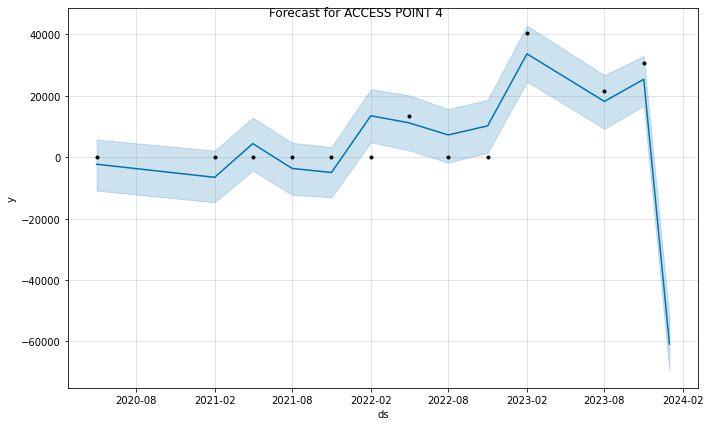

16:58:32 - cmdstanpy - INFO - Chain [1] start processing


FORECAST:            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-05-01   8917.661810 -10899.910921   5738.668809   8917.661810   
1  2021-02-01  18333.863910 -14694.231525   2118.703527  18333.863910   
2  2021-05-01  21370.247930  -4410.268082  12860.168728  21370.247930   
3  2021-08-01  24508.981972 -12305.440538   4653.700880  24508.981972   
4  2021-11-01  27647.716022 -13058.113346   3260.343878  27647.716022   
5  2022-02-01  30786.450080   4815.648983  22120.692112  30786.450080   
6  2022-05-01  33822.834125   2220.867801  20140.494576  33822.834125   
7  2022-08-01  36961.568191  -1803.004844  15669.425456  36961.568191   
8  2022-11-01  40100.302252   1387.158416  18625.263951  40100.302252   
9  2023-02-01  43239.036321  24570.623835  42805.734802  43239.036321   
10 2023-08-01  49414.154434   9238.109189  26681.932633  49414.154434   
11 2023-11-01  52552.888503  16737.908579  32910.846006  52552.888503   
12 2023-12-31  54599.888983 -69478.468609

16:58:32 - cmdstanpy - INFO - Chain [1] done processing


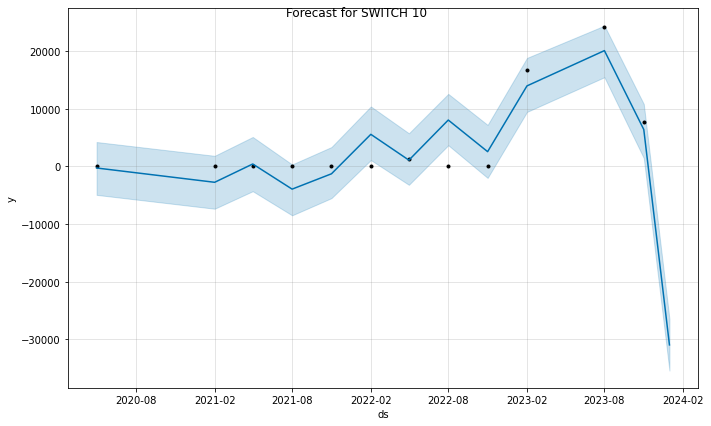

16:58:32 - cmdstanpy - INFO - Chain [1] start processing
16:58:32 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-05-01   5674.374204  -4940.213779   4227.527462   5674.374204   
1  2021-02-01  10191.645578  -7342.718274   1833.950981  10191.645578   
2  2021-05-01  11648.301926  -4301.699039   5103.268823  11648.301926   
3  2021-08-01  13154.059049  -8489.097957    331.962475  13154.059049   
4  2021-11-01  14659.816171  -5504.622770   3356.531364  14659.816171   
5  2022-02-01  16165.573293   1098.774037  10395.045896  16165.573293   
6  2022-05-01  17622.229640  -3199.645567   5744.873043  17622.229640   
7  2022-08-01  19127.986761   3670.929716  12579.135413  19127.986761   
8  2022-11-01  20633.743884  -2002.790107   7194.788323  20633.743884   
9  2023-02-01  22139.501007   9448.797411  18812.475734  22139.501007   
10 2023-08-01  25101.914478  15469.852174  24412.006852  25101.914478   
11 2023-11-01  26607.671601   1445.709592  10821.751985  26607.671601   
12 2023-12-31  27589.687116 -35410.752262

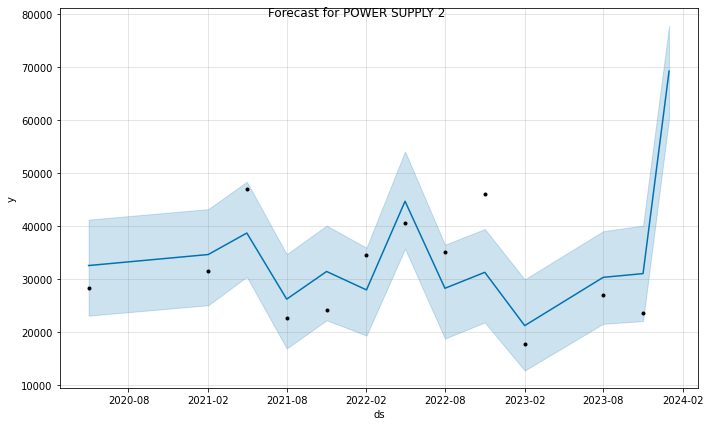

FORECAST:            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-05-01 -10432.002235  23095.685569  41199.612255 -10432.002235   
1  2021-02-01 -10271.278912  25059.880293  43182.762719 -10271.278912   
2  2021-05-01 -10219.451464  30420.673606  48339.423693 -10219.451464   
3  2021-08-01 -10165.877024  16913.093178  34681.322009 -10165.877024   
4  2021-11-01 -10112.302584  22214.589369  40073.654110 -10112.302584   
5  2022-02-01 -10058.728144  19353.245767  35887.180135 -10058.728144   
6  2022-05-01 -10006.900697  35719.454950  54051.623986 -10006.900697   
7  2022-08-01  -9953.326257  18775.033837  36464.672217  -9953.326257   
8  2022-11-01  -9899.751817  21816.225125  39422.930375  -9899.751817   
9  2023-02-01  -9846.177377  12744.281811  29924.925935  -9846.177377   
10 2023-08-01  -9740.775489  21563.280532  39017.794641  -9740.775489   
11 2023-11-01  -9687.201049  22067.202228  40079.047846  -9687.201049   
12 2023-12-31  -9652.261197  60372.707425

In [52]:
from prophet import Prophet

columns = transposed.columns[1:]

# Loop through each product column
for product in columns:
    print('product: ',product)
    # Prepare DataFrame for the current product
    product_df = scaled_0_df[['Date', product]].rename(columns={'Date': 'ds', product: 'y'})

    # Instantiate Prophet model
    model = Prophet()

    # Add relevant lag and rolling window features as regressors to the Prophet model for the current product
    for feature in columns:
        if product in feature:
            if product != feature:
                if product == 'SWITCH 1' and feature == 'SWITCH 10':
                    continue
                else:
                    print(feature)
                    product_df[feature] = scaled_0_df[feature]
                    model.add_regressor(feature)

    # Fit Prophet model
    model.fit(product_df)

    # Make future predictions
    future = model.make_future_dataframe(periods=1,  freq='Q')  # Adjust periods as needed
    forecast = model.predict(future)

    # Visualize forecast
    fig = model.plot(forecast)
    fig.suptitle(f'Forecast for {product}')
    plt.show()
    print('FORECAST:', forecast )

16:58:33 - cmdstanpy - INFO - Chain [1] start processing
16:58:33 - cmdstanpy - INFO - Chain [1] done processing


product:  ROUTER 1


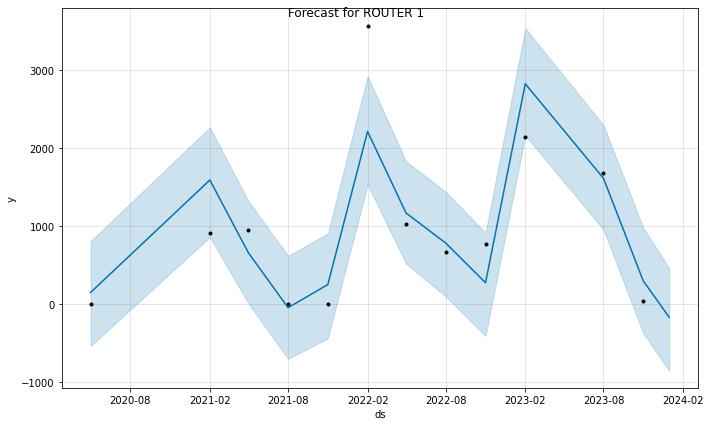

16:58:33 - cmdstanpy - INFO - Chain [1] start processing
16:58:33 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds       trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0  2020-05-01 -764.172010  -541.202413   802.296162  -764.172010  -764.172010   
1  2021-02-01 -424.193430   854.270669  2261.982593  -424.193430  -424.193430   
2  2021-05-01 -314.562656     5.457427  1317.582884  -314.562656  -314.562656   
3  2021-08-01 -201.236462  -707.169477   613.550917  -201.236462  -201.236462   
4  2021-11-01  -87.910269  -443.998983   901.688962   -87.910269   -87.910269   
5  2022-02-01   25.415925  1527.203253  2918.331597    25.415925    25.415925   
6  2022-05-01  135.046699   514.805806  1825.987537   135.046699   135.046699   
7  2022-08-01  248.372892    92.053962  1433.216539   248.372892   248.372892   
8  2022-11-01  361.699085  -413.681183   909.938393   361.699085   361.699085   
9  2023-02-01  475.025279  2158.433748  3533.280467   475.025279   475.025279   
10 2023-08-01  697.982246   949.528259  2288.777761   697.982246   697.982246   
11 2023-11-01  811

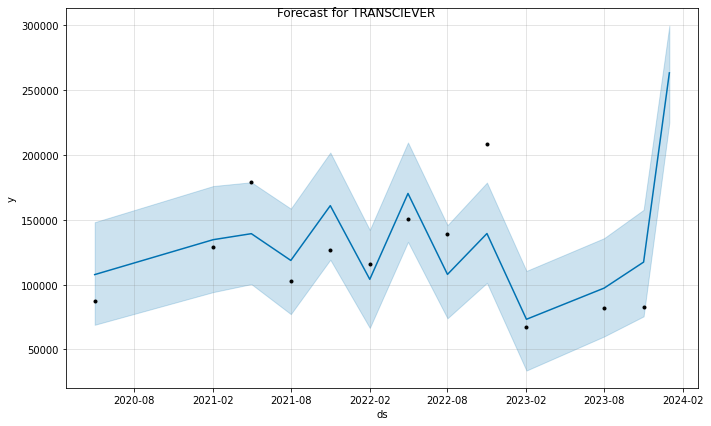

16:58:33 - cmdstanpy - INFO - Chain [1] start processing
16:58:34 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01 -44319.330480   68976.202124  148124.149663 -44319.330480   
1  2021-02-01 -50389.106969   94186.587098  176009.923543 -50389.106969   
2  2021-05-01 -52346.389972  100375.896179  178941.396827 -52346.389972   
3  2021-08-01 -54369.648810   77203.003413  158572.690820 -54369.648810   
4  2021-11-01 -56392.907644  119180.700024  201853.237015 -56392.907644   
5  2022-02-01 -58416.166475   66552.549421  142136.089331 -58416.166475   
6  2022-05-01 -60373.449471  132924.950287  209596.509655 -60373.449471   
7  2022-08-01 -62396.708303   73982.761438  145797.530947 -62396.708303   
8  2022-11-01 -64419.967135  101341.443991  178667.811804 -64419.967135   
9  2023-02-01 -66443.225971   33688.667364  110535.865479 -66443.225971   
10 2023-08-01 -70423.767813   59976.231417  135810.553012 -70423.767813   
11 2023-11-01 -72447.026650   75481.836839  157686.732552 -72447.026650   
12 2023-12-31 -

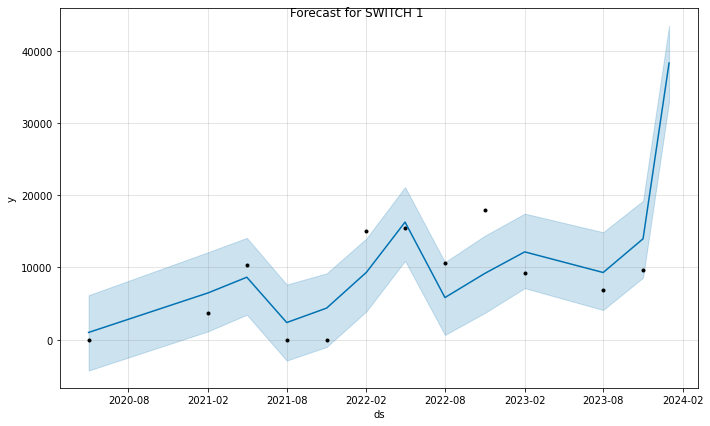

16:58:34 - cmdstanpy - INFO - Chain [1] start processing
16:58:34 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-05-01  -3353.102046  -4280.930526   6156.831750  -3353.102046   
1  2021-02-01    -95.029602   1159.598937  12126.133594    -95.029602   
2  2021-05-01    955.580715   3457.891837  14104.760376    955.580715   
3  2021-08-01   2041.604862  -2897.531224   7637.157231   2041.604862   
4  2021-11-01   3127.629011  -1008.993038   9179.384344   3127.629011   
5  2022-02-01   4213.653159   3930.921766  14036.726727   4213.653159   
6  2022-05-01   5264.263477  10929.727651  21132.797717   5264.263477   
7  2022-08-01   6350.287626    653.993291  10737.302585   6350.287626   
8  2022-11-01   7436.311774   3698.914476  14399.100607   7436.311774   
9  2023-02-01   8522.335922   7137.486486  17463.560257   8522.335922   
10 2023-08-01  10658.970387   4108.044644  14882.585995  10658.970387   
11 2023-11-01  11744.994536   8589.638857  19248.085033  11744.994536   
12 2023-12-31  12453.271154  33001.272792

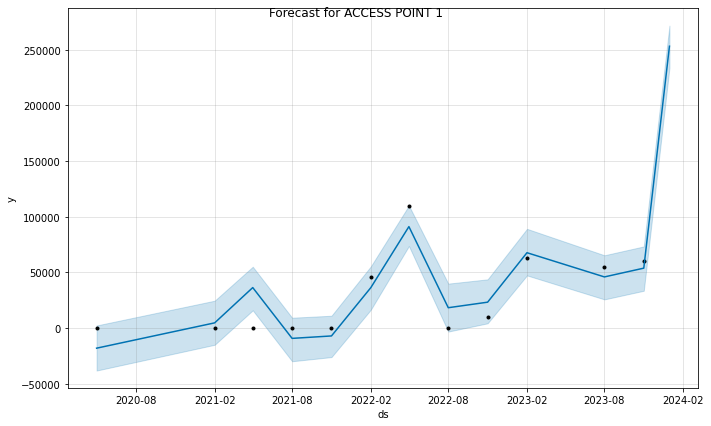

FORECAST:            ds          trend     yhat_lower     yhat_upper    trend_lower  \
0  2020-05-01   20775.631380  -38234.903108    2281.191980   20775.631380   
1  2021-02-01   46084.377368  -15075.169394   24539.550560   46084.377368   
2  2021-05-01   54245.530969   15890.799419   55058.512942   54245.530969   
3  2021-08-01   62681.779637  -29880.702290    9251.676088   62681.779637   
4  2021-11-01   71118.028307  -26128.528251   11024.293137   71118.028307   
5  2022-02-01   79554.276977   16430.410622   55372.519044   79554.276977   
6  2022-05-01   87715.430582   73667.864483  110041.250486   87715.430582   
7  2022-08-01   96151.679252   -3217.306382   39886.198156   96151.679252   
8  2022-11-01  104587.927923    4221.927388   43728.982534  104587.927923   
9  2023-02-01  113024.176594   47257.318620   89101.845592  113024.176594   
10 2023-08-01  129621.578870   25708.396455   65359.426149  129621.578870   
11 2023-11-01  138057.827541   33461.924336   73304.694291  138057

16:58:34 - cmdstanpy - INFO - Chain [1] start processing
16:58:34 - cmdstanpy - INFO - Chain [1] done processing


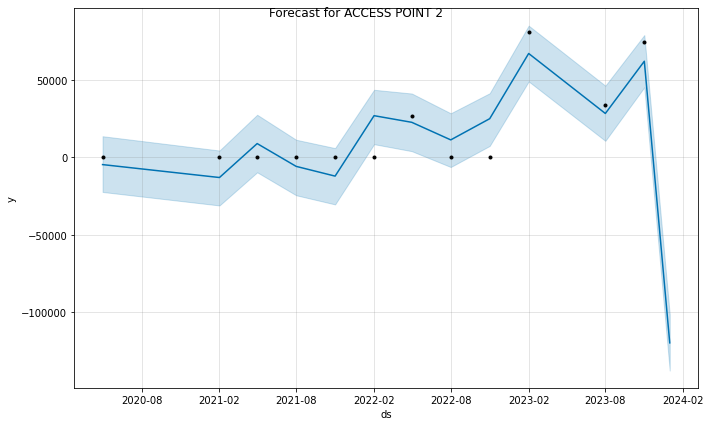

16:58:35 - cmdstanpy - INFO - Chain [1] start processing
16:58:35 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds          trend     yhat_lower     yhat_upper    trend_lower  \
0  2020-05-01   17559.667584  -22425.708555   13630.486721   17559.667584   
1  2021-02-01   36760.832403  -31154.609141    4381.420478   36760.832403   
2  2021-05-01   42952.512364   -9710.612939   27515.229994   42952.512364   
3  2021-08-01   49352.900637  -24553.336929   11343.896812   49352.900637   
4  2021-11-01   55753.288913  -30483.530621    5939.815215   55753.288913   
5  2022-02-01   62153.677193    8487.074856   43666.554430   62153.677193   
6  2022-05-01   68345.357161    3963.686039   41254.028304   68345.357161   
7  2022-08-01   74745.745440   -6292.974732   28464.864870   74745.745440   
8  2022-11-01   81146.133718    7348.499948   41446.182771   81146.133718   
9  2023-02-01   87546.522088   49061.210318   85151.313884   87546.522088   
10 2023-08-01  100138.590512   10632.331202   46308.709023  100138.590512   
11 2023-11-01  106538.978882   45289.752656   79070.023299  106538

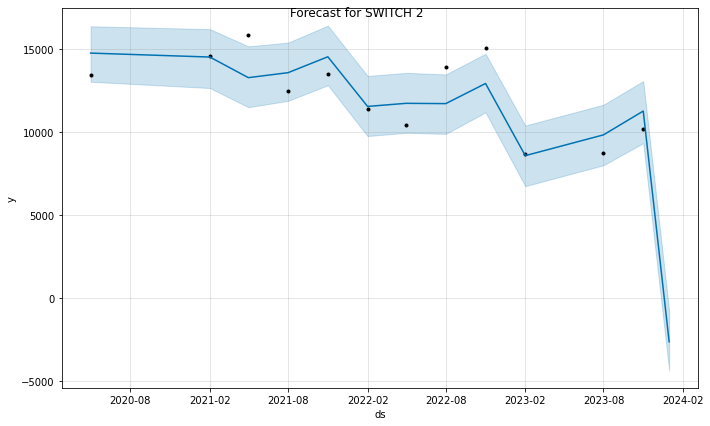

16:58:35 - cmdstanpy - INFO - Chain [1] start processing
16:58:35 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-05-01  -5199.612795  13003.929660  16339.228006  -5199.612795   
1  2021-02-01  -6621.101976  12628.857293  16167.163331  -6621.101976   
2  2021-05-01  -7079.480733  11474.253812  15133.087172  -7079.480733   
3  2021-08-01  -7553.310461  11856.649043  15356.244819  -7553.310461   
4  2021-11-01  -8027.140188  12798.444789  16376.407312  -8027.140188   
5  2022-02-01  -8500.969915   9740.989013  13352.581387  -8500.969915   
6  2022-05-01  -8959.348673   9935.889445  13539.190047  -8959.348673   
7  2022-08-01  -9433.178400   9870.562068  13444.054965  -9433.178400   
8  2022-11-01  -9907.008128  11162.937703  14687.886517  -9907.008128   
9  2023-02-01 -10380.837855   6729.418907  10374.073674 -10380.837855   
10 2023-08-01 -11313.046341   7989.419793  11625.146794 -11313.046341   
11 2023-11-01 -11786.876068   9313.199984  13044.087268 -11786.876068   
12 2023-12-31 -12095.895456  -4351.975526

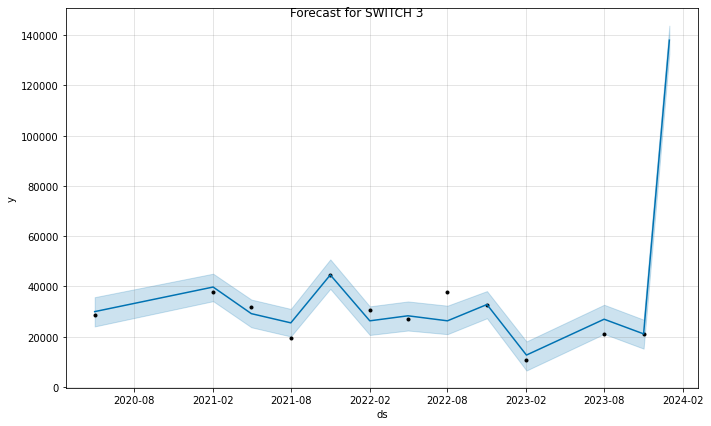

16:58:35 - cmdstanpy - INFO - Chain [1] start processing
16:58:36 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01 -10679.107272   24094.277451   35740.174085 -10679.107272   
1  2021-02-01 -15318.203936   34149.276119   45086.401214 -15318.203936   
2  2021-05-01 -16814.144527   23759.327761   34790.622687 -16814.144527   
3  2021-08-01 -18360.510081   20102.092396   31066.524442 -18360.510081   
4  2021-11-01 -19906.875636   39059.177493   50776.049803 -19906.875636   
5  2022-02-01 -21453.241190   20698.149499   32092.602505 -21453.241190   
6  2022-05-01 -22949.181780   22470.446593   34043.057789 -22949.181780   
7  2022-08-01 -24495.547334   21015.298999   32354.284559 -24495.547334   
8  2022-11-01 -26041.912888   27350.819052   38161.184032 -26041.912888   
9  2023-02-01 -27588.278443    6545.902402   18135.099830 -27588.278443   
10 2023-08-01 -30630.584588   21106.647470   32725.736682 -30630.584588   
11 2023-11-01 -32176.950142   15257.693965   26797.328621 -32176.950142   
12 2023-12-31 -

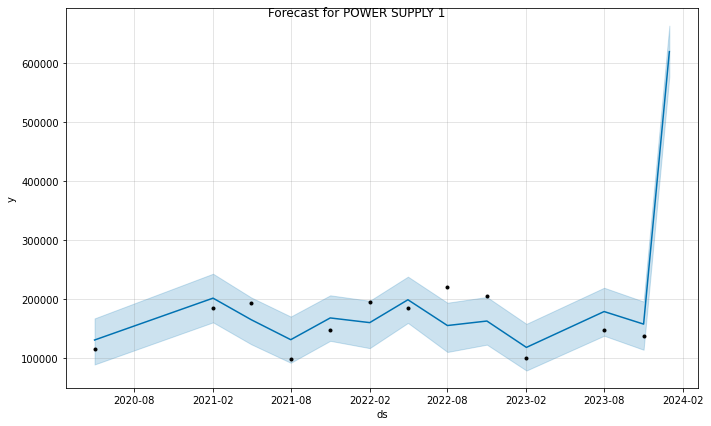

16:58:36 - cmdstanpy - INFO - Chain [1] start processing
16:58:36 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01 -51545.640768   89271.649293  167412.208192 -51545.640768   
1  2021-02-01 -50021.110912  160730.230669  243197.816460 -50021.110912   
2  2021-05-01 -49529.505259  123515.592061  202883.626944 -49529.505259   
3  2021-08-01 -49021.328637   92159.892410  170536.526265 -49021.328637   
4  2021-11-01 -48513.152018  129375.887442  206575.082335 -48513.152018   
5  2022-02-01 -48004.975394  116986.804094  197262.294908 -48004.975394   
6  2022-05-01 -47513.369741  159745.400457  238242.705952 -47513.369741   
7  2022-08-01 -47005.193110  110475.488714  194004.608564 -47005.193110   
8  2022-11-01 -46497.016490  122905.339914  203689.352292 -46497.016490   
9  2023-02-01 -45988.839872   78983.585304  158151.189181 -45988.839872   
10 2023-08-01 -44989.057613  138001.331467  219424.914121 -44989.057613   
11 2023-11-01 -44480.880995  114264.463609  196008.908541 -44480.880995   
12 2023-12-31 -

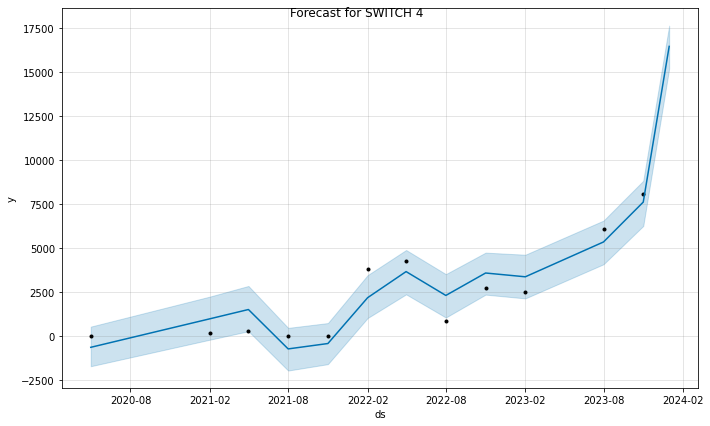

16:58:36 - cmdstanpy - INFO - Chain [1] start processing
16:58:36 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend    yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01   849.138719  -1704.378741    543.271626   849.138719   
1  2021-02-01  2704.649486   -197.353484   2248.271944  2704.649486   
2  2021-05-01  3302.984479    283.192633   2849.626344  3302.984479   
3  2021-08-01  3921.488068  -1949.929131    471.329767  3921.488068   
4  2021-11-01  4539.991657  -1586.298993    744.895589  4539.991657   
5  2022-02-01  5158.495246   1031.027023   3465.129566  5158.495246   
6  2022-05-01  5756.830239   2375.093663   4890.247209  5756.830239   
7  2022-08-01  6375.333827   1059.354253   3521.473893  6375.333827   
8  2022-11-01  6993.837415   2358.626705   4742.184433  6993.837415   
9  2023-02-01  7612.341004   2144.666031   4622.886653  7612.341004   
10 2023-08-01  8829.179586   4081.497560   6560.405477  8829.179586   
11 2023-11-01  9447.683175   6254.967543   8819.774558  9447.683175   
12 2023-12-31  9851.055081  15186.891026  17622.978777  9851.055076

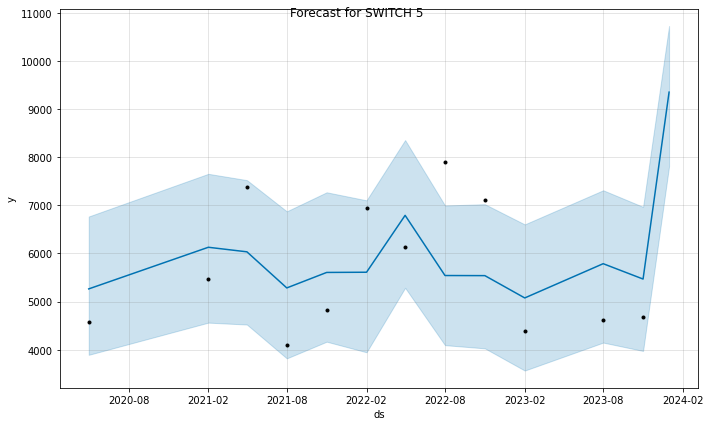

16:58:37 - cmdstanpy - INFO - Chain [1] start processing
16:58:37 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend   yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01 -1738.440362  3891.566277   6768.083433 -1738.440362   
1  2021-02-01 -1682.333190  4561.092135   7655.685060 -1682.333190   
2  2021-05-01 -1664.240660  4521.324513   7524.607182 -1664.240660   
3  2021-08-01 -1645.538269  3817.859005   6875.500965 -1645.538269   
4  2021-11-01 -1626.835878  4164.872825   7271.528999 -1626.835878   
5  2022-02-01 -1608.133487  3944.914229   7104.463216 -1608.133487   
6  2022-05-01 -1590.040957  5285.577948   8357.584181 -1590.040957   
7  2022-08-01 -1571.338566  4092.739700   6997.615320 -1571.338566   
8  2022-11-01 -1552.636176  4026.245499   7023.499558 -1552.636176   
9  2023-02-01 -1533.933785  3564.349571   6604.071545 -1533.933785   
10 2023-08-01 -1497.138864  4146.134746   7313.565442 -1497.138864   
11 2023-11-01 -1478.436474  3972.833263   6968.652708 -1478.436474   
12 2023-12-31 -1466.239262  7813.235358  10731.117879 -1466.239267   

    trend

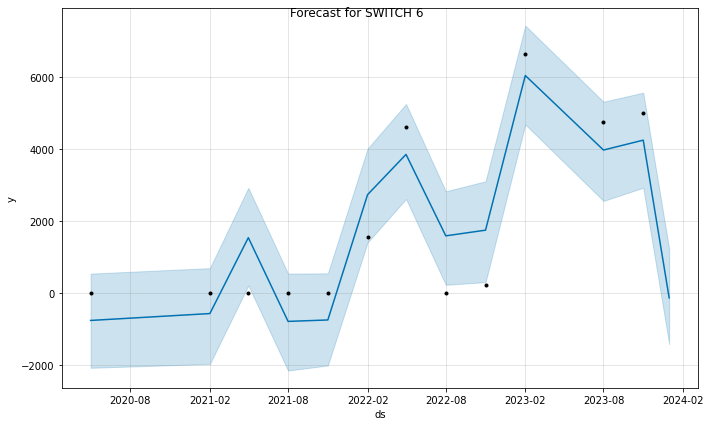

16:58:37 - cmdstanpy - INFO - Chain [1] start processing
16:58:37 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend   yhat_lower   yhat_upper   trend_lower  \
0  2020-05-01   1700.847616 -2088.267693   533.799561   1700.847616   
1  2021-02-01   3561.703474 -1981.672518   687.013249   3561.703474   
2  2021-05-01   4161.762065   204.892977  2922.712876   4161.762065   
3  2021-08-01   4782.047351 -2165.200918   535.008594   4782.047351   
4  2021-11-01   5402.332637 -2023.356347   541.372110   5402.332637   
5  2022-02-01   6022.617923  1401.162295  4015.068838   6022.617923   
6  2022-05-01   6622.676515  2612.688061  5257.091904   6622.676515   
7  2022-08-01   7242.961801   222.435990  2826.301460   7242.961801   
8  2022-11-01   7863.247086   296.918076  3104.922394   7863.247086   
9  2023-02-01   8483.532372  4686.347136  7438.442813   8483.532372   
10 2023-08-01   9703.876249  2557.601737  5320.135015   9703.876249   
11 2023-11-01  10324.161535  2925.839483  5572.899321  10324.161535   
12 2023-12-31  10728.695417 -1429.403930  1220.737682  10728.695413

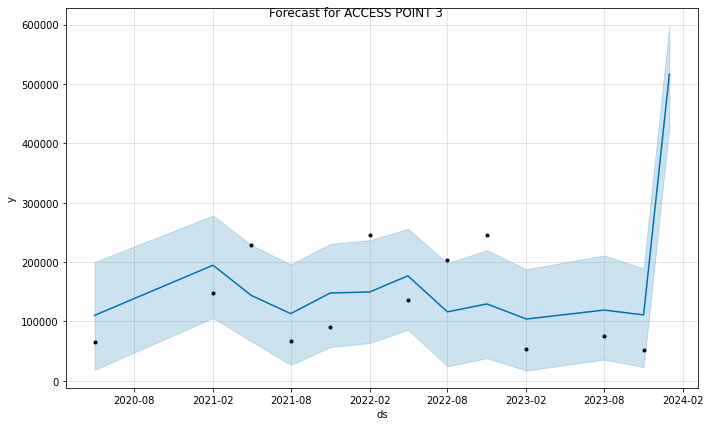

16:58:38 - cmdstanpy - INFO - Chain [1] start processing
16:58:38 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01 -25770.232323   18430.774947  200064.252678 -25770.232323   
1  2021-02-01 -30893.702086  105868.052413  278178.203827 -30893.702086   
2  2021-05-01 -32545.835446   66688.823782  228704.011598 -32545.835446   
3  2021-08-01 -34253.658699   26655.264080  195991.264061 -34253.658699   
4  2021-11-01 -35961.481946   56769.598208  230603.323287 -35961.481946   
5  2022-02-01 -37669.305198   63582.000545  236743.634990 -37669.305198   
6  2022-05-01 -39321.438569   85981.222913  255962.235679 -39321.438569   
7  2022-08-01 -41029.261822   24507.298224  198165.028804 -41029.261822   
8  2022-11-01 -42737.085083   38171.538558  219845.694184 -42737.085083   
9  2023-02-01 -44444.908346   17261.276153  187936.295078 -44444.908346   
10 2023-08-01 -47804.864982   35848.087379  211112.432960 -47804.864982   
11 2023-11-01 -49512.688244   23002.248258  189094.165359 -49512.688244   
12 2023-12-31 -

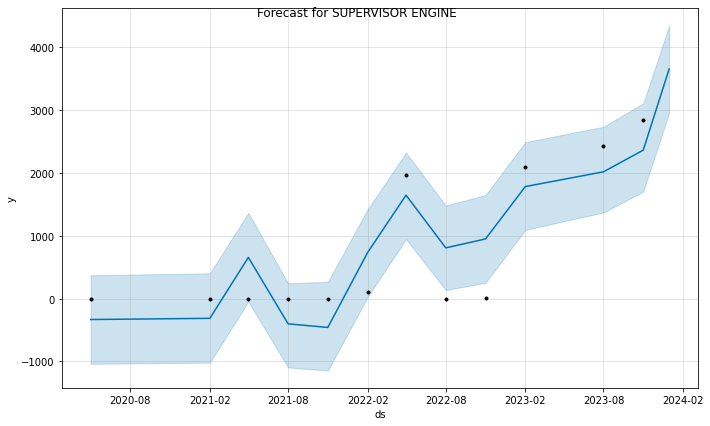

16:58:38 - cmdstanpy - INFO - Chain [1] start processing
16:58:38 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2020-05-01   544.457763 -1037.367783   372.718693   544.457763   
1  2021-02-01  1373.732469 -1017.926122   403.784433  1373.732469   
2  2021-05-01  1641.143515   -47.233483  1364.951021  1641.143515   
3  2021-08-01  1917.568417 -1094.844693   245.323814  1917.568417   
4  2021-11-01  2193.993319 -1144.405066   268.069939  2193.993319   
5  2022-02-01  2470.418221    25.649992  1418.959770  2470.418221   
6  2022-05-01  2737.829267   947.060331  2325.469674  2737.829267   
7  2022-08-01  3014.254169   136.844535  1480.486167  3014.254169   
8  2022-11-01  3290.679071   253.116932  1649.939211  3290.679071   
9  2023-02-01  3567.103973  1094.385582  2490.974766  3567.103973   
10 2023-08-01  4110.939921  1371.754297  2736.463899  4110.939921   
11 2023-11-01  4387.364823  1704.807994  3109.434939  4387.364823   
12 2023-12-31  4567.641933  2961.770027  4345.218782  4567.641932   

    trend_upper  additi

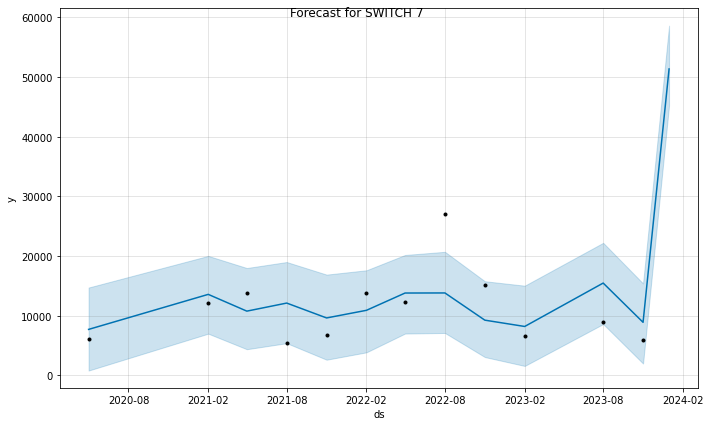

16:58:39 - cmdstanpy - INFO - Chain [1] start processing
16:58:39 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend    yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01 -4175.207100    818.955732  14733.306077 -4175.207100   
1  2021-02-01 -3930.368871   7003.668039  20032.775609 -3930.368871   
2  2021-05-01 -3851.417414   4393.986701  18004.871137 -3851.417414   
3  2021-08-01 -3769.804671   5408.318046  19008.357883 -3769.804671   
4  2021-11-01 -3688.191929   2635.116277  16899.694474 -3688.191929   
5  2022-02-01 -3606.579186   3873.986328  17626.876930 -3606.579186   
6  2022-05-01 -3527.627729   7021.563991  20191.276824 -3527.627729   
7  2022-08-01 -3446.014986   7119.895476  20721.761251 -3446.014986   
8  2022-11-01 -3364.402244   3081.405303  15789.879849 -3364.402244   
9  2023-02-01 -3282.789503   1591.231550  15043.252405 -3282.789503   
10 2023-08-01 -3122.225305   8613.385493  22227.443708 -3122.225305   
11 2023-11-01 -3040.612563   1997.762104  15426.740842 -3040.612563   
12 2023-12-31 -2987.386862  45270.881050  58628.513787 -2987.386880

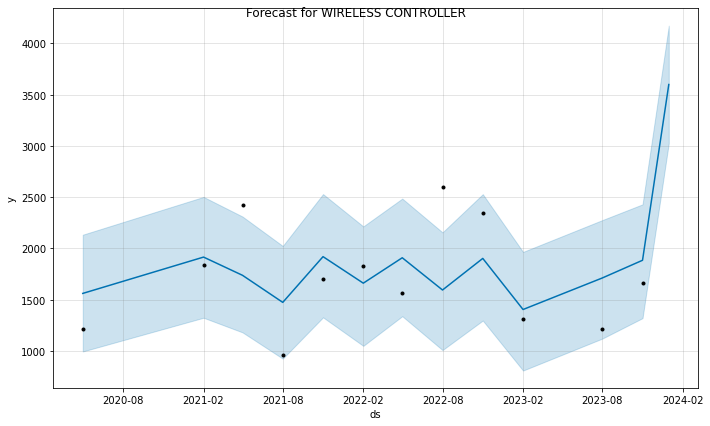

16:58:39 - cmdstanpy - INFO - Chain [1] start processing


FORECAST:            ds       trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0  2020-05-01 -418.097166   993.552940  2133.134315  -418.097166  -418.097166   
1  2021-02-01 -417.440543  1322.655229  2502.022627  -417.440543  -417.440543   
2  2021-05-01 -417.228805  1179.928325  2310.536757  -417.228805  -417.228805   
3  2021-08-01 -417.009931   923.443760  2023.369354  -417.009931  -417.009931   
4  2021-11-01 -416.791056  1326.527009  2529.920446  -416.791056  -416.791056   
5  2022-02-01 -416.572182  1048.057587  2214.143034  -416.572182  -416.572182   
6  2022-05-01 -416.360445  1337.672782  2485.898884  -416.360445  -416.360445   
7  2022-08-01 -416.141570  1007.176196  2156.098130  -416.141570  -416.141570   
8  2022-11-01 -415.922696  1295.404643  2528.964270  -415.922696  -415.922696   
9  2023-02-01 -415.703821   807.160961  1965.078713  -415.703821  -415.703821   
10 2023-08-01 -415.273210  1119.027581  2275.606983  -415.273210  -415.273210   
11 2023-11-01 -415

16:58:39 - cmdstanpy - INFO - Chain [1] done processing


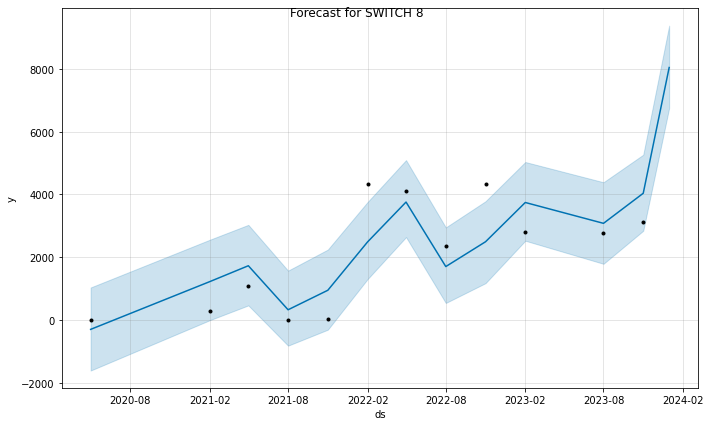

FORECAST:            ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2020-05-01  -656.883093 -1605.160121  1037.925679  -656.883093   
1  2021-02-01   425.769964    -1.410247  2557.787322   425.769964   
2  2021-05-01   774.886350   468.520767  3030.592642   774.886350   
3  2021-08-01  1135.770703  -812.892880  1573.809736  1135.770703   
4  2021-11-01  1496.655057  -304.493502  2244.392495  1496.655057   
5  2022-02-01  1857.539411  1304.775389  3757.697846  1857.539411   
6  2022-05-01  2206.655798  2641.093207  5091.012420  2206.655798   
7  2022-08-01  2567.540152   545.366784  2949.136047  2567.540152   
8  2022-11-01  2928.424506  1175.992992  3782.566067  2928.424506   
9  2023-02-01  3289.308862  2526.239560  5030.736223  3289.308862   
10 2023-08-01  3999.309606  1791.554546  4386.657857  3999.309606   
11 2023-11-01  4360.193962  2843.335168  5263.553202  4360.193962   
12 2023-12-31  4595.553325  6750.123798  9369.546470  4595.553321   

    trend_upper  additi

16:58:40 - cmdstanpy - INFO - Chain [1] start processing
16:58:40 - cmdstanpy - INFO - Chain [1] done processing


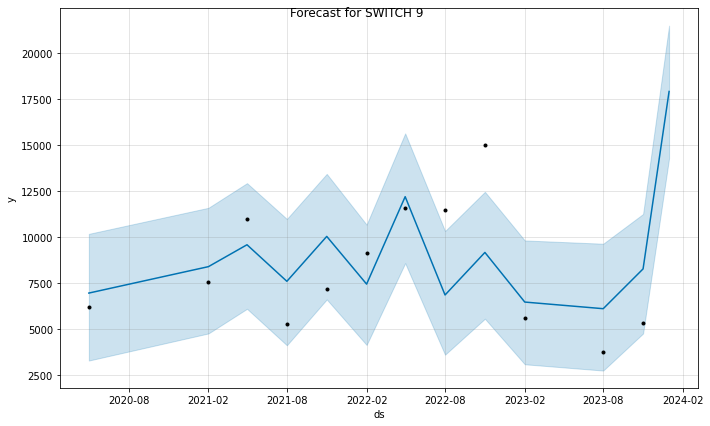

16:58:40 - cmdstanpy - INFO - Chain [1] start processing


FORECAST:            ds        trend    yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01 -2449.724340   3306.517802  10182.762953 -2449.724340   
1  2021-02-01 -2490.645024   4777.862802  11596.157954 -2490.645024   
2  2021-05-01 -2503.840462   6115.029584  12934.827461 -2503.840462   
3  2021-08-01 -2517.480690   4135.398236  10991.058342 -2517.480690   
4  2021-11-01 -2531.120918   6623.982704  13436.477024 -2531.120918   
5  2022-02-01 -2544.761146   4153.853708  10682.261591 -2544.761146   
6  2022-05-01 -2557.956584   8593.044112  15634.950730 -2557.956584   
7  2022-08-01 -2571.596812   3624.770848  10335.283460 -2571.596812   
8  2022-11-01 -2585.237040   5575.954106  12463.540755 -2585.237040   
9  2023-02-01 -2598.877269   3104.285329   9825.308727 -2598.877269   
10 2023-08-01 -2625.712935   2763.713594   9647.099370 -2625.712935   
11 2023-11-01 -2639.353164   4775.101416  11260.554051 -2639.353164   
12 2023-12-31 -2648.248965  14287.631679  21482.730122 -2648.248973

16:58:41 - cmdstanpy - INFO - Chain [1] done processing


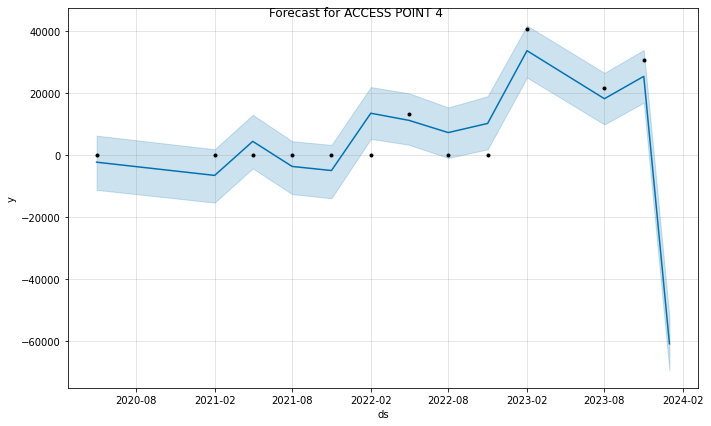

16:58:41 - cmdstanpy - INFO - Chain [1] start processing


FORECAST:            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-05-01   8917.661810 -11230.530487   6243.530708   8917.661810   
1  2021-02-01  18333.863910 -15344.100776   1852.879340  18333.863910   
2  2021-05-01  21370.247930  -4302.386969  12944.928186  21370.247930   
3  2021-08-01  24508.981972 -12606.976762   4459.255487  24508.981972   
4  2021-11-01  27647.716022 -13922.136830   3250.946362  27647.716022   
5  2022-02-01  30786.450080   5198.489277  21896.174291  30786.450080   
6  2022-05-01  33822.834125   3310.185245  19897.357608  33822.834125   
7  2022-08-01  36961.568191   -948.369013  15341.020047  36961.568191   
8  2022-11-01  40100.302252   1826.706822  18959.157009  40100.302252   
9  2023-02-01  43239.036321  24963.536256  41696.642624  43239.036321   
10 2023-08-01  49414.154434   9857.403724  26471.192858  49414.154434   
11 2023-11-01  52552.888503  16862.514940  33862.555697  52552.888503   
12 2023-12-31  54599.888983 -69467.425078

16:58:41 - cmdstanpy - INFO - Chain [1] done processing


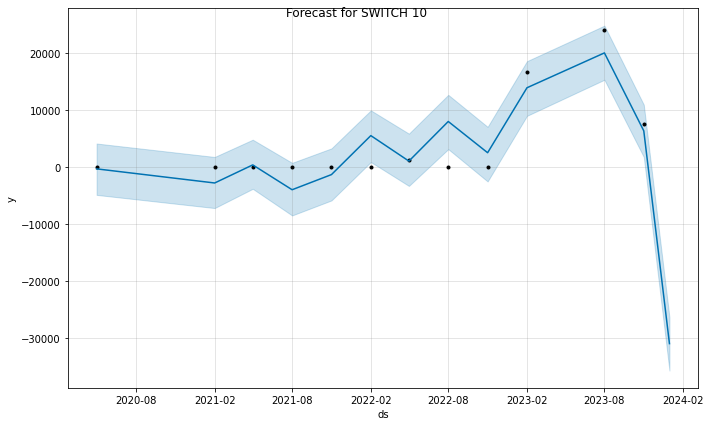

FORECAST:            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-05-01   5674.374204  -4848.739126   4172.198752   5674.374204   
1  2021-02-01  10191.645578  -7159.374810   1812.706630  10191.645578   
2  2021-05-01  11648.301926  -3781.687131   4845.166454  11648.301926   
3  2021-08-01  13154.059049  -8459.478473    779.644012  13154.059049   
4  2021-11-01  14659.816171  -5820.619949   3319.792804  14659.816171   
5  2022-02-01  16165.573293    919.718977   9992.216991  16165.573293   
6  2022-05-01  17622.229640  -3275.956201   5905.713286  17622.229640   
7  2022-08-01  19127.986761   3186.435017  12718.941511  19127.986761   
8  2022-11-01  20633.743884  -2488.789168   7098.203034  20633.743884   
9  2023-02-01  22139.501007   9030.094359  18630.160352  22139.501007   
10 2023-08-01  25101.914478  15369.160581  24866.908156  25101.914478   
11 2023-11-01  26607.671601   1812.972362  10991.095417  26607.671601   
12 2023-12-31  27589.687116 -35690.372567

16:58:42 - cmdstanpy - INFO - Chain [1] start processing
16:58:42 - cmdstanpy - INFO - Chain [1] done processing


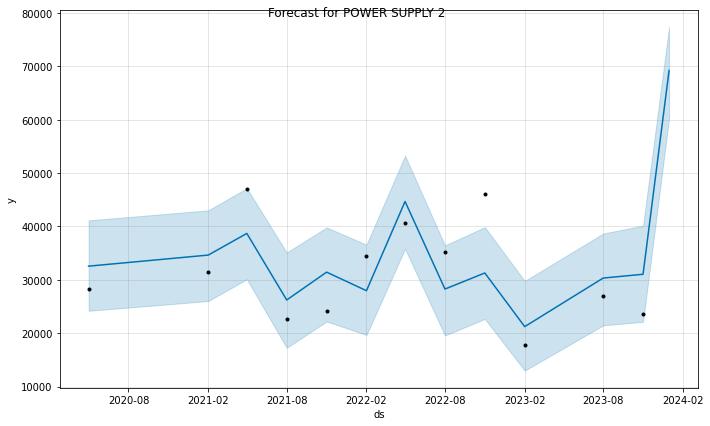

FORECAST:            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-05-01 -10432.002235  24177.812650  41122.522679 -10432.002235   
1  2021-02-01 -10271.278912  26008.297967  42998.755788 -10271.278912   
2  2021-05-01 -10219.451464  30087.876737  47134.748751 -10219.451464   
3  2021-08-01 -10165.877024  17251.666246  35107.205186 -10165.877024   
4  2021-11-01 -10112.302584  22186.771441  39796.005801 -10112.302584   
5  2022-02-01 -10058.728144  19656.058235  36567.611022 -10058.728144   
6  2022-05-01 -10006.900697  35798.908974  53243.290167 -10006.900697   
7  2022-08-01  -9953.326257  19555.931670  36429.314905  -9953.326257   
8  2022-11-01  -9899.751817  22664.960805  39851.904882  -9899.751817   
9  2023-02-01  -9846.177377  12977.110518  29767.500896  -9846.177377   
10 2023-08-01  -9740.775489  21453.141891  38655.009401  -9740.775489   
11 2023-11-01  -9687.201049  22119.307429  40136.423802  -9687.201049   
12 2023-12-31  -9652.261197  60239.338576

In [53]:
from prophet import Prophet

columns = transposed.columns[1:]

# Loop through each product column
for product in columns:
    print('product: ',product)
    # Prepare DataFrame for the current product
    product_df = scaled_spline_df[['Date', product]].rename(columns={'Date': 'ds', product: 'y'})

    # Instantiate Prophet model
    model = Prophet()

    # Add relevant lag and rolling window features as regressors to the Prophet model for the current product
    for feature in columns:
        if product in feature:
            if product != feature:
                if product == 'SWITCH 1' and feature == 'SWITCH 10':
                    continue
                else:
                    print(feature)
                    product_df[feature] = scaled_spline_df[feature]
                    model.add_regressor(feature)

    # Fit Prophet model
    model.fit(product_df)

    # Make future predictions
    future = model.make_future_dataframe(periods=1,  freq='Q')  # Adjust periods as needed
    forecast = model.predict(future)

    # Visualize forecast
    fig = model.plot(forecast)
    fig.suptitle(f'Forecast for {product}')
    plt.show()
    print('FORECAST:', forecast )



16:58:43 - cmdstanpy - INFO - Chain [1] start processing


product:  ROUTER 1


16:58:43 - cmdstanpy - INFO - Chain [1] done processing


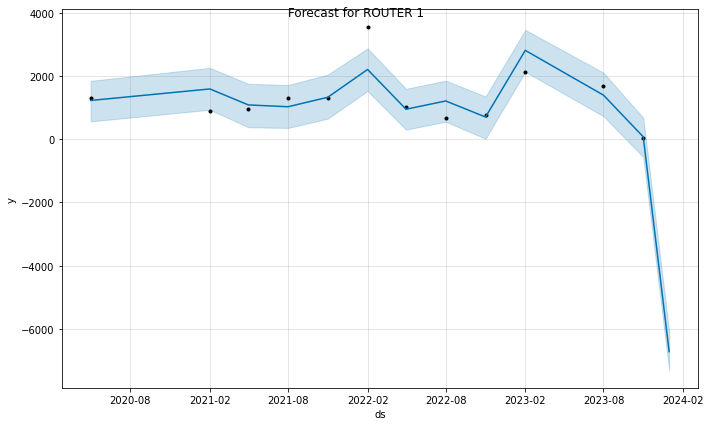

16:58:43 - cmdstanpy - INFO - Chain [1] start processing
16:58:43 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds       trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0  2020-05-01 -129.942824   563.017656  1848.710308  -129.942824  -129.942824   
1  2021-02-01 -133.430603   933.596650  2258.952852  -133.430603  -133.430603   
2  2021-05-01 -134.555285   378.472069  1755.483073  -134.555285  -134.555285   
3  2021-08-01 -135.717878   356.216545  1714.831138  -135.717878  -135.717878   
4  2021-11-01 -136.880471   652.718703  2047.958028  -136.880471  -136.880471   
5  2022-02-01 -138.043064  1527.906771  2876.166283  -138.043064  -138.043064   
6  2022-05-01 -139.167746   303.414830  1596.079459  -139.167746  -139.167746   
7  2022-08-01 -140.330339   554.038913  1854.345386  -140.330339  -140.330339   
8  2022-11-01 -141.492932    15.747371  1351.651741  -141.492932  -141.492932   
9  2023-02-01 -142.655525  2133.704212  3462.082330  -142.655525  -142.655525   
10 2023-08-01 -144.942800   728.412719  2106.889541  -144.942800  -144.942800   
11 2023-11-01 -146

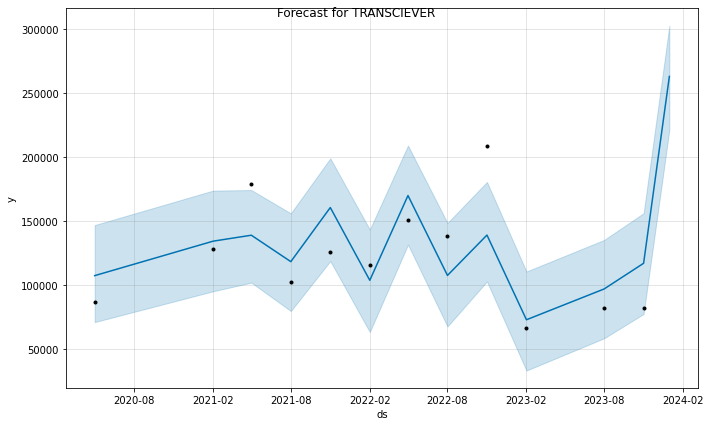

16:58:43 - cmdstanpy - INFO - Chain [1] start processing
16:58:43 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01 -44319.330480   71393.023361  147197.754534 -44319.330480   
1  2021-02-01 -50389.106969   95477.089409  174147.624490 -50389.106969   
2  2021-05-01 -52346.389964  102235.804902  174562.526616 -52346.389964   
3  2021-08-01 -54369.648791   80041.882123  156375.944036 -54369.648791   
4  2021-11-01 -56392.907618  119062.917414  199332.743755 -56392.907618   
5  2022-02-01 -58416.166445   63681.913629  143717.516322 -58416.166445   
6  2022-05-01 -60373.449441  131923.858291  209316.430074 -60373.449441   
7  2022-08-01 -62396.708265   67978.837420  148863.518603 -62396.708265   
8  2022-11-01 -64419.967094  103149.738666  180878.399296 -64419.967094   
9  2023-02-01 -66443.225919   33547.582235  110948.551718 -66443.225919   
10 2023-08-01 -70423.767739   58759.210857  135586.846279 -70423.767739   
11 2023-11-01 -72447.026565   77761.986803  156488.090813 -72447.026565   
12 2023-12-31 -

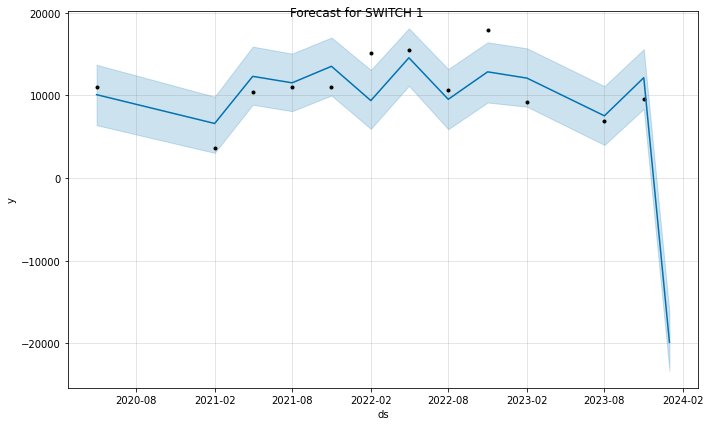

16:58:44 - cmdstanpy - INFO - Chain [1] start processing
16:58:44 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds       trend    yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01 -900.039311   6380.121755  13684.737810  -900.039311   
1  2021-02-01 -574.754909   3028.784346   9825.171000  -574.754909   
2  2021-05-01 -469.862476   8852.595780  15881.836807  -469.862476   
3  2021-08-01 -361.434345   8073.106067  15034.580016  -361.434345   
4  2021-11-01 -253.006214   9966.323515  16985.333086  -253.006214   
5  2022-02-01 -144.578084   5937.833688  13055.861895  -144.578084   
6  2022-05-01  -39.685654  11141.763459  18093.315231   -39.685654   
7  2022-08-01   68.742477   5895.560961  13168.100670    68.742477   
8  2022-11-01  177.170608   9120.205656  16400.793507   177.170608   
9  2023-02-01  285.598738   8614.875746  15678.700589   285.598738   
10 2023-08-01  498.919299   3985.919046  11097.809342   498.919299   
11 2023-11-01  607.347429   8354.130897  15565.631166   607.347429   
12 2023-12-31  678.061427 -23321.570264 -16290.646163   678.061415   

    trend

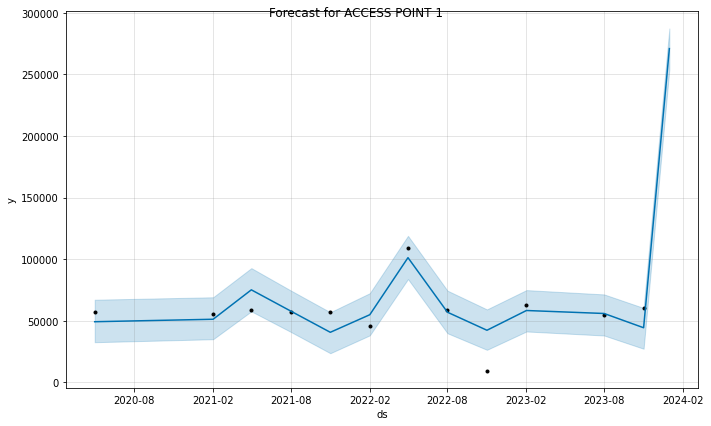

16:58:44 - cmdstanpy - INFO - Chain [1] start processing
16:58:44 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01  36185.269008   32670.206425   67129.042107  36185.269008   
1  2021-02-01  41423.003672   35094.165864   69118.593306  41423.003672   
2  2021-05-01  43111.983327   57694.254036   92763.128340  43111.983327   
3  2021-08-01  44857.894879   41012.436371   74607.129021  44857.894879   
4  2021-11-01  46603.806432   23740.254211   56972.174175  46603.806432   
5  2022-02-01  48349.717984   38211.900351   72424.335278  48349.717984   
6  2022-05-01  50038.697637   83865.894408  118925.648350  50038.697637   
7  2022-08-01  51784.609190   39933.790524   74481.093701  51784.609190   
8  2022-11-01  53530.520743   26489.696124   59268.390535  53530.520743   
9  2023-02-01  55276.432297   41370.842903   74929.452315  55276.432297   
10 2023-08-01  58711.323506   38106.120236   71431.257387  58711.323506   
11 2023-11-01  60457.235060   27368.806843   60465.834688  60457.235060   
12 2023-12-31  

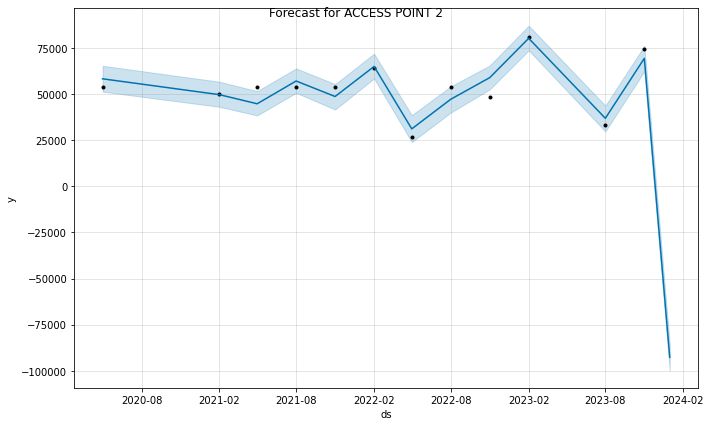

16:58:45 - cmdstanpy - INFO - Chain [1] start processing


FORECAST:            ds        trend     yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01 -3048.456267   51522.968450  65580.588207 -3048.456267   
1  2021-02-01 -2788.898971   43277.064493  56922.615965 -2788.898971   
2  2021-05-01 -2705.201138   38583.079900  51815.138732 -2705.201138   
3  2021-08-01 -2618.682019   50869.452732  64147.769593 -2618.682019   
4  2021-11-01 -2532.162908   41812.234490  55623.595416 -2532.162908   
5  2022-02-01 -2445.643795   58681.850937  72141.777912 -2445.643795   
6  2022-05-01 -2361.945972   24130.792564  38768.882993 -2361.945972   
7  2022-08-01 -2275.426861   40150.503463  54372.139330 -2275.426861   
8  2022-11-01 -2188.907748   52747.982901  65732.896323 -2188.907748   
9  2023-02-01 -2102.388635   73942.418767  87382.471716 -2102.388635   
10 2023-08-01 -1932.171685   29914.458298  43973.403460 -1932.171685   
11 2023-11-01 -1845.652573   62576.562521  76422.298493 -1845.652573   
12 2023-12-31 -1789.227065 -100004.334925 -85665.43078

16:58:45 - cmdstanpy - INFO - Chain [1] done processing


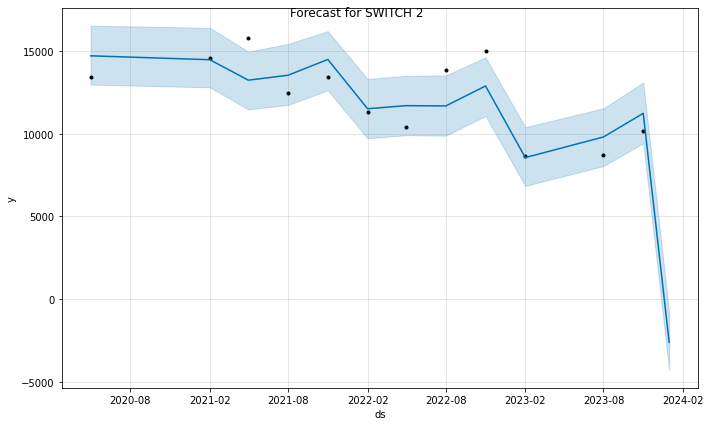

16:58:45 - cmdstanpy - INFO - Chain [1] start processing
16:58:45 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-05-01  -5199.612795  12985.049427  16552.991596  -5199.612795   
1  2021-02-01  -6621.101976  12816.503679  16421.735721  -6621.101976   
2  2021-05-01  -7079.480733  11480.405221  14979.897306  -7079.480733   
3  2021-08-01  -7553.310461  11751.224086  15446.407242  -7553.310461   
4  2021-11-01  -8027.140188  12639.065501  16218.961775  -8027.140188   
5  2022-02-01  -8500.969915   9729.812819  13317.369935  -8500.969915   
6  2022-05-01  -8959.348673   9922.228851  13520.522568  -8959.348673   
7  2022-08-01  -9433.178400   9888.881953  13538.642946  -9433.178400   
8  2022-11-01  -9907.008128  11081.867516  14633.800697  -9907.008128   
9  2023-02-01 -10380.837855   6853.200392  10403.476877 -10380.837855   
10 2023-08-01 -11313.046341   8051.131312  11547.769679 -11313.046341   
11 2023-11-01 -11786.876068   9436.998093  13111.728524 -11786.876068   
12 2023-12-31 -12095.895456  -4332.545995

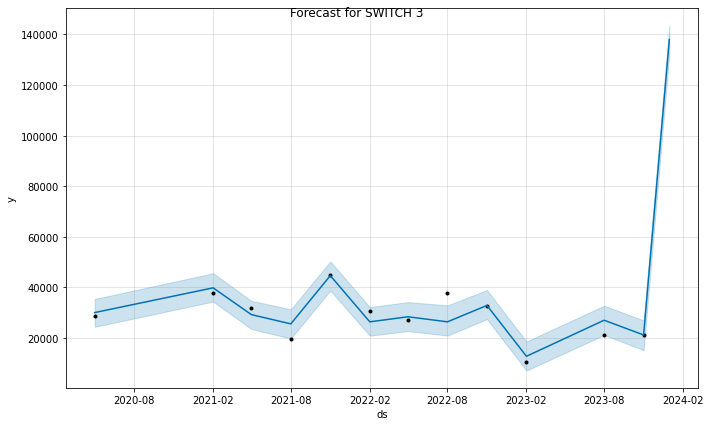

16:58:46 - cmdstanpy - INFO - Chain [1] start processing
16:58:46 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01 -10679.107272   24350.669334   35371.085695 -10679.107272   
1  2021-02-01 -15318.203936   34353.615066   45547.336932 -15318.203936   
2  2021-05-01 -16814.144527   23495.210197   34661.607239 -16814.144527   
3  2021-08-01 -18360.510081   19725.807425   31288.677391 -18360.510081   
4  2021-11-01 -19906.875636   38699.814851   50211.312196 -19906.875636   
5  2022-02-01 -21453.241190   20853.076369   32142.073532 -21453.241190   
6  2022-05-01 -22949.181780   22676.912133   34140.253059 -22949.181780   
7  2022-08-01 -24495.547334   20893.272204   32862.824818 -24495.547334   
8  2022-11-01 -26041.912888   27393.822072   38905.162973 -26041.912888   
9  2023-02-01 -27588.278443    7062.561729   18555.155407 -27588.278443   
10 2023-08-01 -30630.584588   21136.419175   32711.597502 -30630.584588   
11 2023-11-01 -32176.950142   15139.241883   26904.060585 -32176.950142   
12 2023-12-31 -

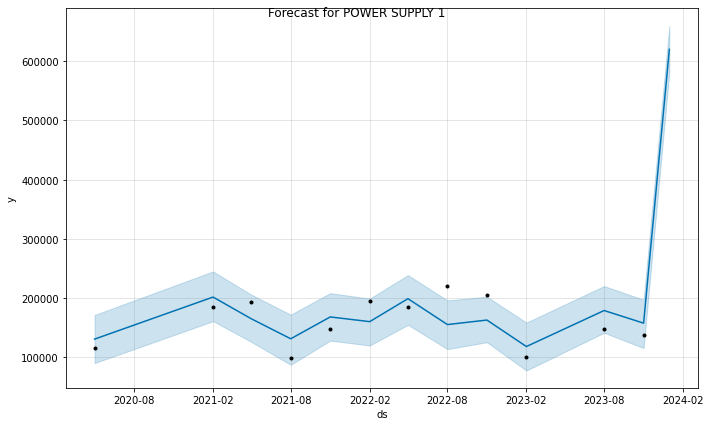

16:58:46 - cmdstanpy - INFO - Chain [1] start processing
16:58:46 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01 -51545.640768   90300.459720  171507.026338 -51545.640768   
1  2021-02-01 -50021.110912  161038.120356  245010.495968 -50021.110912   
2  2021-05-01 -49529.505259  126141.714537  205858.187664 -49529.505259   
3  2021-08-01 -49021.328637   87413.390376  172133.590211 -49021.328637   
4  2021-11-01 -48513.152017  128231.423556  208433.131475 -48513.152017   
5  2022-02-01 -48004.975394  119973.577117  199121.684666 -48004.975394   
6  2022-05-01 -47513.369741  154844.309122  238850.918021 -47513.369741   
7  2022-08-01 -47005.193109  113922.889355  196097.721443 -47005.193109   
8  2022-11-01 -46497.016489  125477.232459  202401.233423 -46497.016489   
9  2023-02-01 -45988.839871   77716.179479  158741.567511 -45988.839871   
10 2023-08-01 -44989.057612  141567.197708  220378.038694 -44989.057612   
11 2023-11-01 -44480.880994  115697.316626  197199.533998 -44480.880994   
12 2023-12-31 -

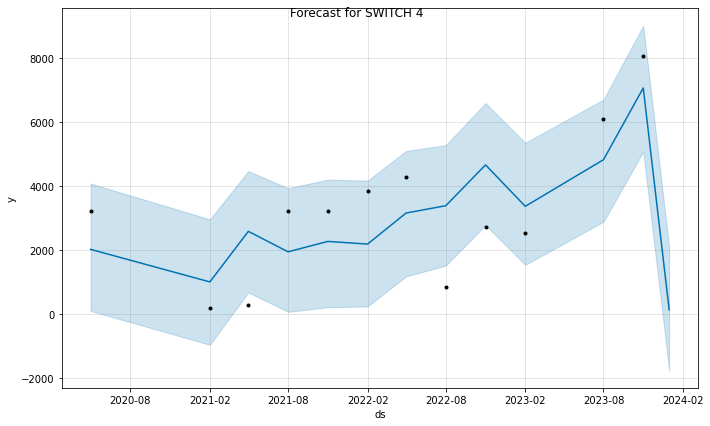

16:58:47 - cmdstanpy - INFO - Chain [1] start processing
16:58:47 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2020-05-01  1268.011569    94.356496  4074.899559  1268.011569   
1  2021-02-01  2273.098751  -964.726990  2956.874537  2273.098751   
2  2021-05-01  2597.202951   672.419701  4463.675880  2597.202951   
3  2021-08-01  2932.232012    66.557258  3928.294442  2932.232012   
4  2021-11-01  3267.261073   207.463561  4196.613449  3267.261073   
5  2022-02-01  3602.290134   235.646280  4164.649929  3602.290134   
6  2022-05-01  3926.394335  1171.998656  5091.043337  3926.394335   
7  2022-08-01  4261.423396  1509.240823  5274.000158  4261.423396   
8  2022-11-01  4596.452458  2775.776049  6587.562969  4596.452458   
9  2023-02-01  4931.481521  1533.169297  5348.196145  4931.481521   
10 2023-08-01  5590.614786  2880.457972  6697.973912  5590.614786   
11 2023-11-01  5925.643849  5068.665049  9005.432012  5925.643849   
12 2023-12-31  6144.141064 -1768.045120  2086.738441  6144.141060   

    trend_upper  additi

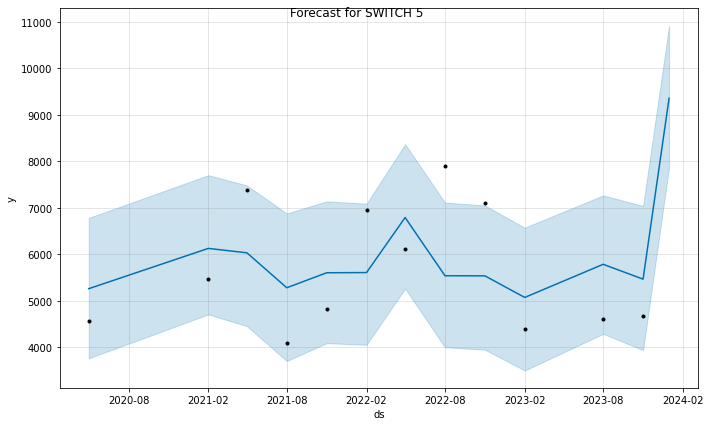

16:58:47 - cmdstanpy - INFO - Chain [1] start processing


FORECAST:            ds        trend   yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01 -1738.440362  3767.170801   6783.358712 -1738.440362   
1  2021-02-01 -1682.333190  4710.168571   7701.763324 -1682.333190   
2  2021-05-01 -1664.240660  4457.724675   7481.497772 -1664.240660   
3  2021-08-01 -1645.538269  3709.226441   6878.869853 -1645.538269   
4  2021-11-01 -1626.835878  4092.677529   7139.612576 -1626.835878   
5  2022-02-01 -1608.133487  4058.091760   7089.168806 -1608.133487   
6  2022-05-01 -1590.040957  5265.053575   8367.853320 -1590.040957   
7  2022-08-01 -1571.338566  4003.493167   7113.392279 -1571.338566   
8  2022-11-01 -1552.636176  3952.318954   7051.533777 -1552.636176   
9  2023-02-01 -1533.933785  3503.717186   6573.692118 -1533.933785   
10 2023-08-01 -1497.138864  4293.310110   7267.610782 -1497.138864   
11 2023-11-01 -1478.436474  3942.319218   7041.537796 -1478.436474   
12 2023-12-31 -1466.239262  7875.692218  10914.899089 -1466.239267   

    trend

16:58:47 - cmdstanpy - INFO - Chain [1] done processing


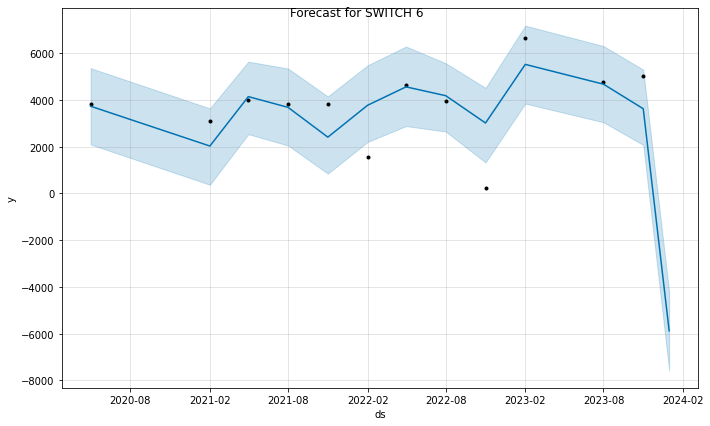

16:58:48 - cmdstanpy - INFO - Chain [1] start processing


FORECAST:            ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2020-05-01  1505.334272  2092.043011  5356.202260  1505.334272   
1  2021-02-01  2084.715019   368.983101  3634.235809  2084.715019   
2  2021-05-01  2271.544318  2532.107085  5635.177102  2271.544318   
3  2021-08-01  2464.671234  2047.481044  5340.484097  2464.671234   
4  2021-11-01  2657.798150   844.320503  4146.553737  2657.798150   
5  2022-02-01  2850.925066  2199.048106  5476.809511  2850.925066   
6  2022-05-01  3037.754365  2878.933168  6280.781142  3037.754365   
7  2022-08-01  3230.881280  2643.630950  5565.852625  3230.881280   
8  2022-11-01  3424.008196  1323.590994  4511.128578  3424.008196   
9  2023-02-01  3617.135112  3842.097713  7174.228642  3617.135112   
10 2023-08-01  3997.091327  3040.762358  6301.378083  3997.091327   
11 2023-11-01  4190.218242  2074.122258  5292.348368  4190.218242   
12 2023-12-31  4316.170579 -7578.756140 -4221.511305  4316.170575   

    trend_upper  additi

16:58:48 - cmdstanpy - INFO - Chain [1] done processing


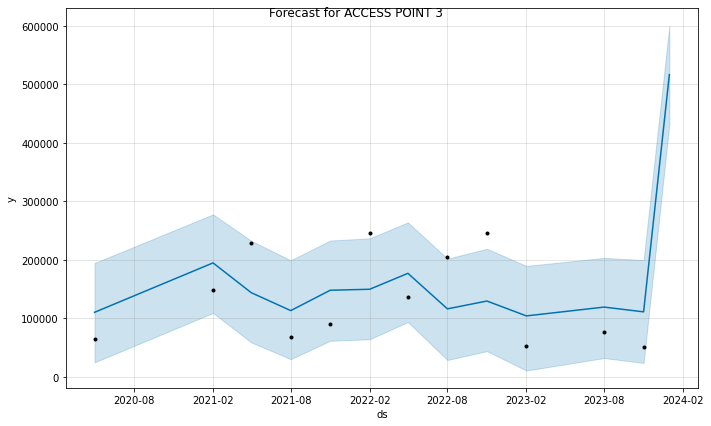

16:58:48 - cmdstanpy - INFO - Chain [1] start processing


FORECAST:            ds         trend     yhat_lower     yhat_upper   trend_lower  \
0  2020-05-01 -25770.232323   24690.073756  194451.970448 -25770.232323   
1  2021-02-01 -30893.702086  109096.396090  277519.884012 -30893.702086   
2  2021-05-01 -32545.835446   58768.022058  232437.082303 -32545.835446   
3  2021-08-01 -34253.658699   30081.564153  199055.892962 -34253.658699   
4  2021-11-01 -35961.481946   61567.068869  232879.109599 -35961.481946   
5  2022-02-01 -37669.305198   64189.243813  236626.922340 -37669.305198   
6  2022-05-01 -39321.438569   93525.550590  263849.461866 -39321.438569   
7  2022-08-01 -41029.261822   28704.475868  201824.490934 -41029.261822   
8  2022-11-01 -42737.085083   43861.218970  218838.885706 -42737.085083   
9  2023-02-01 -44444.908346   10662.897505  189459.925503 -44444.908346   
10 2023-08-01 -47804.864982   32016.114377  203248.012237 -47804.864982   
11 2023-11-01 -49512.688244   23676.755661  199450.093525 -49512.688244   
12 2023-12-31 -

16:58:48 - cmdstanpy - INFO - Chain [1] done processing


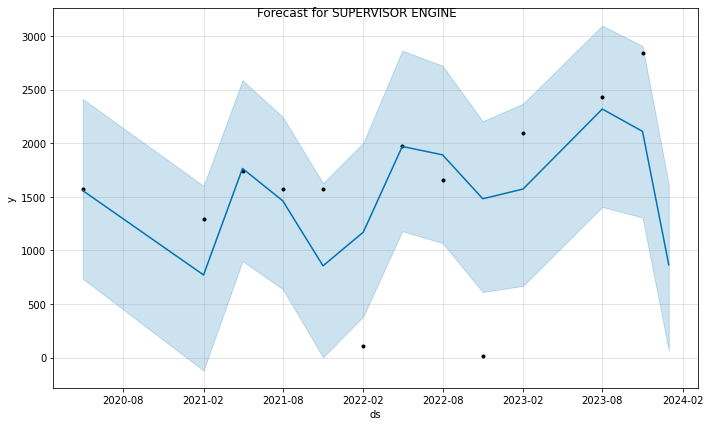

16:58:49 - cmdstanpy - INFO - Chain [1] start processing
16:58:49 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2020-05-01   528.406113   735.219517  2412.679232   528.406113   
1  2021-02-01   828.452177  -121.405565  1601.254985   828.452177   
2  2021-05-01   925.206162   899.508294  2585.929012   925.206162   
3  2021-08-01  1025.221517   638.198352  2244.149856  1025.221517   
4  2021-11-01  1125.236871     1.678666  1625.794936  1125.236871   
5  2022-02-01  1225.252226   382.503231  2002.415838  1225.252226   
6  2022-05-01  1322.006211  1178.308699  2863.384912  1322.006211   
7  2022-08-01  1422.021565  1068.591377  2722.128325  1422.021565   
8  2022-11-01  1522.036920   610.228246  2204.191645  1522.036920   
9  2023-02-01  1622.052275   668.417303  2368.391413  1622.052275   
10 2023-08-01  1818.821614  1404.631066  3095.860985  1818.821614   
11 2023-11-01  1918.836969  1306.228134  2906.574519  1918.836969   
12 2023-12-31  1984.064374    64.562635  1613.902324  1984.064373   

    trend_upper  additi

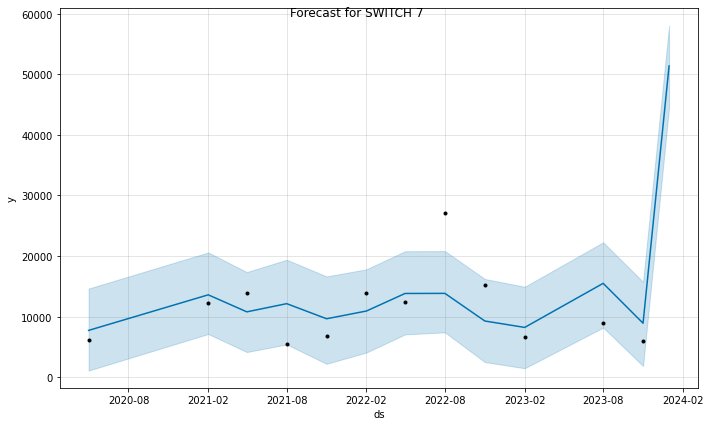

FORECAST:            ds        trend    yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01 -4175.207100   1086.954438  14620.959869 -4175.207100   
1  2021-02-01 -3930.368871   7124.484282  20581.608182 -3930.368871   
2  2021-05-01 -3851.417414   4144.861546  17338.550153 -3851.417414   
3  2021-08-01 -3769.804671   5400.655833  19384.188766 -3769.804671   
4  2021-11-01 -3688.191929   2197.357326  16625.140905 -3688.191929   
5  2022-02-01 -3606.579186   4072.920659  17804.274531 -3606.579186   
6  2022-05-01 -3527.627729   7056.464222  20783.698478 -3527.627729   
7  2022-08-01 -3446.014986   7392.833922  20807.497383 -3446.014986   
8  2022-11-01 -3364.402244   2491.965012  16207.328410 -3364.402244   
9  2023-02-01 -3282.789503   1468.339819  14919.784353 -3282.789503   
10 2023-08-01 -3122.225305   8181.616974  22254.363936 -3122.225305   
11 2023-11-01 -3040.612563   1836.560681  15729.239292 -3040.612563   
12 2023-12-31 -2987.386862  44526.992393  58023.137588 -2987.386879

16:58:49 - cmdstanpy - INFO - Chain [1] start processing
16:58:49 - cmdstanpy - INFO - Chain [1] done processing


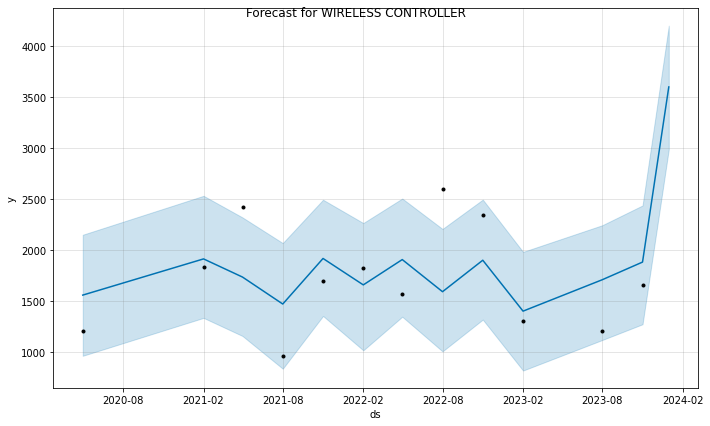

16:58:50 - cmdstanpy - INFO - Chain [1] start processing
16:58:50 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds       trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0  2020-05-01 -418.097166   965.645472  2151.349856  -418.097166  -418.097166   
1  2021-02-01 -417.440543  1336.954132  2532.675537  -417.440543  -417.440543   
2  2021-05-01 -417.228805  1159.689540  2320.909432  -417.228805  -417.228805   
3  2021-08-01 -417.009931   839.157189  2069.873965  -417.009931  -417.009931   
4  2021-11-01 -416.791056  1355.899606  2494.307892  -416.791056  -416.791056   
5  2022-02-01 -416.572182  1019.138148  2265.997579  -416.572182  -416.572182   
6  2022-05-01 -416.360445  1348.443973  2506.191762  -416.360445  -416.360445   
7  2022-08-01 -416.141570  1009.101791  2208.122668  -416.141570  -416.141570   
8  2022-11-01 -415.922696  1320.281284  2495.592370  -415.922696  -415.922696   
9  2023-02-01 -415.703821   821.035838  1983.413911  -415.703821  -415.703821   
10 2023-08-01 -415.273210  1120.380912  2244.623468  -415.273210  -415.273210   
11 2023-11-01 -415

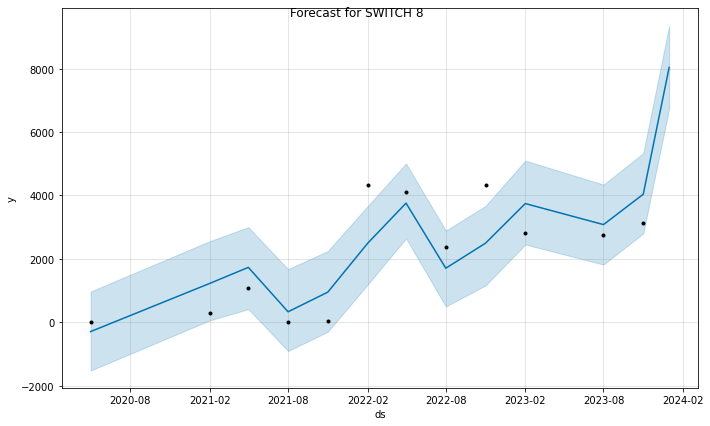

16:58:50 - cmdstanpy - INFO - Chain [1] start processing
16:58:50 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2020-05-01  -656.883093 -1524.688762   968.491758  -656.883093   
1  2021-02-01   425.769964    59.620546  2558.101987   425.769964   
2  2021-05-01   774.886350   413.892750  2997.991340   774.886350   
3  2021-08-01  1135.770703  -908.059918  1673.061366  1135.770703   
4  2021-11-01  1496.655057  -300.182987  2245.711131  1496.655057   
5  2022-02-01  1857.539411  1183.950301  3659.473676  1857.539411   
6  2022-05-01  2206.655798  2645.291866  5006.947440  2206.655798   
7  2022-08-01  2567.540152   497.010099  2889.678919  2567.540152   
8  2022-11-01  2928.424506  1159.039549  3668.651938  2928.424506   
9  2023-02-01  3289.308862  2451.818823  5097.624068  3289.308862   
10 2023-08-01  3999.309606  1817.932873  4340.265529  3999.309606   
11 2023-11-01  4360.193962  2802.153953  5330.957431  4360.193962   
12 2023-12-31  4595.553325  6738.330122  9354.748051  4595.553322   

    trend_upper  additi

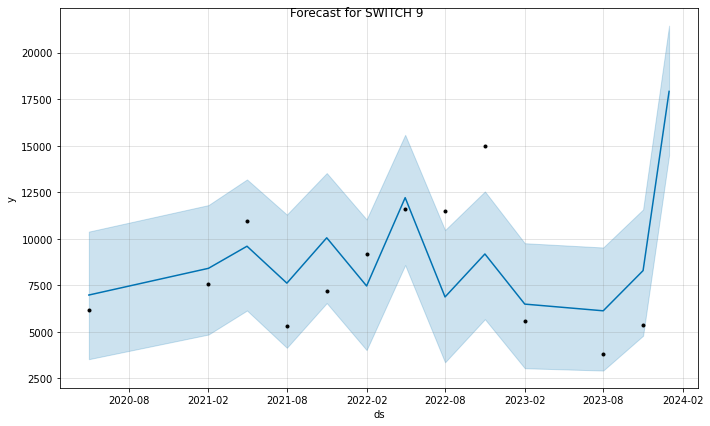

16:58:51 - cmdstanpy - INFO - Chain [1] start processing


FORECAST:            ds        trend    yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01 -2449.724340   3521.096229  10376.940076 -2449.724340   
1  2021-02-01 -2490.645024   4845.080857  11800.638539 -2490.645024   
2  2021-05-01 -2503.840462   6136.544047  13180.048553 -2503.840462   
3  2021-08-01 -2517.480690   4132.703941  11290.382566 -2517.480690   
4  2021-11-01 -2531.120918   6535.576892  13522.497054 -2531.120918   
5  2022-02-01 -2544.761146   4009.841459  11029.879577 -2544.761146   
6  2022-05-01 -2557.956584   8578.291325  15575.919041 -2557.956584   
7  2022-08-01 -2571.596812   3352.492694  10458.587079 -2571.596812   
8  2022-11-01 -2585.237040   5670.569114  12534.488775 -2585.237040   
9  2023-02-01 -2598.877269   3035.912447   9752.657554 -2598.877269   
10 2023-08-01 -2625.712935   2910.524109   9522.623304 -2625.712935   
11 2023-11-01 -2639.353164   4781.128346  11566.760268 -2639.353164   
12 2023-12-31 -2648.248965  14486.568265  21443.465927 -2648.248974

16:58:51 - cmdstanpy - INFO - Chain [1] done processing


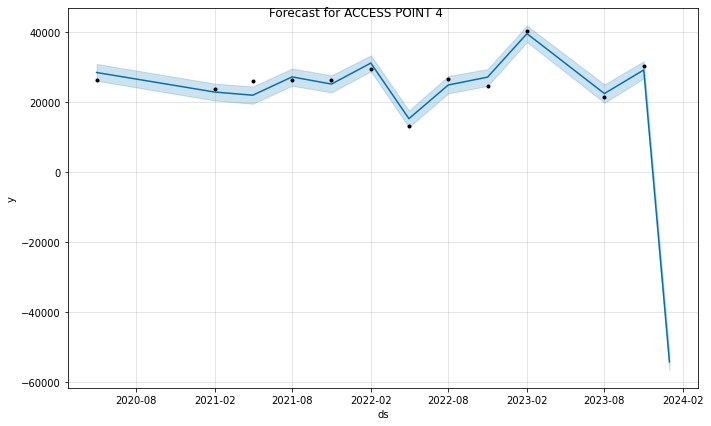

16:58:51 - cmdstanpy - INFO - Chain [1] start processing
16:58:51 - cmdstanpy - INFO - Chain [1] done processing


FORECAST:            ds        trend    yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01 -3623.050735  26161.206961  30994.366324 -3623.050735   
1  2021-02-01 -3349.583346  20542.985367  25379.175681 -3349.583346   
2  2021-05-01 -3261.400025  19613.016260  24545.304720 -3261.400025   
3  2021-08-01 -3170.246119  24736.606078  29680.386984 -3170.246119   
4  2021-11-01 -3079.092212  22857.007823  27718.417629 -3079.092212   
5  2022-02-01 -2987.938306  28859.847435  33423.996115 -2987.938306   
6  2022-05-01 -2899.756812  12912.063847  17689.535754 -2899.756812   
7  2022-08-01 -2808.602908  22570.055568  27532.353847 -2808.602908   
8  2022-11-01 -2717.449000  24691.549826  29523.399555 -2717.449000   
9  2023-02-01 -2626.295095  37232.108201  41934.541392 -2626.295095   
10 2023-08-01 -2446.959693  19895.426277  25128.950127 -2446.959693   
11 2023-11-01 -2355.805787  26821.048828  31763.153523 -2355.805787   
12 2023-12-31 -2296.357588 -56646.579819 -51742.679862 -2296.357793

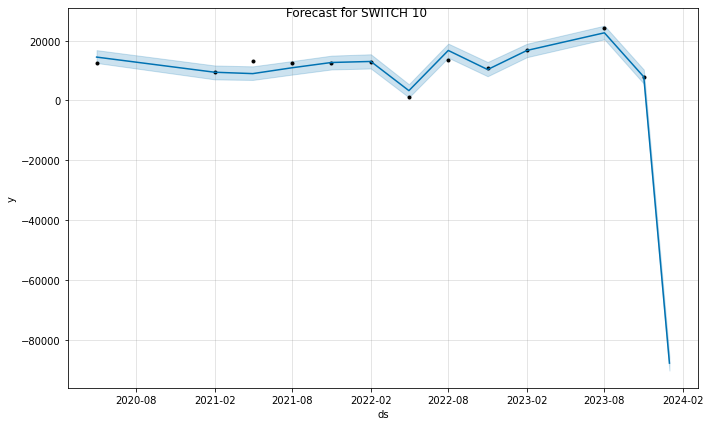

16:58:52 - cmdstanpy - INFO - Chain [1] start processing


FORECAST:            ds        trend    yhat_lower    yhat_upper  trend_lower  \
0  2020-05-01  -862.380853  12532.658156  16818.229489  -862.380853   
1  2021-02-01  -456.661864   7039.320108  11691.989239  -456.661864   
2  2021-05-01  -325.832184   6847.247694  11398.618836  -325.832184   
3  2021-08-01  -190.592556   8635.077031  13162.229428  -190.592556   
4  2021-11-01   -55.352931  10356.189266  14981.702456   -55.352931   
5  2022-02-01    79.886725  10681.008078  15437.411669    79.886725   
6  2022-05-01   210.716358   1007.365809   5416.337859   210.716358   
7  2022-08-01   345.955983  14299.703115  19008.716447   345.955983   
8  2022-11-01   481.195625   8083.000444  12840.764234   481.195625   
9  2023-02-01   616.435311  14471.437882  18965.878701   616.435311   
10 2023-08-01   882.504694  20441.403658  25013.486584   882.504694   
11 2023-11-01  1017.744380   5627.391772  10321.694941  1017.744380   
12 2023-12-31  1105.944175 -90359.949079 -85677.637304  1105.944146

16:58:52 - cmdstanpy - INFO - Chain [1] done processing


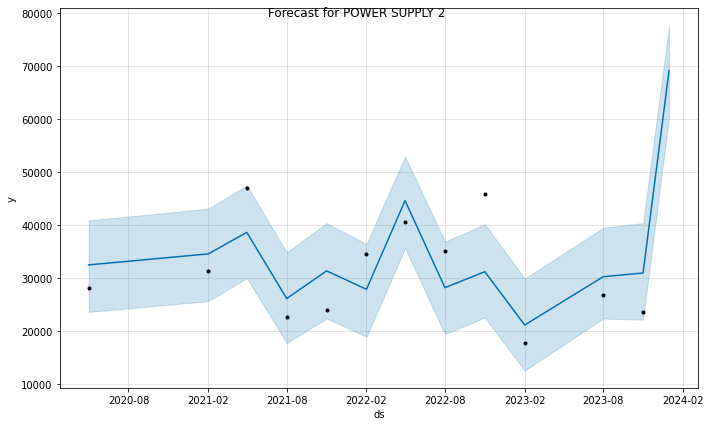

FORECAST:            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2020-05-01 -10432.002235  23682.052277  40932.865295 -10432.002235   
1  2021-02-01 -10271.278912  25705.408704  43151.524662 -10271.278912   
2  2021-05-01 -10219.451464  30074.703734  47528.310280 -10219.451464   
3  2021-08-01 -10165.877024  17789.515513  34902.729568 -10165.877024   
4  2021-11-01 -10112.302584  22450.088631  40409.301374 -10112.302584   
5  2022-02-01 -10058.728144  18995.867672  36497.164697 -10058.728144   
6  2022-05-01 -10006.900697  35703.890686  52999.435074 -10006.900697   
7  2022-08-01  -9953.326257  19503.115925  36944.629960  -9953.326257   
8  2022-11-01  -9899.751817  22609.503581  40218.284333  -9899.751817   
9  2023-02-01  -9846.177377  12627.531643  29948.751890  -9846.177377   
10 2023-08-01  -9740.775489  22432.246773  39549.053695  -9740.775489   
11 2023-11-01  -9687.201049  22228.635897  40432.643463  -9687.201049   
12 2023-12-31  -9652.261197  60444.250958

In [54]:
from prophet import Prophet

columns = transposed.columns[1:]

# Loop through each product column
for product in columns:
    print('product: ',product)
    # Prepare DataFrame for the current product
    product_df = scaled_linear_df[['Date', product]].rename(columns={'Date': 'ds', product: 'y'})

    # Instantiate Prophet model
    model = Prophet()

    # Add relevant lag and rolling window features as regressors to the Prophet model for the current product
    for feature in columns:
        if product in feature:
            if product != feature:
                if product == 'SWITCH 1' and feature == 'SWITCH 10':
                    continue
                else:
                    print(feature)
                    product_df[feature] = scaled_linear_df[feature]
                    model.add_regressor(feature)

    # Fit Prophet model
    model.fit(product_df)

    # Make future predictions
    future = model.make_future_dataframe(periods=1,  freq='Q')  # Adjust periods as needed
    forecast = model.predict(future)

    # Visualize forecast
    fig = model.plot(forecast)
    fig.suptitle(f'Forecast for {product}')
    plt.show()
    print('FORECAST:', forecast )

